In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [313]:
pd.set_option('display.float_format', '{:.3f}'.format)

# import warnings

# # Suppress warnings
# from pandas.core.common import SettingWithCopyWarning

# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


In [314]:
data_combined = pd.read_csv('time-series-19-covid-combined.csv',parse_dates=['Date'])

In [315]:
data_combined.head()

Date Country/Region Province/State    Lat   Long  Confirmed  \
0 2020-01-22    Afghanistan            NaN 33.939 67.710          0   
1 2020-01-23    Afghanistan            NaN 33.939 67.710          0   
2 2020-01-24    Afghanistan            NaN 33.939 67.710          0   
3 2020-01-25    Afghanistan            NaN 33.939 67.710          0   
4 2020-01-26    Afghanistan            NaN 33.939 67.710          0   

   Recovered  Deaths  
0      0.000       0  
1      0.000       0  
2      0.000       0  
3      0.000       0  
4      0.000       0

In [316]:
data_combined.columns

Index(['Date', 'Country/Region', 'Province/State', 'Lat', 'Long', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [317]:
data_combined.rename(columns={'Country/Region':'Country','Province/State':'State'},inplace=True)

In [318]:
data_combined.columns
print(data_combined.dtypes)

df = data_combined

Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed             int64
Recovered           float64
Deaths                int64
dtype: object


In [319]:
# #check if date column in datetime format
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# # Check for errors in the conversion
# if df['Date'].isnull().any():
#     print("There were errors in converting 'Date' to datetime format.")
# else:
#     print("The 'Date' column is in datetime format.")

# #print(df['Date'])

Different Countries Available:

In [320]:
countries = df['Country'].unique()

Total Confirmed Cases for each country:

In [321]:
country_cases = df.groupby('Country').agg({'Confirmed':'max'})

country_cases = country_cases.sort_values(by = 'Confirmed',ascending=False).reset_index()

In [322]:
plt.rc(
    "figure",
    autolayout=True,
    figsize=(10, 6),
    titlesize=12,
    # titleweight='bold',
)
plt.rc(
    "axes",
    # labelweight="bold",
    labelsize="medium",
    # titleweight="bold",
    titlesize=12,
    titlepad=10,
)

%config InlineBackend.figure_format = 'retina'

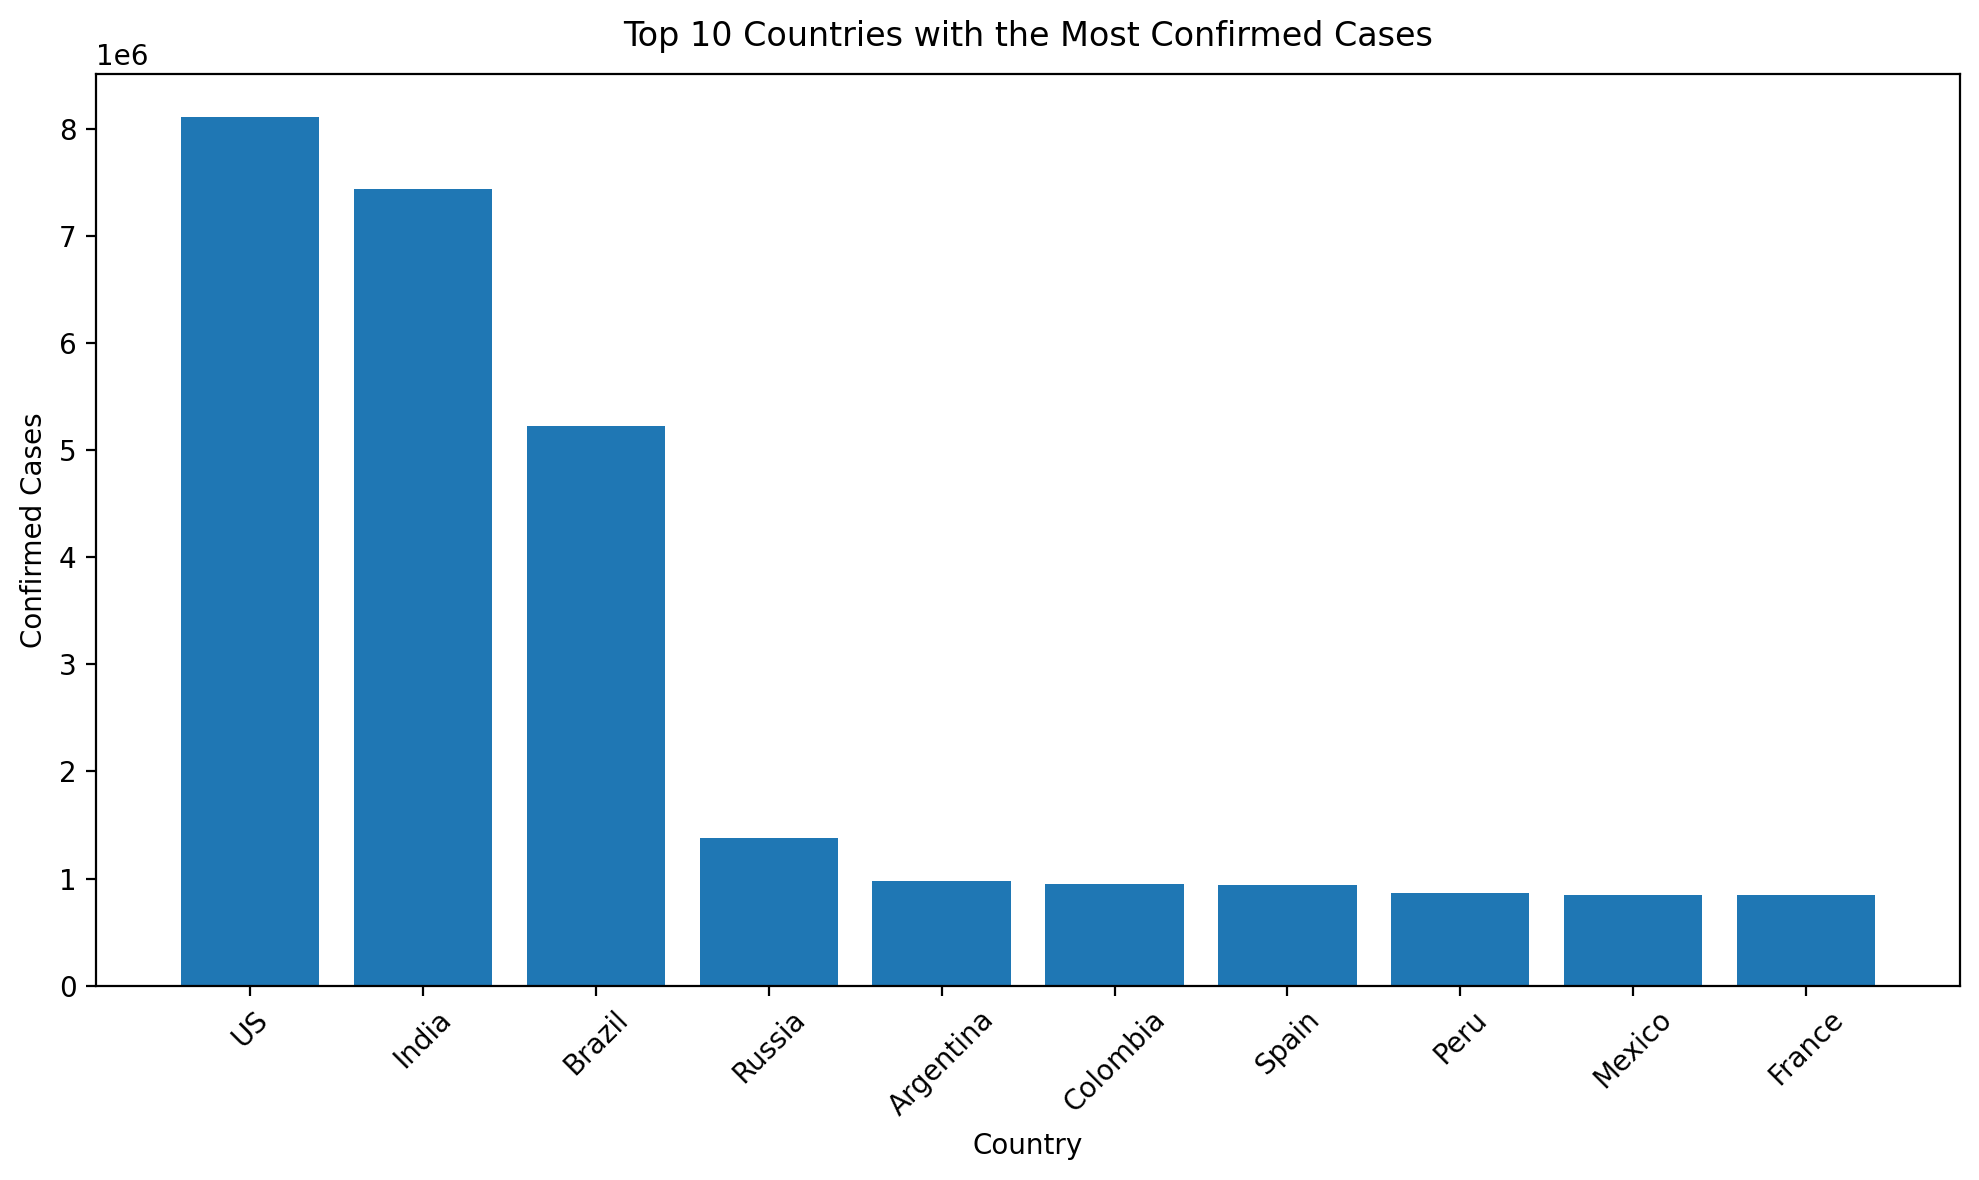

In [323]:
plt.bar(country_cases[:10]['Country'],country_cases[:10]['Confirmed'])
plt.xlabel('Country')
plt.xticks(rotation= 45)
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries with the Most Confirmed Cases')
plt.show()

Picking USA for our work:

In [324]:
df_usa = df[df['Country']=='US']
df_usa.head(5)

df_usa = df_usa.set_index('Date')


In [325]:
df_usa.drop(columns=['State','Country','Lat','Long'],inplace=True)

df_usa

Confirmed   Recovered  Deaths
Date                                     
2020-01-22          1       0.000       0
2020-01-23          1       0.000       0
2020-01-24          2       0.000       0
2020-01-25          2       0.000       0
2020-01-26          5       0.000       0
...               ...         ...     ...
2020-10-13    7856605 3124593.000  215887
2020-10-14    7916099 3155794.000  216872
2020-10-15    7979709 3177397.000  217692
2020-10-16    8048865 3197539.000  218575
2020-10-17    8106384 3220573.000  219286

[270 rows x 3 columns]

Total 270 Days of Data!

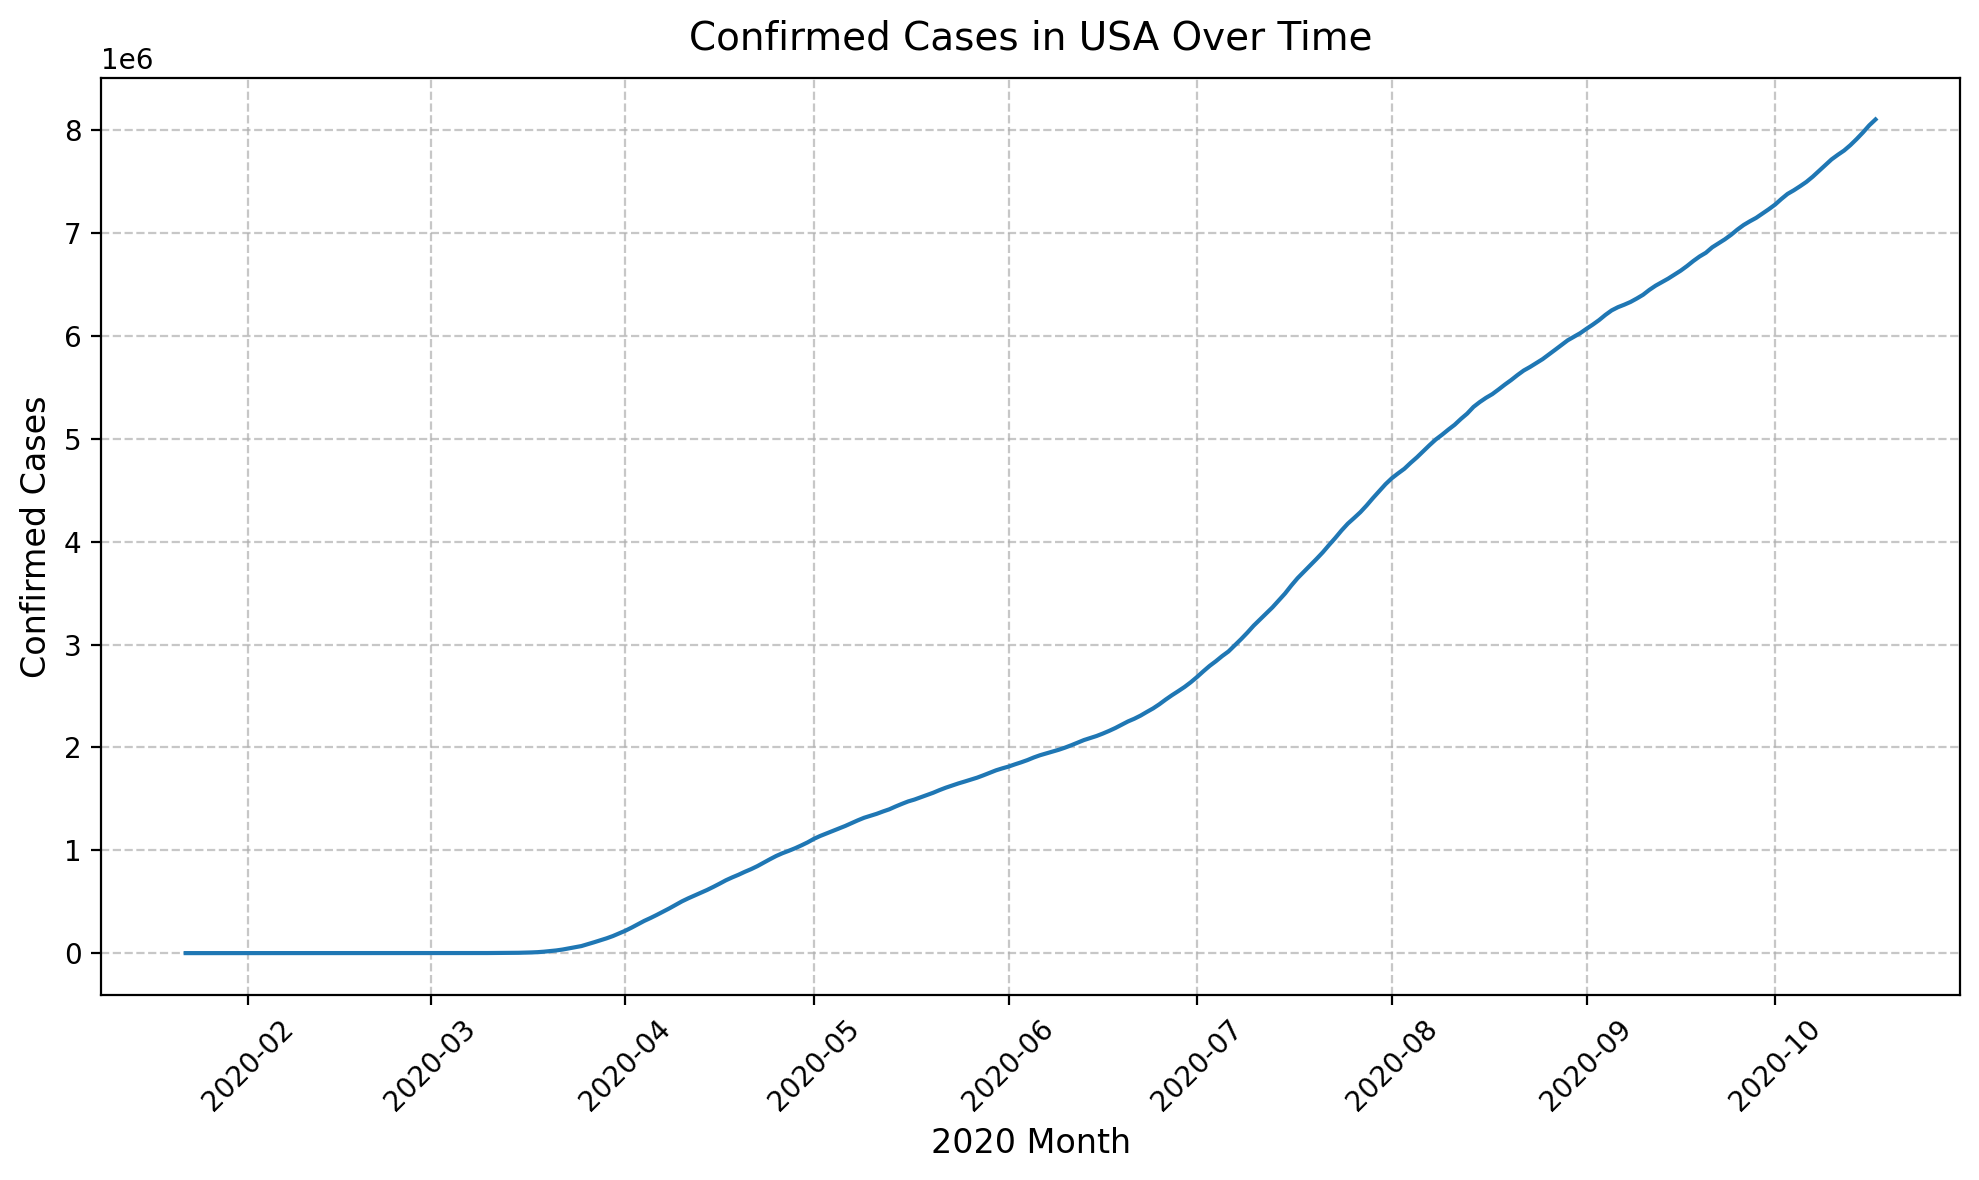

In [326]:
plt.plot(df_usa.index,df_usa['Confirmed'],'-')
plt.title('Confirmed Cases in USA Over Time', fontsize=14)
plt.xlabel('2020 Month', fontsize=12)
plt.xticks(rotation = 45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


### Some Time Series Operations:

In [327]:
#Time Column starting from 1st recorded day
df_usa['Time'] = np.arange(len(df_usa.index))
df_usa.head(5)

Confirmed  Recovered  Deaths  Time
Date                                          
2020-01-22          1      0.000       0     0
2020-01-23          1      0.000       0     1
2020-01-24          2      0.000       0     2
2020-01-25          2      0.000       0     3
2020-01-26          5      0.000       0     4

In [328]:
# plt.plot(df_usa.Time,df_usa.Confirmed,'-')
df_usa['2020-01-22':'2020-02-01']

Confirmed  Recovered  Deaths  Time
Date                                          
2020-01-22          1      0.000       0     0
2020-01-23          1      0.000       0     1
2020-01-24          2      0.000       0     2
2020-01-25          2      0.000       0     3
2020-01-26          5      0.000       0     4
2020-01-27          5      0.000       0     5
2020-01-28          5      0.000       0     6
2020-01-29          6      0.000       0     7
2020-01-30          6      0.000       0     8
2020-01-31          8      0.000       0     9
2020-02-01          8      0.000       0    10

In [329]:
df_usa.resample('M').max()

Confirmed   Recovered  Deaths  Time
Date                                           
2020-01-31          8       0.000       0     9
2020-02-29         25       7.000       1    38
2020-03-31     192091    7024.000    5252    69
2020-04-30    1076689  153947.000   65930    99
2020-05-31    1796645  444758.000  107614   130
2020-06-30    2633871  720631.000  127753   160
2020-07-31    4559711 1438160.000  154047   191
2020-08-31    6028642 2184825.000  183616   222
2020-09-30    7233042 2840688.000  206932   252
2020-10-31    8106384 3220573.000  219286   269

To make the data stationary:\
First Order Difference

In [330]:
df_usa['Confirmed_diff'] = df_usa['Confirmed'] - df_usa['Confirmed'].shift(1)
df_usa.dropna(inplace=True)

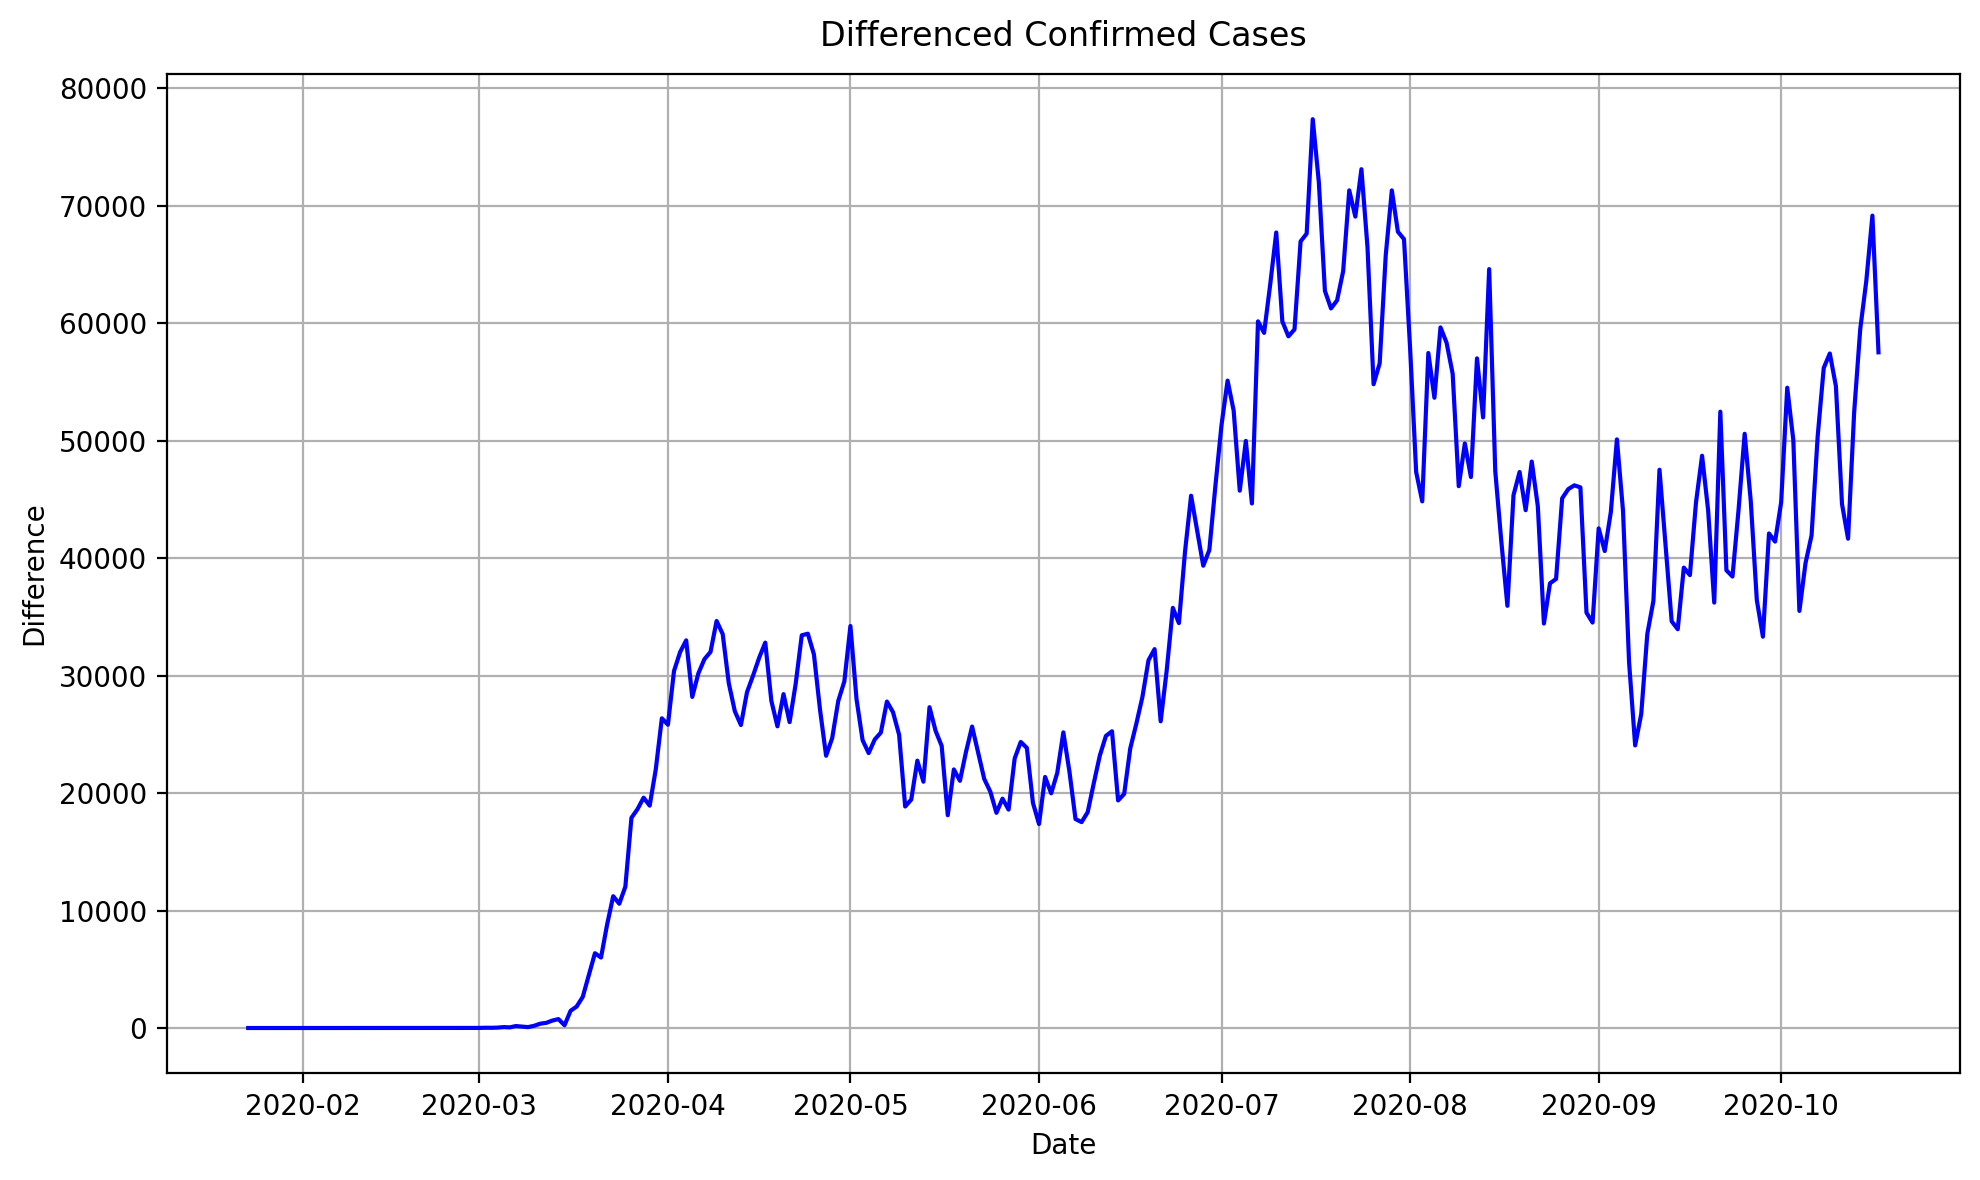

In [331]:
plt.plot(df_usa.index, df_usa['Confirmed_diff'], color='blue')
plt.title('Differenced Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

Second Order Difference:

In [332]:
# Compute the second-order difference
df_usa['Confirmed_diff2'] = df_usa['Confirmed_diff'] - df_usa['Confirmed_diff'].shift(1)

# Remove NaN values resulting from differencing
df_usa.dropna(inplace=True)

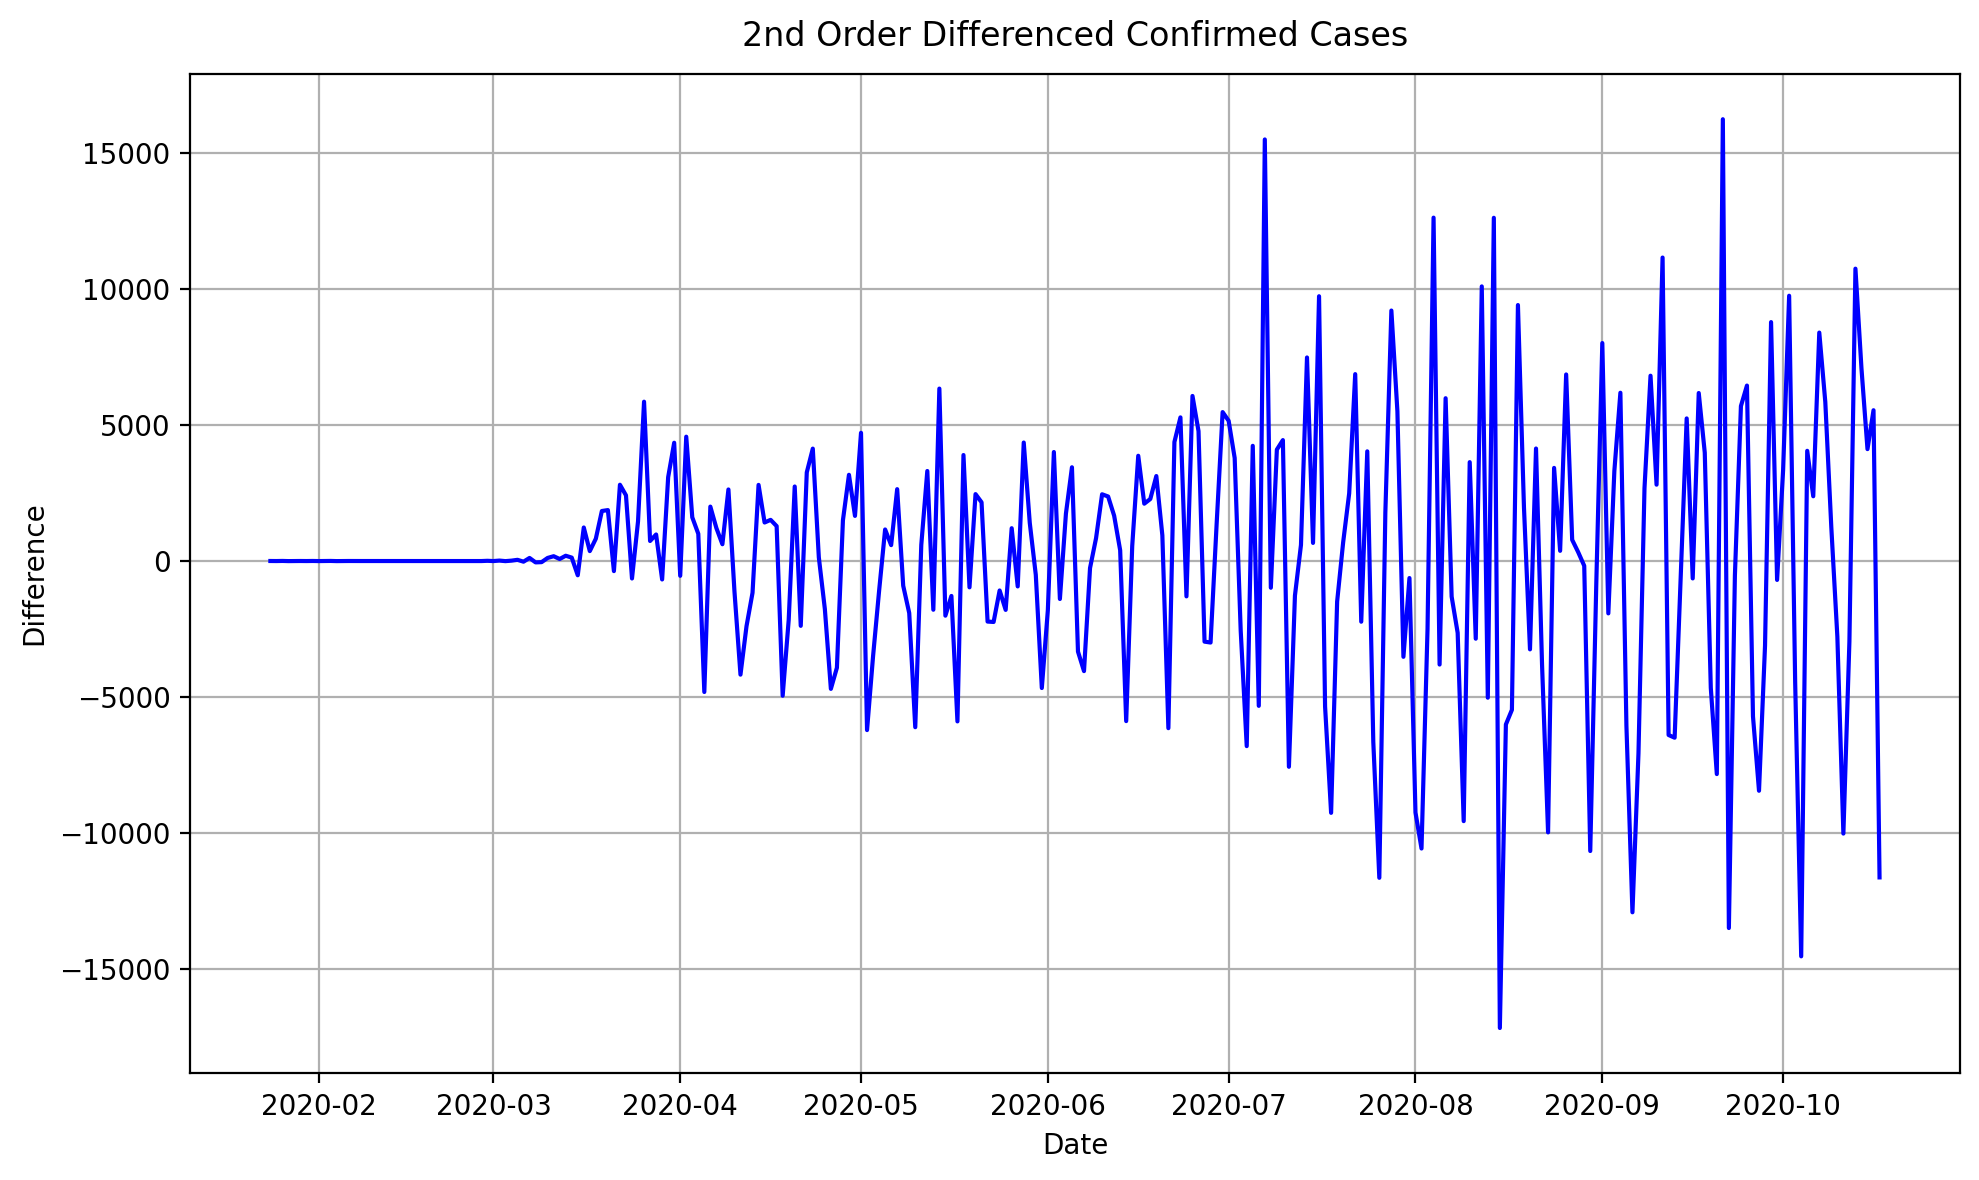

In [333]:
plt.plot(df_usa.index, df_usa['Confirmed_diff2'], color='blue')
plt.title('2nd Order Differenced Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

Auto Correlation Plots

<Figure size 1000x600 with 0 Axes>

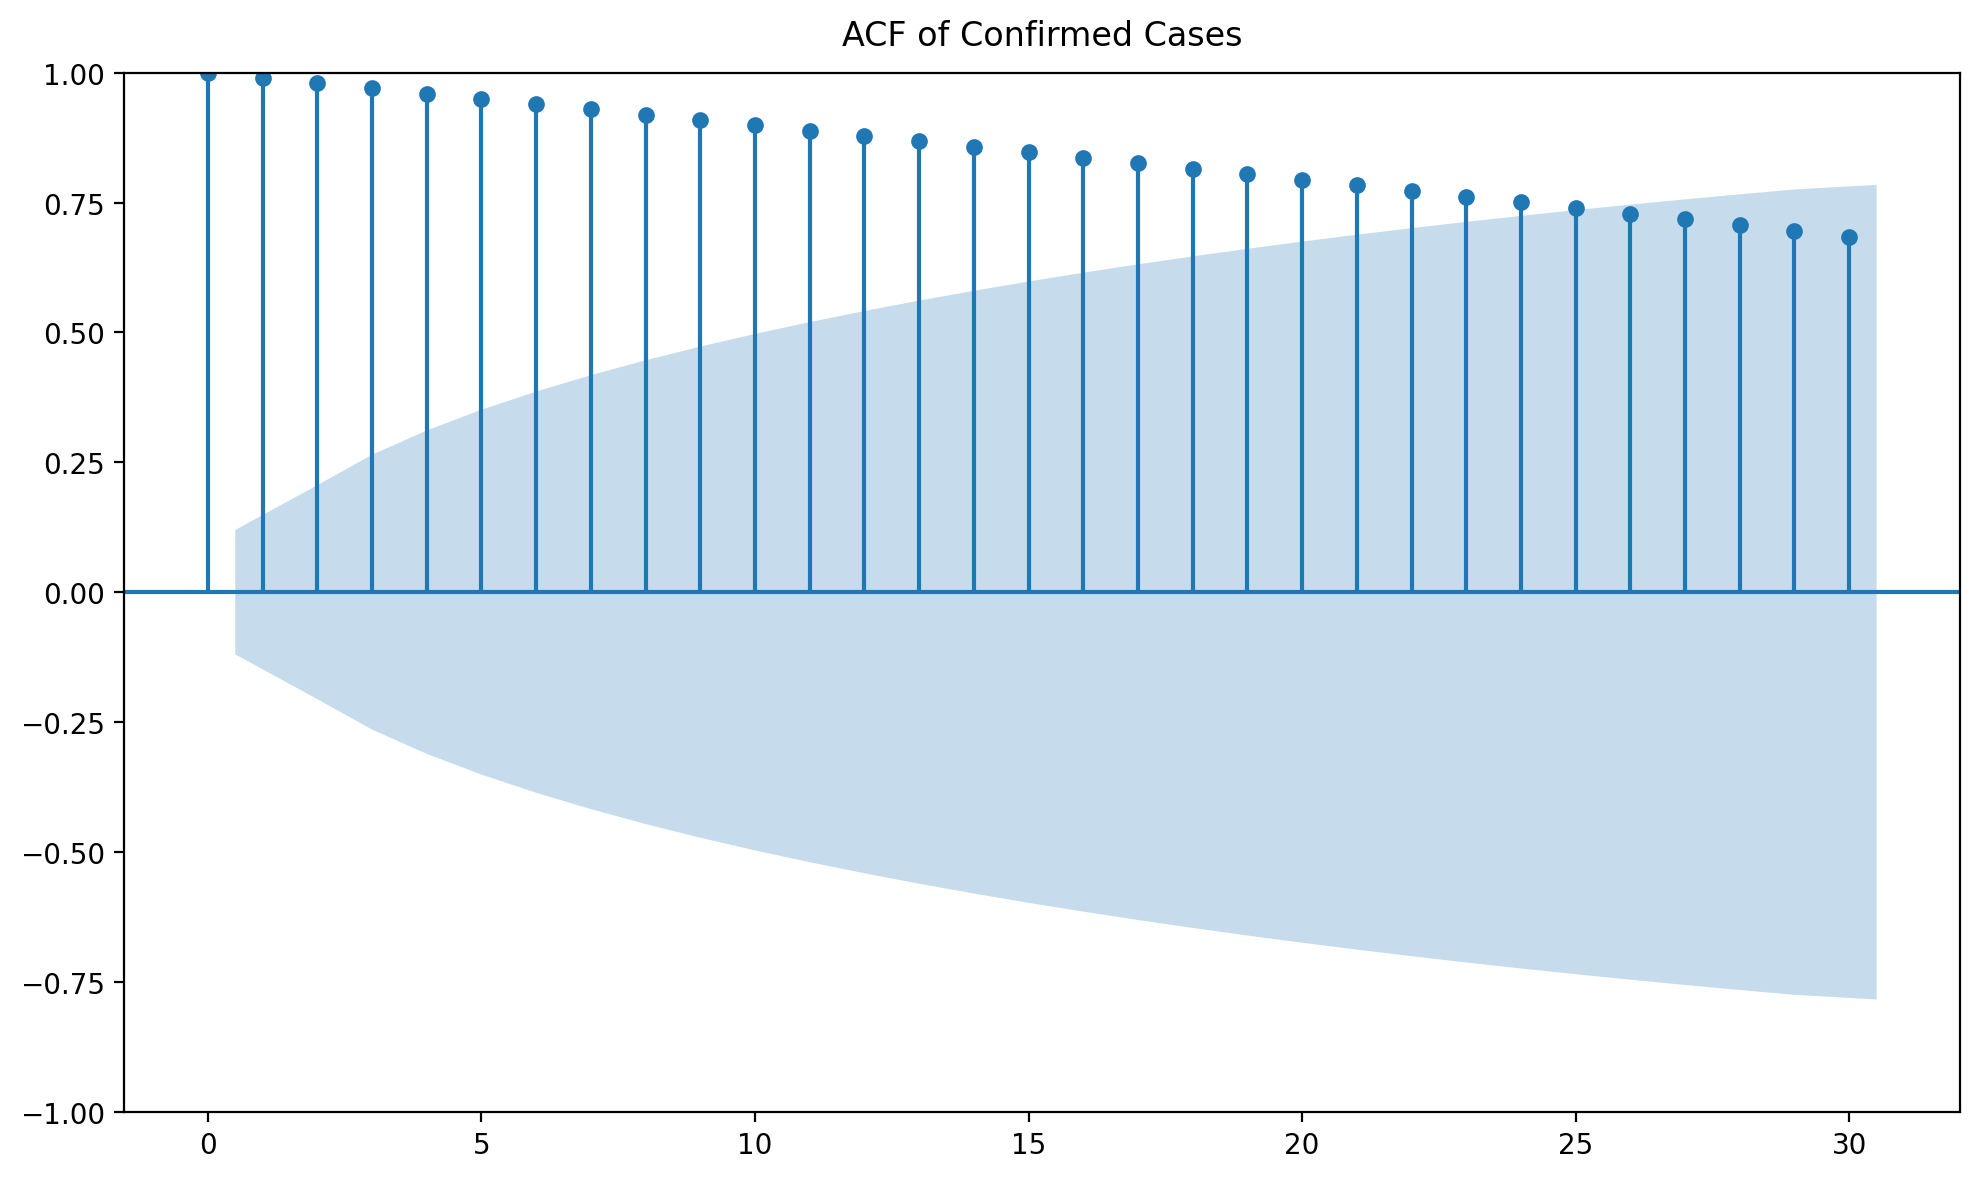

In [334]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plot_acf(df_usa['Confirmed'], lags=30, title='ACF of Confirmed Cases')
plt.show()

# plt.figure(figsize=(10, 6))
# plot_pacf(df_usa['Confirmed_diff'], lags=10, title='PACF of Differenced Series')
# plt.show()


no seasonality,\
auto correlation decreases as time lag increases, clear trend for nearby data points


<Figure size 1000x600 with 0 Axes>

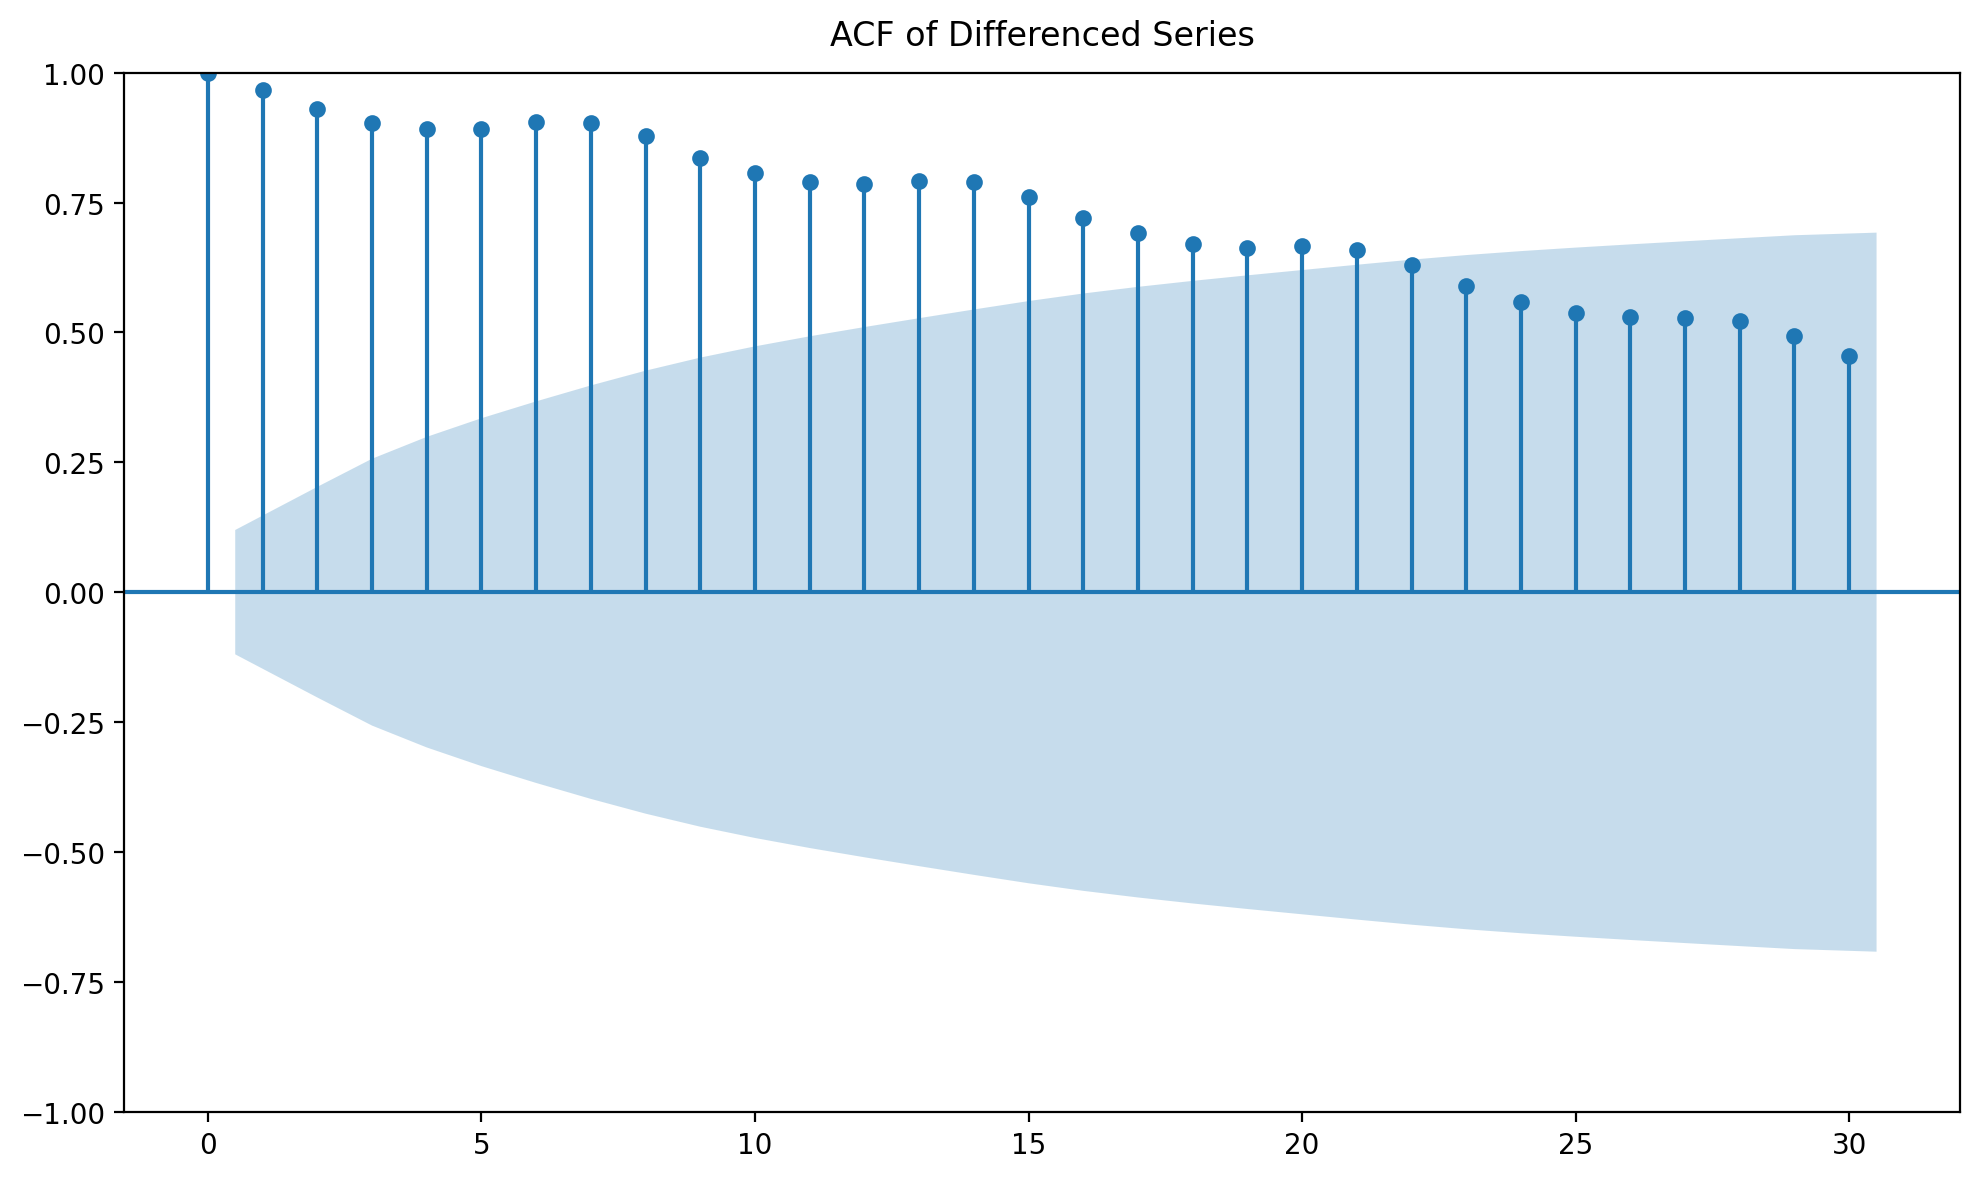

In [335]:
plt.figure(figsize=(10, 6))
plot_acf(df_usa['Confirmed_diff'], lags=30, title='ACF of Differenced Series')
plt.show()

<Figure size 1000x600 with 0 Axes>

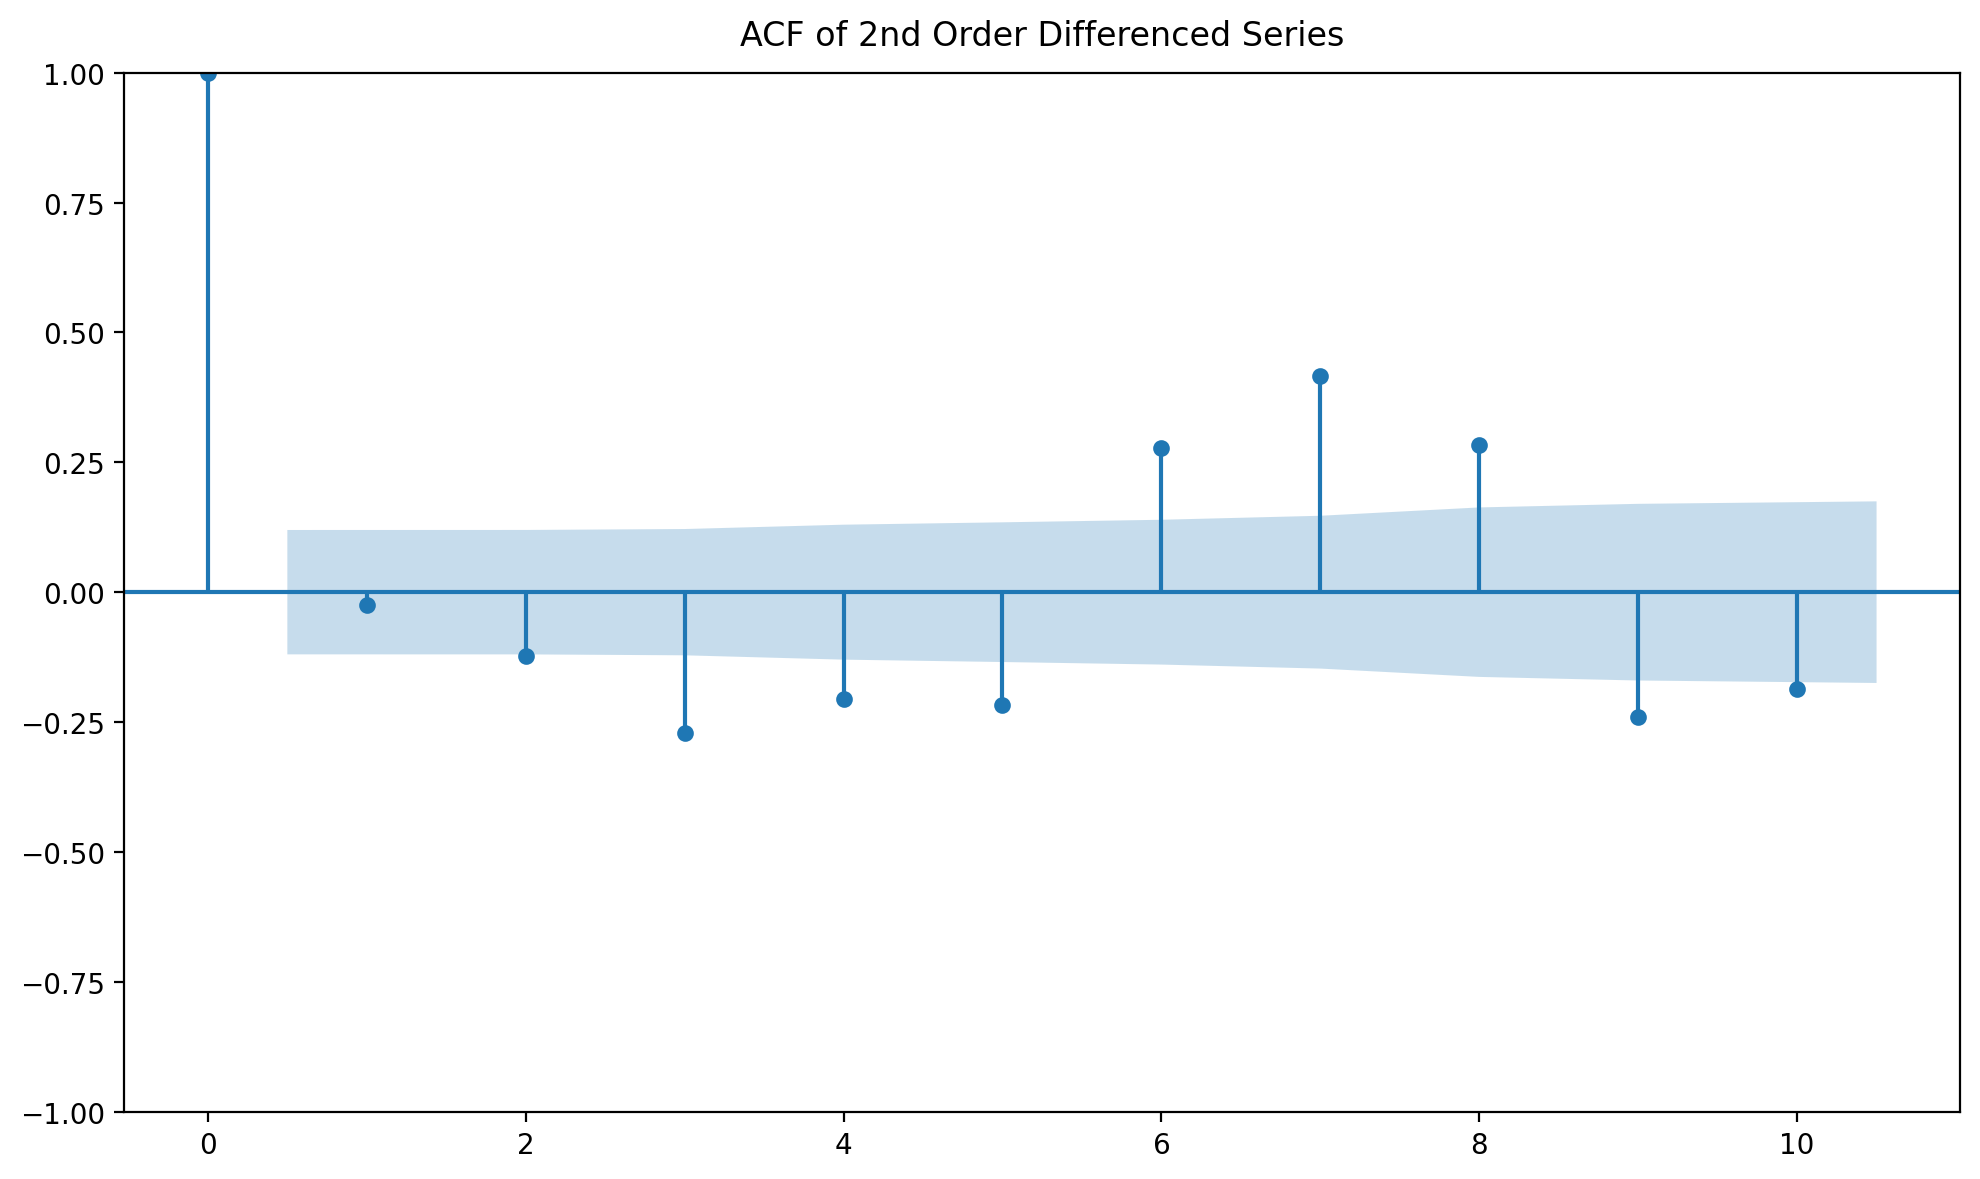

In [336]:
plt.figure(figsize=(10, 6))
plot_acf(df_usa['Confirmed_diff2'], lags=10, title='ACF of 2nd Order Differenced Series')
plt.show()

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity in a time series dataset

In [337]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test on the time series data
kpss_stat, p_value, lags, crit_values = kpss(df_usa['Confirmed'])

# Print the results
print('KPSS Statistic:', kpss_stat)
print('p-value:', p_value)

KPSS Statistic: 2.4263591361572847
p-value: 0.01


/tmp/ipykernel_55498/1004092871.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, crit_values = kpss(df_usa['Confirmed'])


In [338]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the time series data
adf_stat, p_value, used_lags, nobs, crit_values, ic_best = adfuller(df_usa['Confirmed'])

# Print the results
print('ADF Statistic:', adf_stat)
print('p-value:', p_value)
print('Used Lag:', used_lags)
print('Number of Observations:', nobs)
print('Critical Values:', crit_values)
print('Information Criterion:', ic_best)


ADF Statistic: 1.753832858760971
p-value: 0.9982529190561126
Used Lag: 16
Number of Observations: 251
Critical Values: {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}
Information Criterion: 4815.814789487765


In [339]:
adf_stat, p_value, used_lags, nobs, crit_values, ic_best = adfuller(df_usa['Confirmed_diff'])

# Print the results
print('ADF Statistic:', adf_stat)
print('p-value:', p_value)
print('Used Lag:', used_lags)
print('Number of Observations:', nobs)
print('Critical Values:', crit_values)
print('Information Criterion:', ic_best)

ADF Statistic: -1.6819833467272318
p-value: 0.44041828564221014
Used Lag: 15
Number of Observations: 252
Critical Values: {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}
Information Criterion: 4817.106663452473


In [340]:
adf_stat, p_value, used_lags, nobs, crit_values, ic_best = adfuller(df_usa['Confirmed_diff2'])

# Print the results
print('ADF Statistic:', adf_stat)
print('p-value:', p_value)
print('Used Lag:', used_lags)
print('Number of Observations:', nobs)
print('Critical Values:', crit_values)
print('Information Criterion:', ic_best)

ADF Statistic: -2.7271849852855032
p-value: 0.06945105401959312
Used Lag: 14
Number of Observations: 253
Critical Values: {'1%': -3.4564641849494113, '5%': -2.873032730098417, '10%': -2.572894516864816}
Information Criterion: 4818.165208059602


with the ADF test we can reject the null hypothesis of dataset for 2nd Order Difference being a Non-Stationary Data with good amount of confidence.

/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


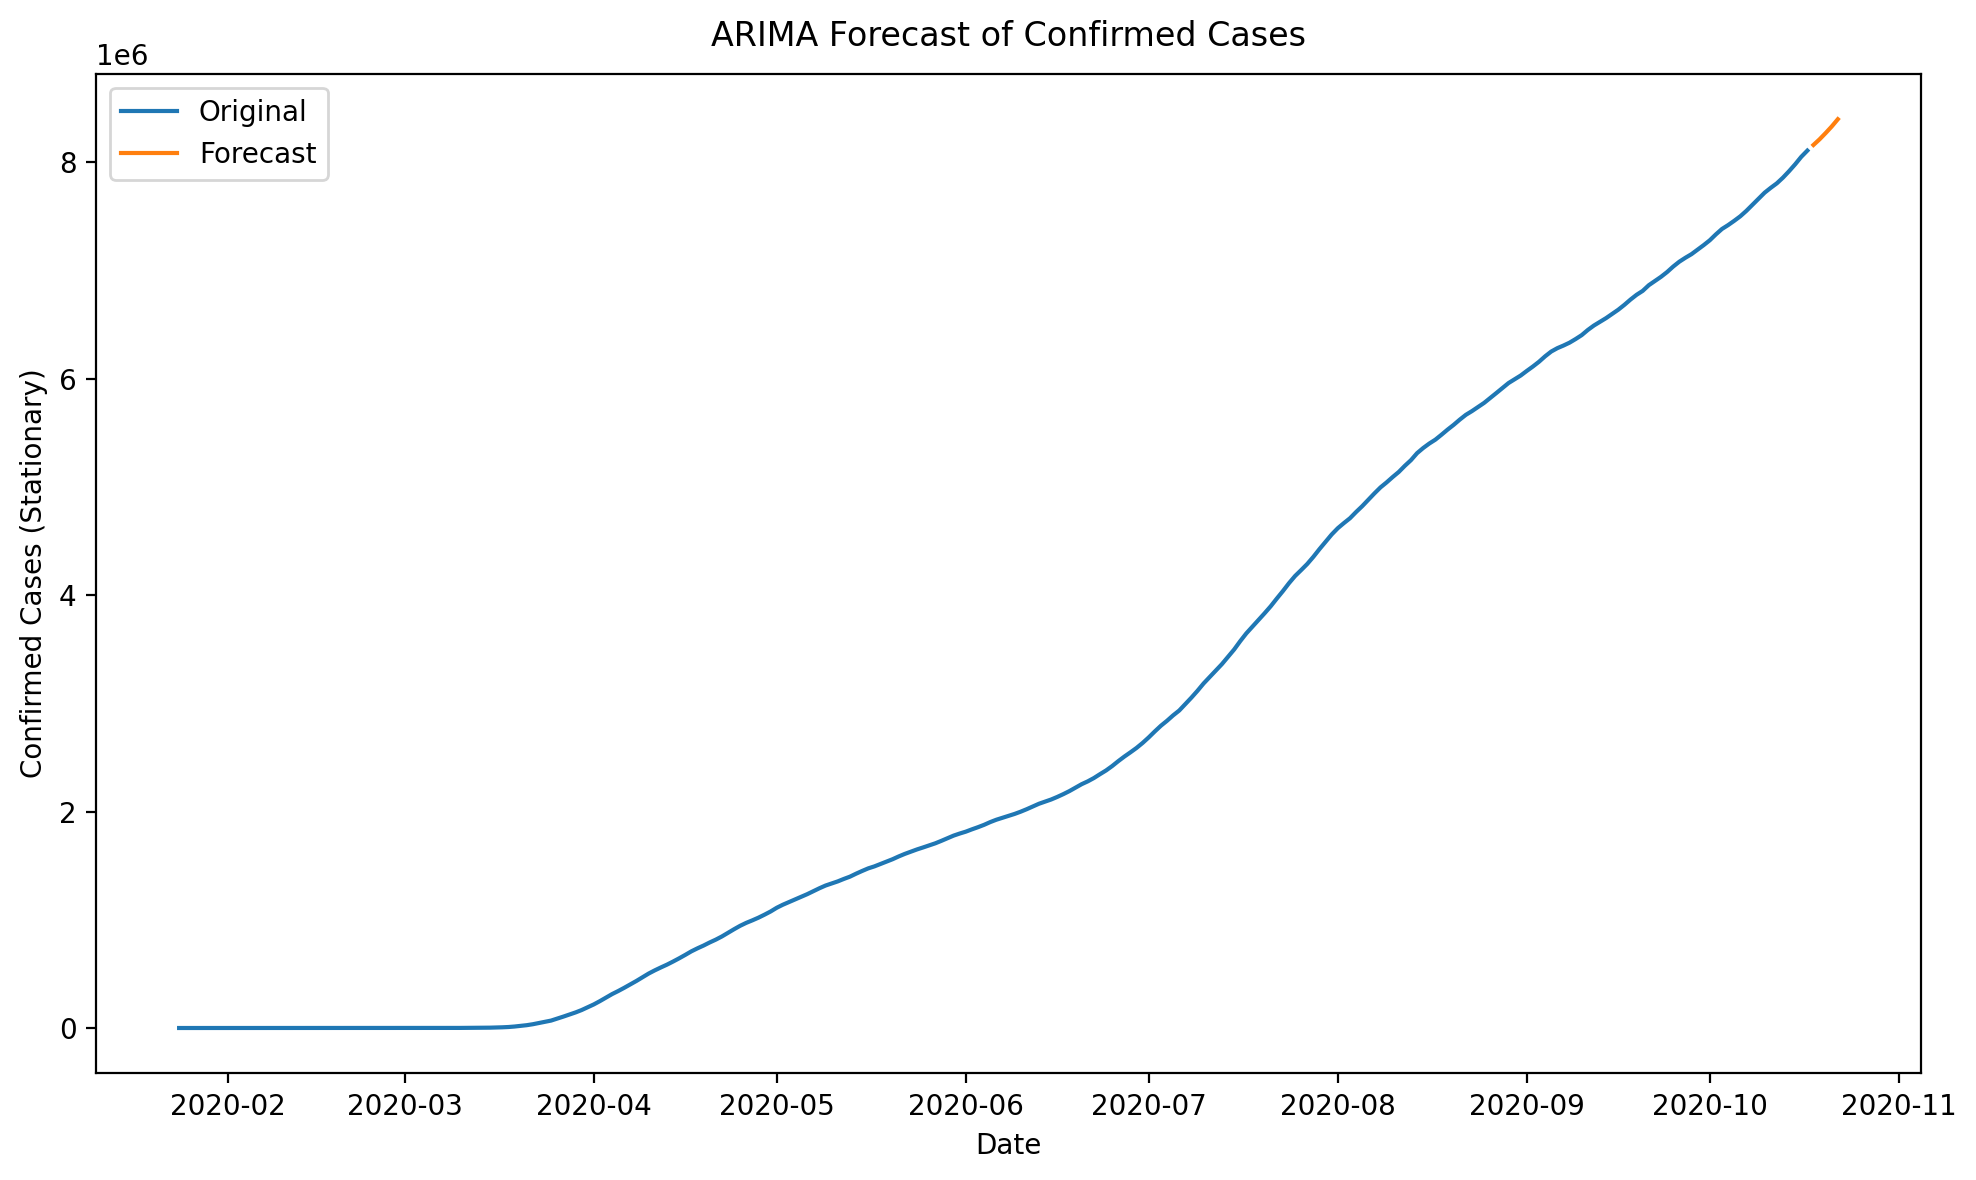

In [341]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit ARIMA model
model = ARIMA(df_usa['Confirmed'], order=(1, 2, 15))
results = model.fit()

# Print model summary
forecast = results.forecast(steps=5)  # Adjust steps for the number of days you want to forecast

# Plot the original series and forecast
plt.plot(df_usa.index, df_usa['Confirmed'], label='Original')
plt.plot(forecast.index, forecast.values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (Stationary)')
plt.title('ARIMA Forecast of Confirmed Cases')
plt.legend()
plt.show()

## Iteration 2

In [342]:
df_usa

Confirmed   Recovered  Deaths  Time  Confirmed_diff  \
Date                                                              
2020-01-24          2       0.000       0     2           1.000   
2020-01-25          2       0.000       0     3           0.000   
2020-01-26          5       0.000       0     4           3.000   
2020-01-27          5       0.000       0     5           0.000   
2020-01-28          5       0.000       0     6           0.000   
...               ...         ...     ...   ...             ...   
2020-10-13    7856605 3124593.000  215887   265       52406.000   
2020-10-14    7916099 3155794.000  216872   266       59494.000   
2020-10-15    7979709 3177397.000  217692   267       63610.000   
2020-10-16    8048865 3197539.000  218575   268       69156.000   
2020-10-17    8106384 3220573.000  219286   269       57519.000   

            Confirmed_diff2  
Date                         
2020-01-24            1.000  
2020-01-25           -1.000  
2020-01-26            3.000  
2020-01-27           -3.000  
2020-01-28            0.000  
...                     ...  
2020-10-13        10753.000  
2020-10-14         7088.000  
2020-10-15         4116.000  
2020-10-16         5546.000  
2020-10-17       -11637.000  

[268 rows x 6 columns]

Rolling Mean and Rolling Standard Deviation Plots:

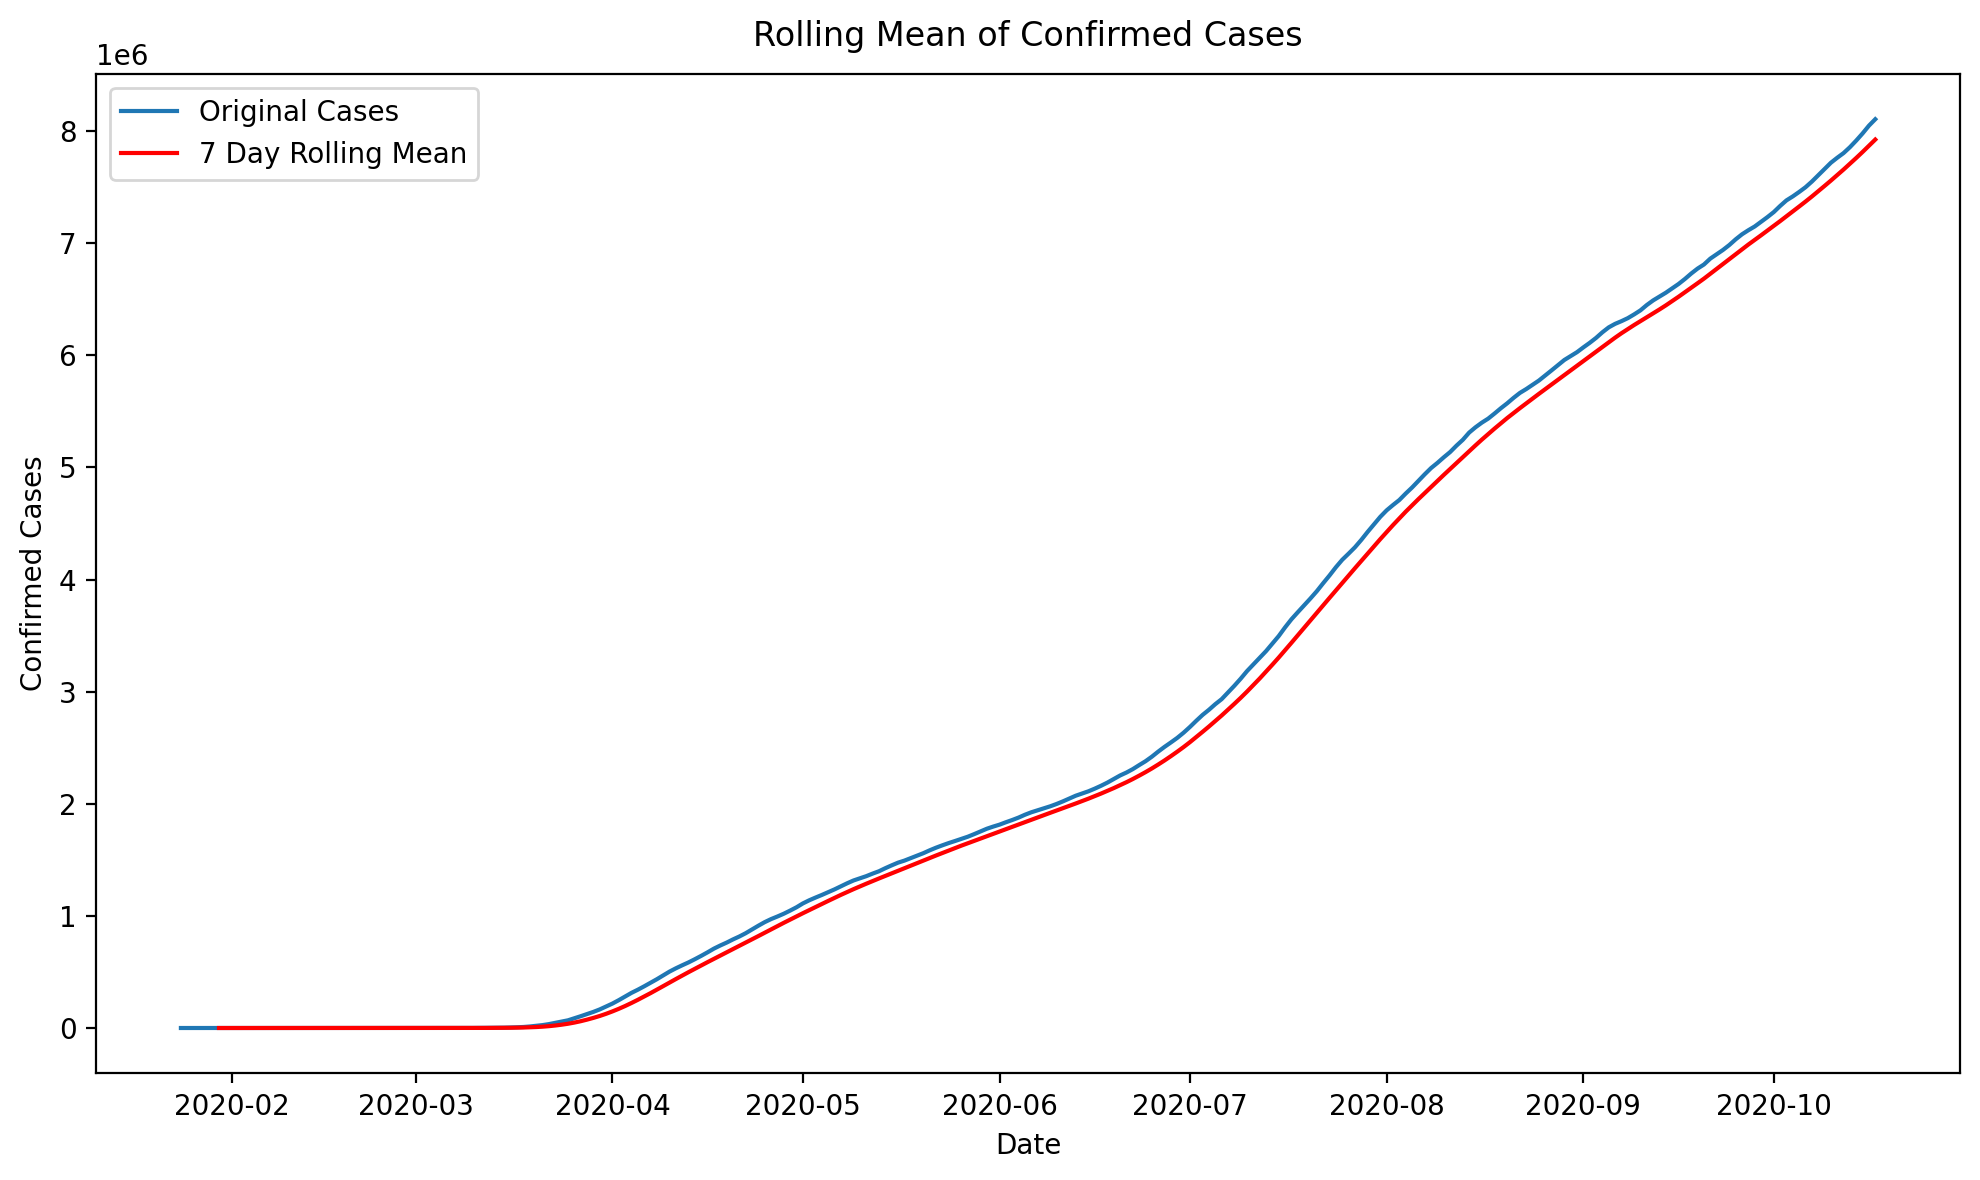

In [343]:
roll_mean = df_usa['Confirmed'].rolling(window=7).mean()
#roll_mean[7:]

plt.plot(df_usa.index,df_usa['Confirmed'],label = 'Original Cases')

plt.plot(df_usa.index, roll_mean, label='7 Day Rolling Mean', color='red')

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Rolling Mean of Confirmed Cases')
plt.legend()

plt.show()

this close resemblance btw Rolling Mean and Original Data suggests that there are no fluctuations in data that needs to be smoothened out

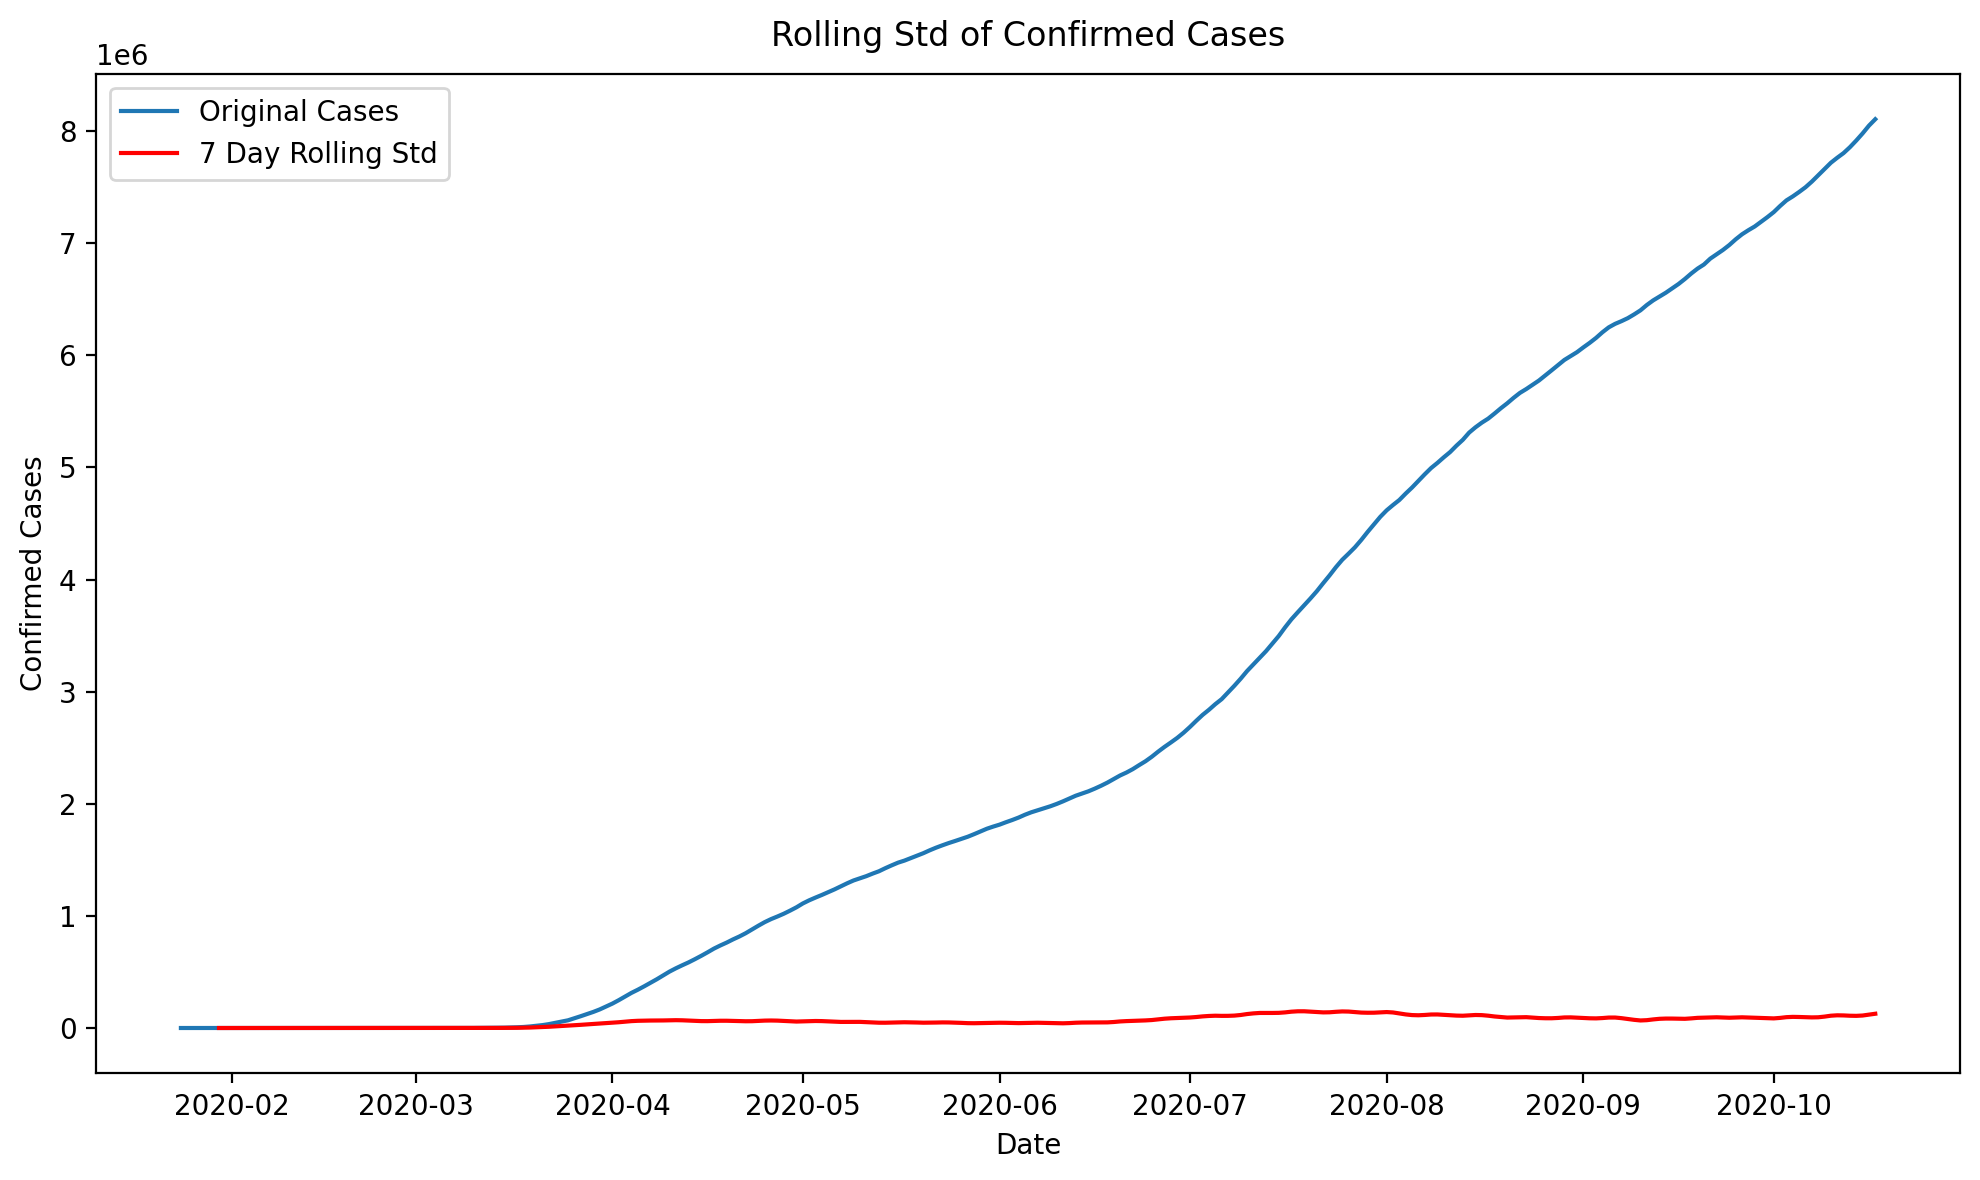

In [344]:
roll_std = df_usa['Confirmed'].rolling(window=7).std()

plt.plot(df_usa.index,df_usa['Confirmed'],label = 'Original Cases')

plt.plot(df_usa.index, roll_std, label='7 Day Rolling Std', color='red')

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Rolling Std of Confirmed Cases')
plt.legend()

plt.show()

not any spikes in std graph indicates no sudden variability in data

### Modeling

In [345]:
# 1. Split the data into train and test sets
train_size = int(len(df_usa) * 0.8)  # Use 80% of the data for training
train_data = df_usa.iloc[:train_size]
test_data = df_usa.iloc[train_size:]

In [346]:
# 2. Train the ARIMA model using the training set
model = ARIMA(train_data['Confirmed'], order=(9, 2, 2))
results = model.fit()

/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [347]:
#3. Make forecasts for the test set
out = results.forecast(steps=len(test_data))  # Forecast for the entire test set

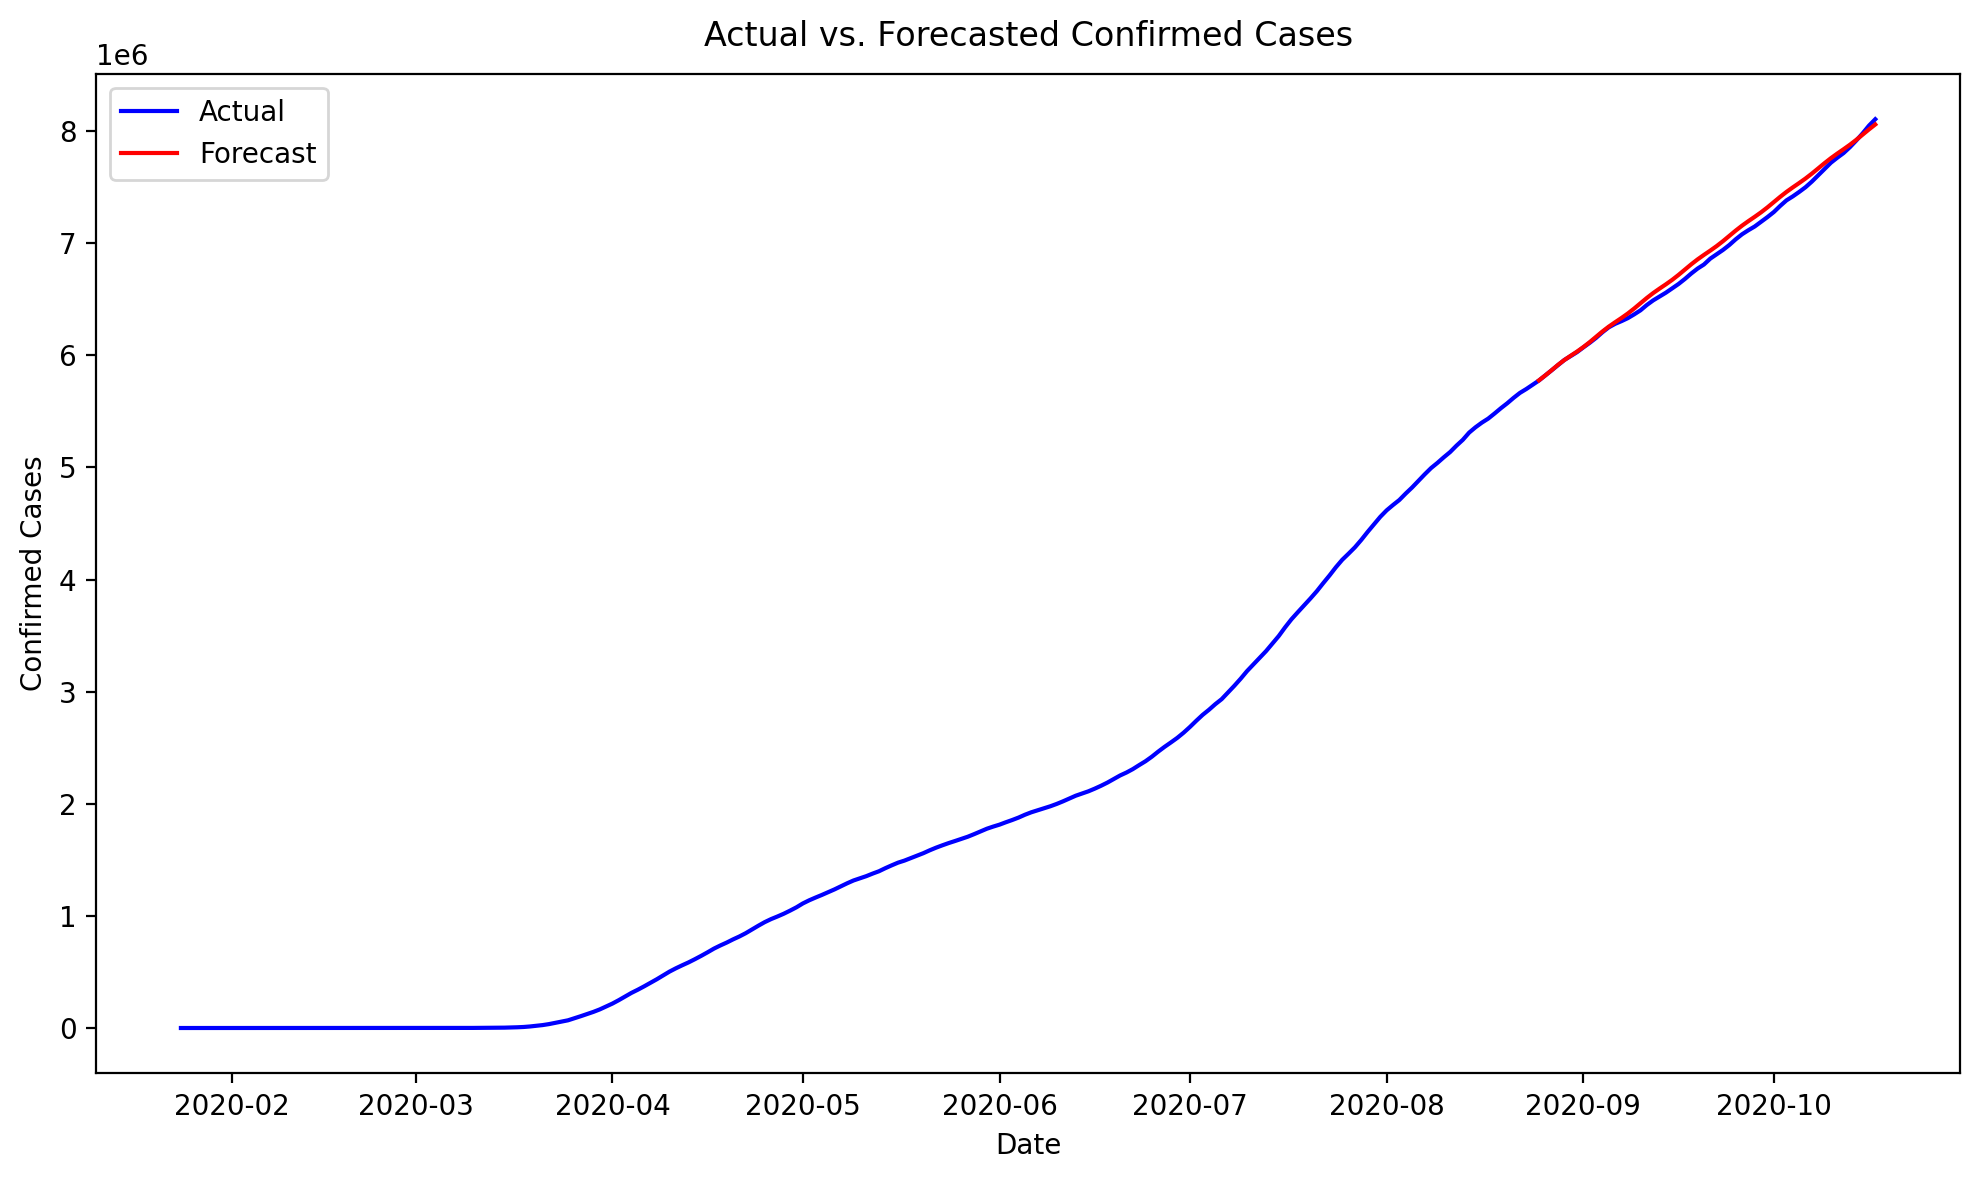

In [348]:
plt.plot(df_usa.index, df_usa['Confirmed'], label='Actual', color='blue')

# Plot forecasted values
plt.plot(test_data.index, out, label='Forecast', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs. Forecasted Confirmed Cases')

# Show legend
plt.legend()

# Show plot
plt.show()

In [349]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 3)

In [350]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data['Confirmed'], out)
rmse = mean_squared_error(test_data['Confirmed'], out, squared=False)

print(f"Mean Abs % Error : {mean_absolute_percentage_error(test_data['Confirmed'],out)}%")
# print("Mean Absolute Error:", mae)
# print("Root Mean Squared Error:", rmse)


Mean Abs % Error : 0.714%


In [351]:
# Calculate quartiles
q1 = df_usa['Confirmed_diff2'].abs().quantile(0.25)
q2 = df_usa['Confirmed_diff2'].abs().quantile(0.50)  # Median
q3 = df_usa['Confirmed_diff2'].abs().quantile(0.75)

# Print quartile statistics
print("1st Quartile (Q1):", q1)
print("2nd Quartile (Q2, Median):", q2)
print("3rd Quartile (Q3):", q3)

1st Quartile (Q1): 610.5
2nd Quartile (Q2, Median): 2377.5
3rd Quartile (Q3): 4973.0


## Iteration 3

from scratch

In [352]:
#df sent here should have just the confirmed cases parameters, when data has becom stationary

def AR(p,df):
  df_temp = df.copy()

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp[f'Shifted_values_{i}' ] = df_temp['Values'].shift(i)

  train_size = (int)(0.8 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = df_temp.iloc[:train_size,:]
  df_test = df_temp.iloc[train_size:,]

  df_train_2 = df_train.dropna().copy()  
  #X contains only the lagged values ,hence we skip the first column which we are to predict
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T #weights
  intercept = lr.intercept_
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # df_train_2[['Value','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  # df_test[['Value','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['Values'], df_test['Predicted_Values']))

  print(f"The RMSE is : {RMSE:.3f}, Value of p : {p}")
  return [df_train_2,df_test,theta,intercept,RMSE]


In [353]:
# best value for p
test_df = pd.DataFrame({'Values':df_usa['Confirmed_diff2']})

best_rmse = np.inf
best_p = -1

for i in range(1,30):
    [df_train,df_test,theta,intercept,RMSE] = AR(i,test_df)

    if RMSE<best_rmse:
        best_rmse = RMSE
        best_p = i

print(f'The Best value of p is {best_p} with RMSE of {best_rmse}')

The RMSE is : 6968.944, Value of p : 1
The RMSE is : 6940.194, Value of p : 2
The RMSE is : 6764.537, Value of p : 3
The RMSE is : 6517.850, Value of p : 4
The RMSE is : 5653.380, Value of p : 5
The RMSE is : 5787.413, Value of p : 6
The RMSE is : 5790.306, Value of p : 7
The RMSE is : 5037.572, Value of p : 8
The RMSE is : 5023.869, Value of p : 9
The RMSE is : 5028.167, Value of p : 10
The RMSE is : 5117.685, Value of p : 11
The RMSE is : 5120.015, Value of p : 12
The RMSE is : 5129.426, Value of p : 13
The RMSE is : 5123.667, Value of p : 14
The RMSE is : 5496.803, Value of p : 15
The RMSE is : 5477.688, Value of p : 16
The RMSE is : 5495.275, Value of p : 17
The RMSE is : 5492.727, Value of p : 18
The RMSE is : 5460.112, Value of p : 19
The RMSE is : 5556.512, Value of p : 20
The RMSE is : 5504.636, Value of p : 21
The RMSE is : 5588.788, Value of p : 22
The RMSE is : 5650.346, Value of p : 23
The RMSE is : 5676.294, Value of p : 24
The RMSE is : 5794.432, Value of p : 25
The RMSE 

/tmp/ipykernel_55498/2378746225.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
/tmp/ipykernel_55498/2378746225.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
/tmp/ipykernel_55498/2378746225.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/tmp/ipykernel_55498/2378746225.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_


The RMSE is : 5023.869, Value of p : 9


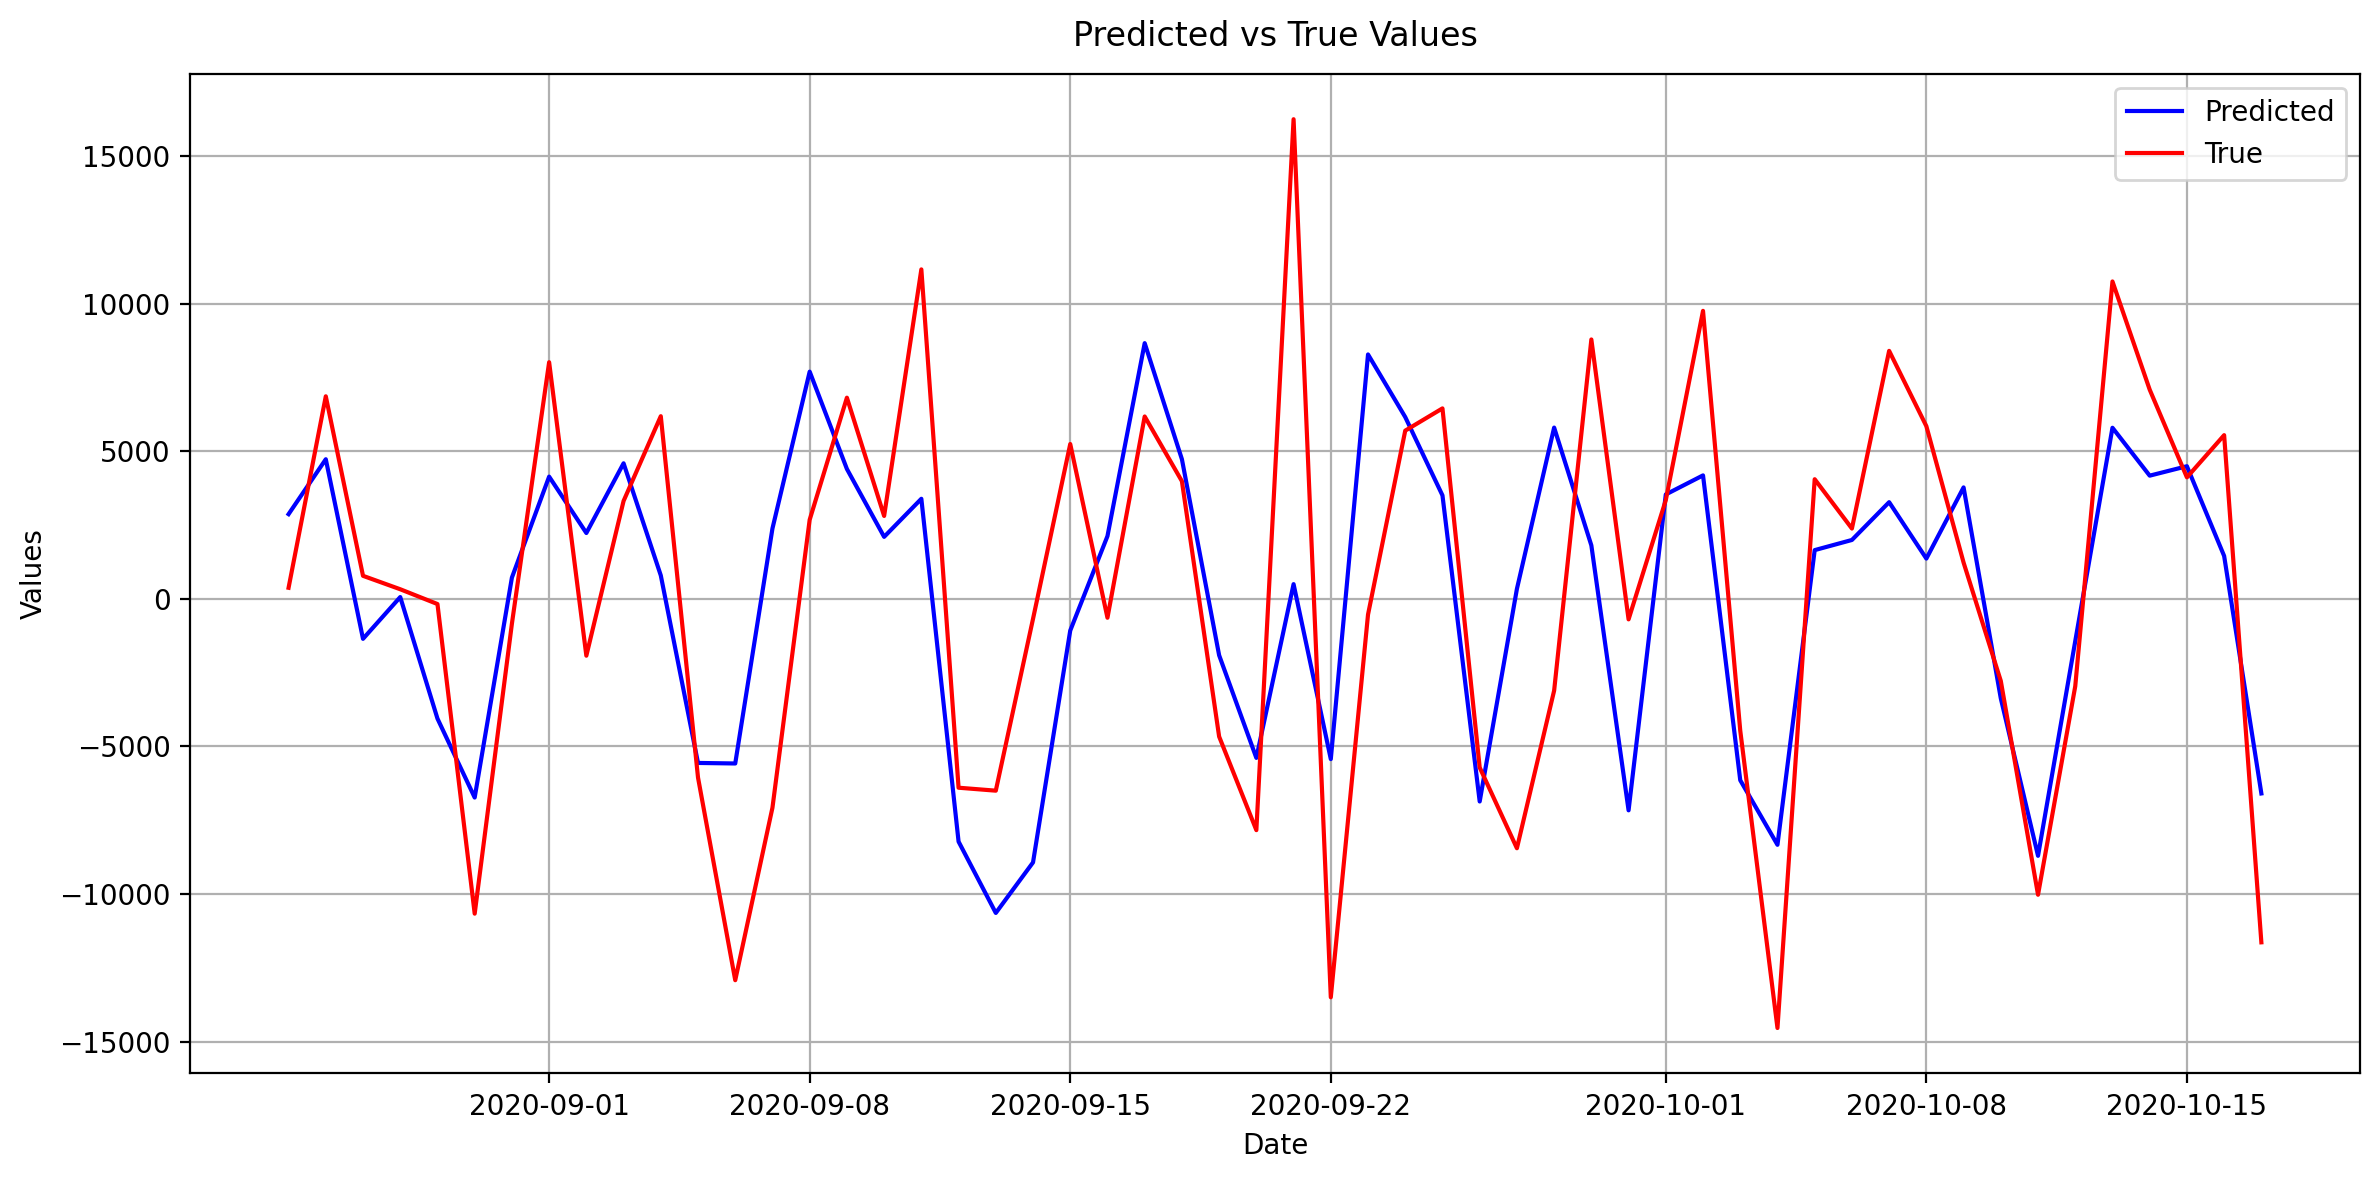

In [354]:
test_df = pd.DataFrame({'Values':df_usa['Confirmed_diff2']})
[df_train,df_test,theta,intercept,RMSE] = AR(best_p,test_df)

plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Predicted_Values'], color='blue', label='Predicted')
plt.plot(df_test.index, df_test['Values'], color='red', label='True')  # Perfect prediction line
plt.title('Predicted vs True Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

MA Model

In [355]:
test_df = pd.DataFrame({'Values':df_usa['Confirmed_diff2']})
[df_train,df_test,theta,intercept,RMSE] = AR(best_p,test_df)

df_c = pd.concat([df_train,df_test])
res = pd.DataFrame()
res['Residuals'] = df_c.Values - df_c.Predicted_Values

The RMSE is : 5023.869, Value of p : 9


/tmp/ipykernel_55498/2378746225.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_


<Axes: xlabel='Date'>

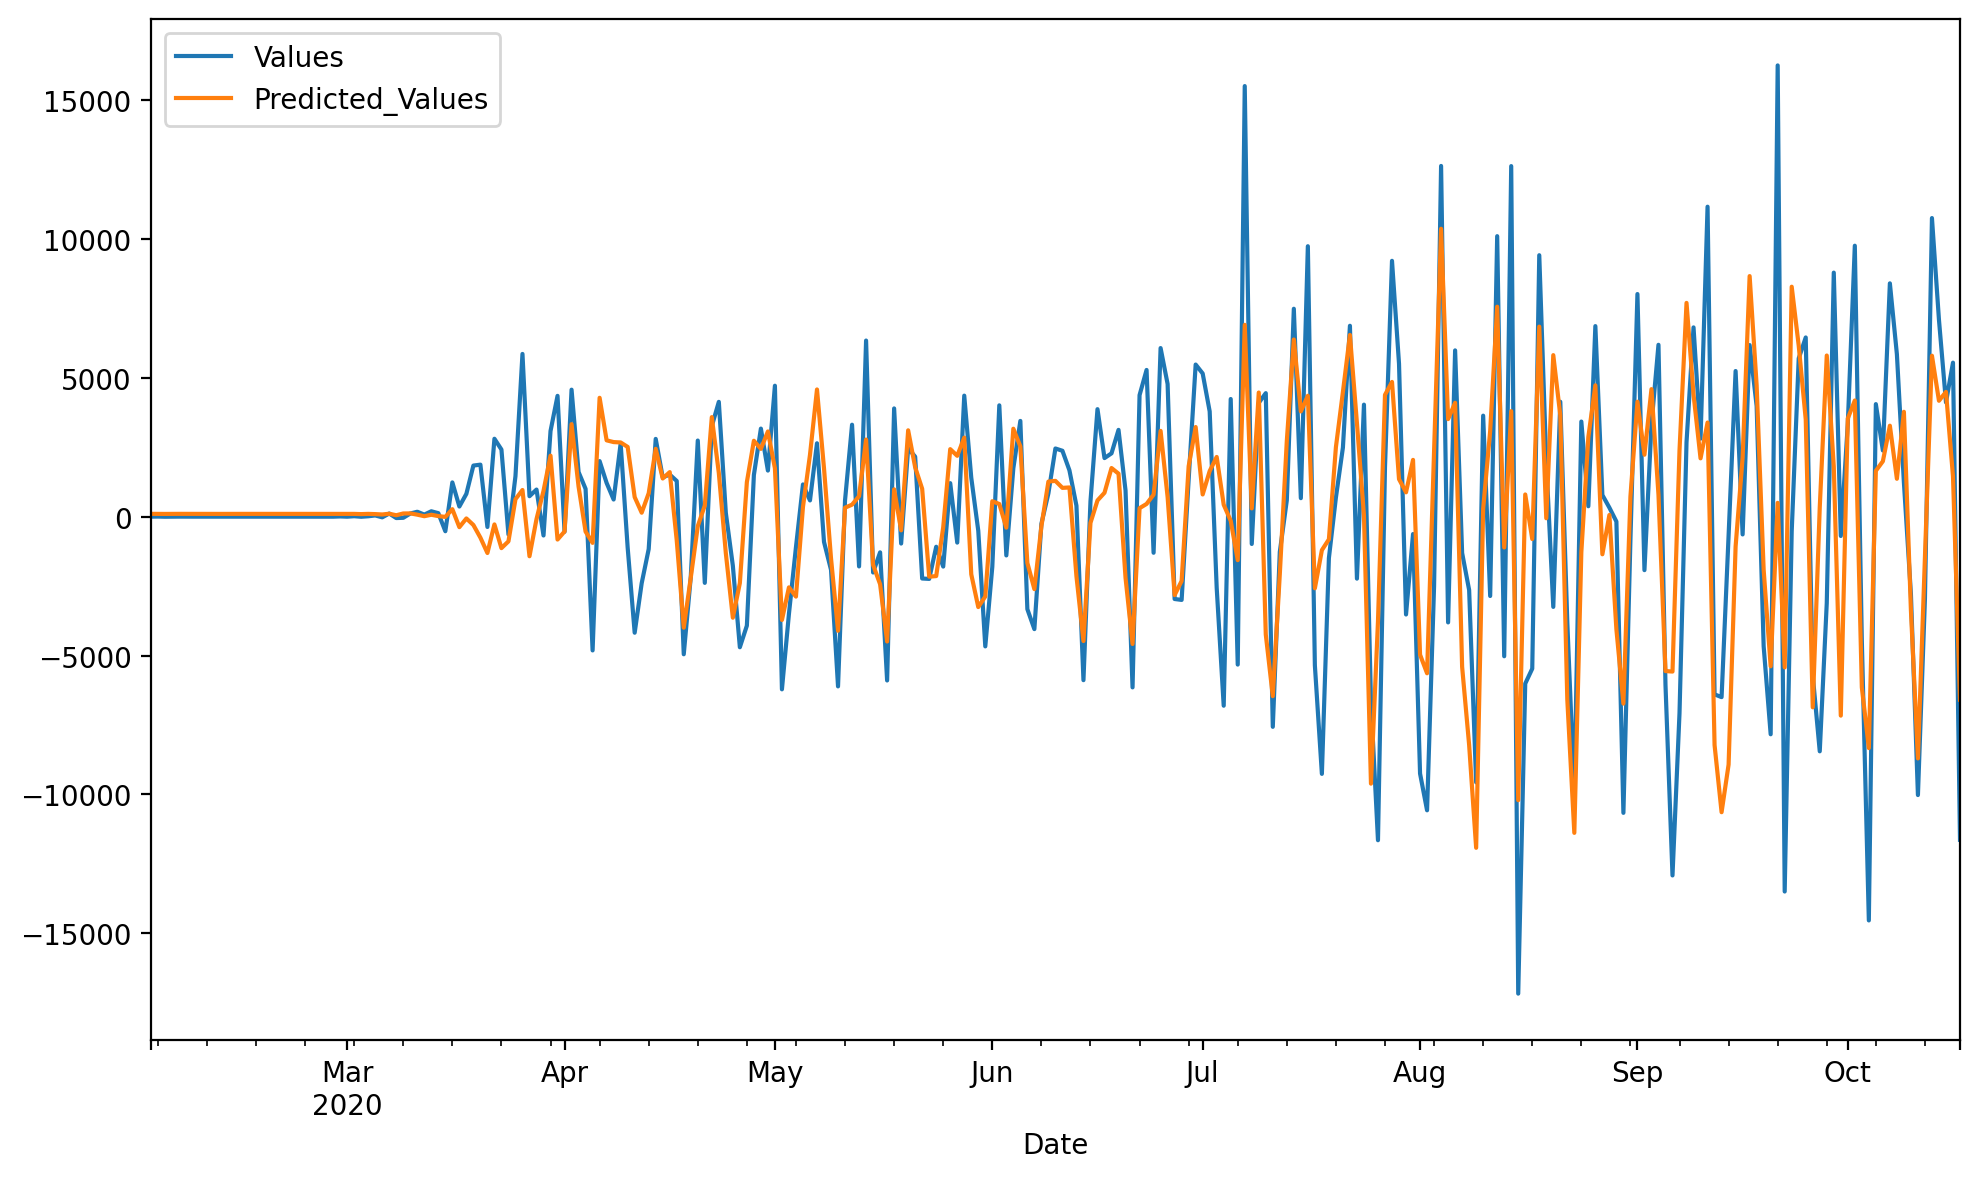

In [356]:
df_c[['Values','Predicted_Values']].plot()

Text(0, 0.5, 'Density')

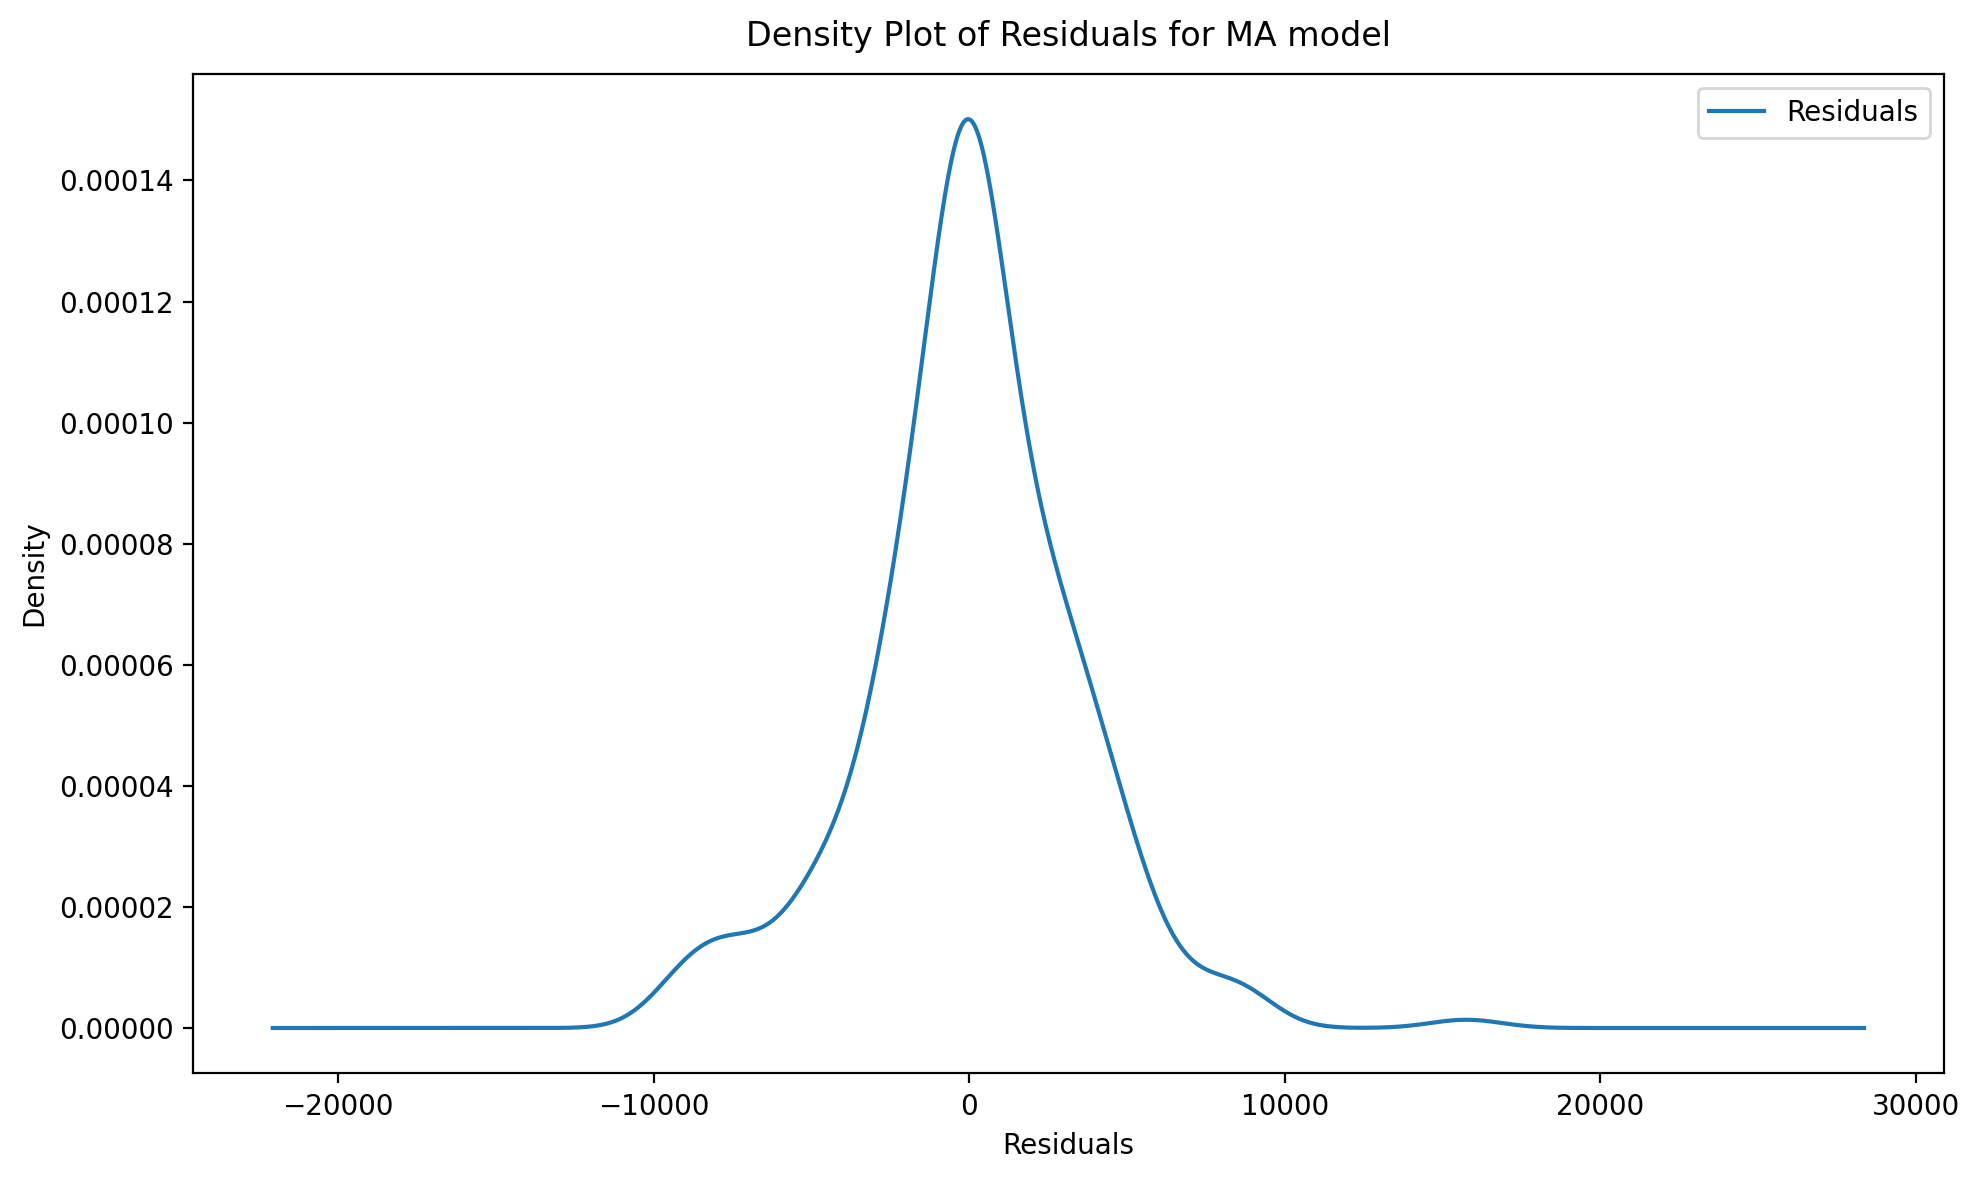

In [357]:
res.plot(kind='kde',title='Density Plot of Residuals for MA model')
plt.xlabel('Residuals')
plt.ylabel('Density')

In [358]:
def MA(q,res):

  for i in range(1,q+1):
    res[f'Shifted_values_{i}' ] = res['Residuals'].shift(i)

  train_size = (int)(0.8 * res.shape[0])

  res_train = pd.DataFrame(res[0:train_size])
  res_test = pd.DataFrame(res[train_size:res.shape[0]])

  res_train_2 = res_train.dropna().copy()
  X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
  y_train = res_train_2.iloc[:,0].values.reshape(-1,1)

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # res_train_2[['Residuals','Predicted_Values']].plot()

  X_test = res_test.iloc[:,1:].values.reshape(-1,q)
  res_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  res_test[['Residuals','Predicted_Values']].plot()

  from sklearn.metrics import mean_squared_error
  RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

  print(f"The RMSE is : {RMSE:.3f}, Value of q : {q}")
  return [res_train_2,res_test,theta,intercept,RMSE]

The RMSE is : 5107.431, Value of q : 1
The RMSE is : 5101.721, Value of q : 2
The RMSE is : 5104.541, Value of q : 3
The RMSE is : 5158.945, Value of q : 4
The RMSE is : 5192.168, Value of q : 5
The RMSE is : 5192.115, Value of q : 6
The RMSE is : 5183.240, Value of q : 7
The RMSE is : 5286.704, Value of q : 8
The RMSE is : 5300.031, Value of q : 9
The RMSE is : 5338.518, Value of q : 10
The Best value of q is 2 with RMSE of 5101.721114698592


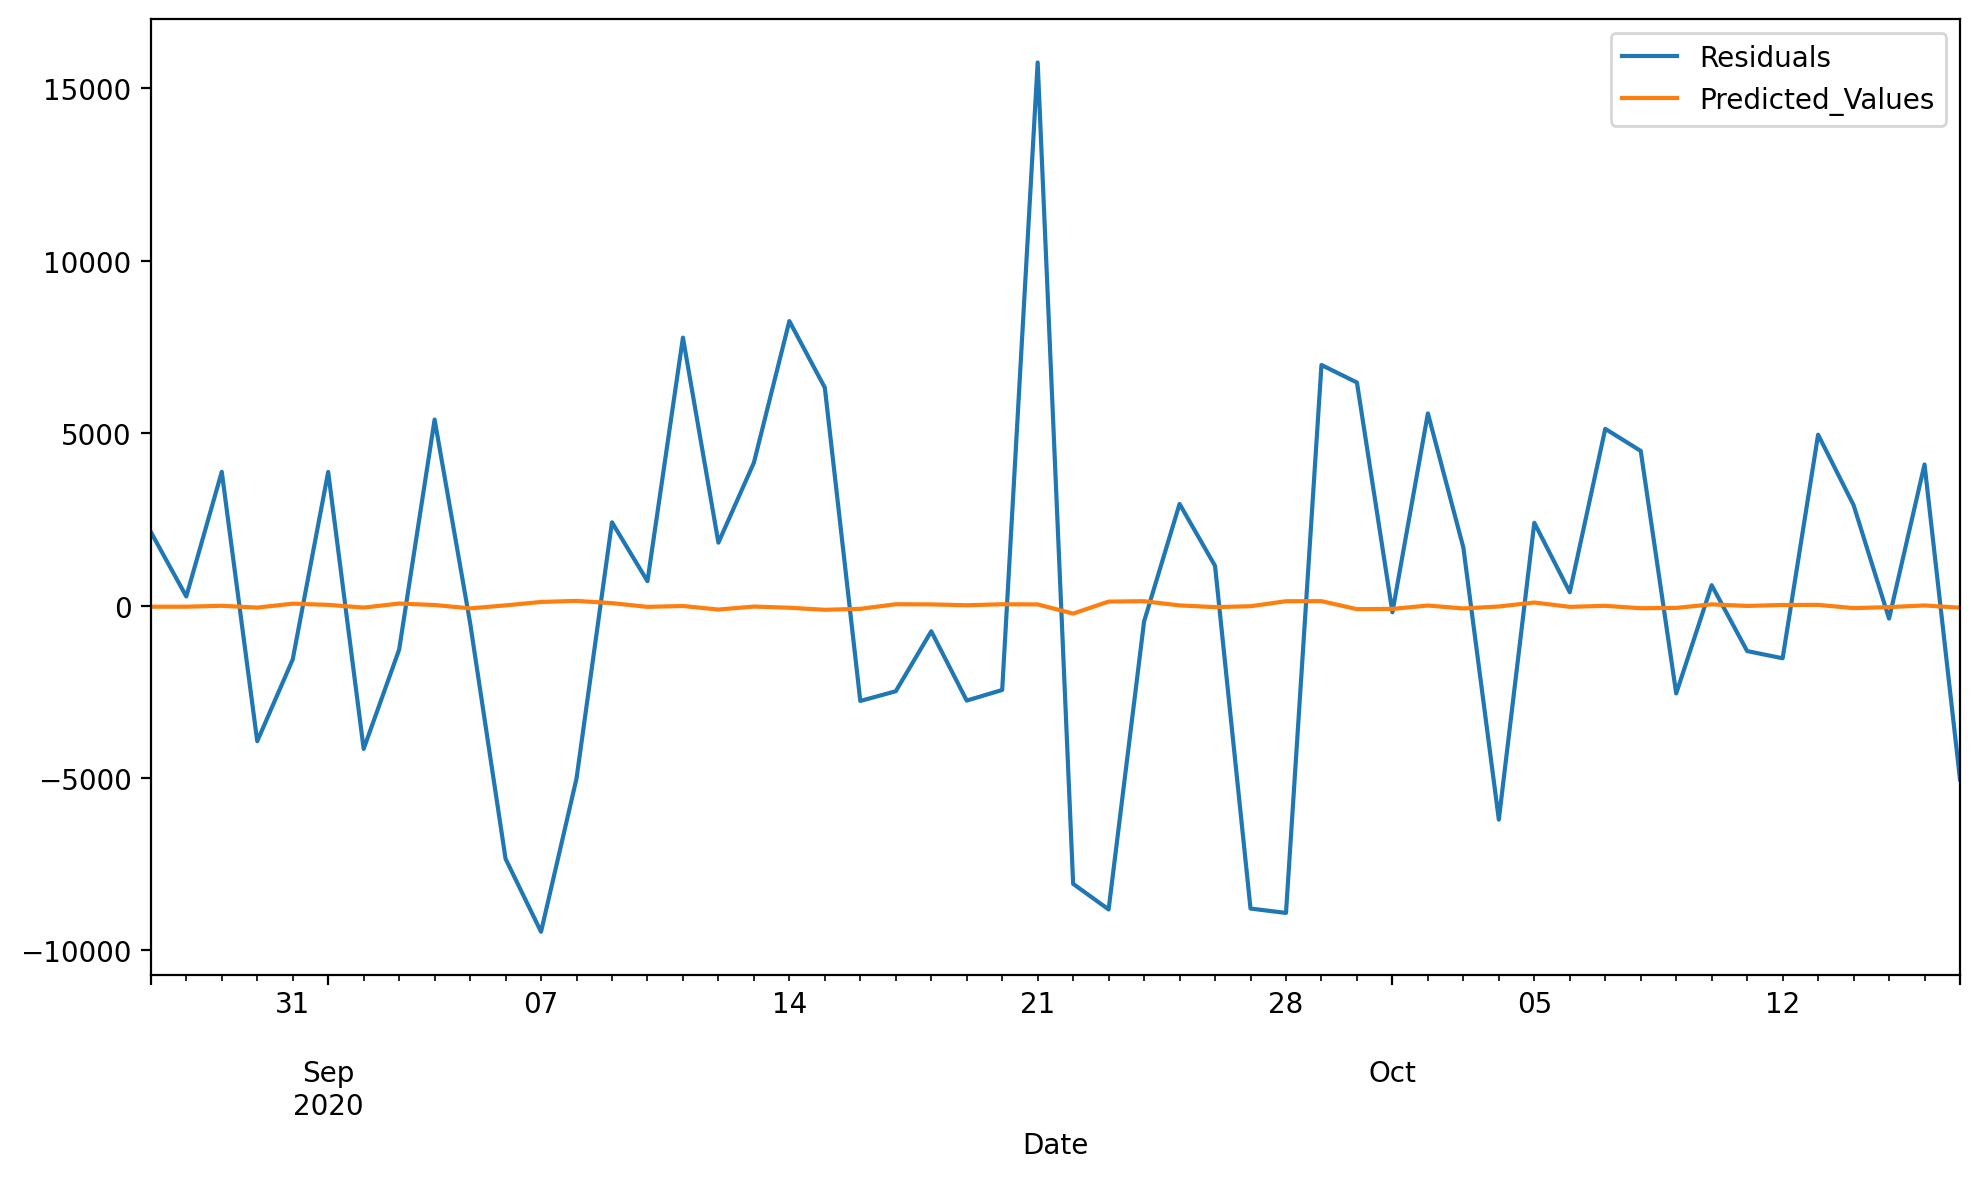

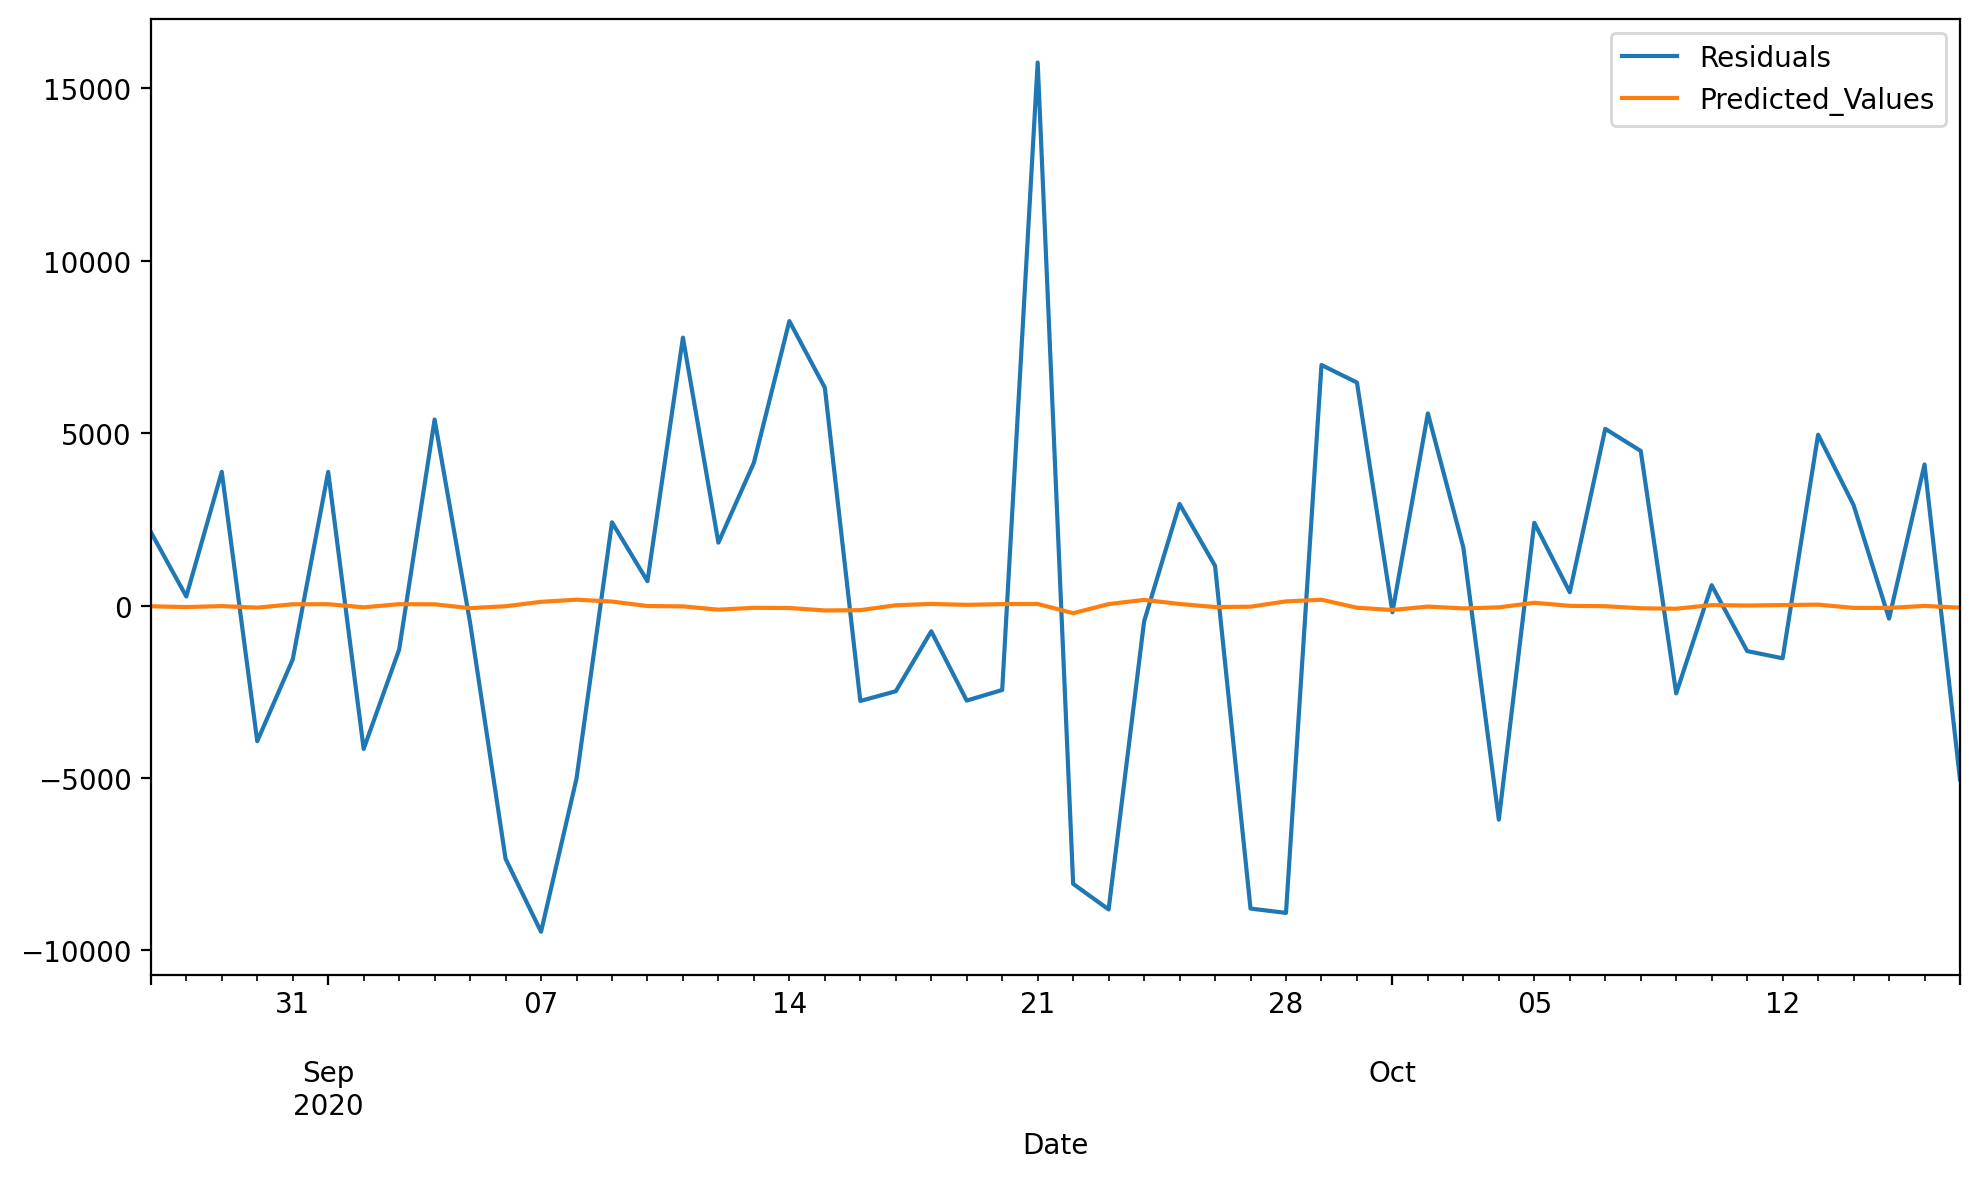

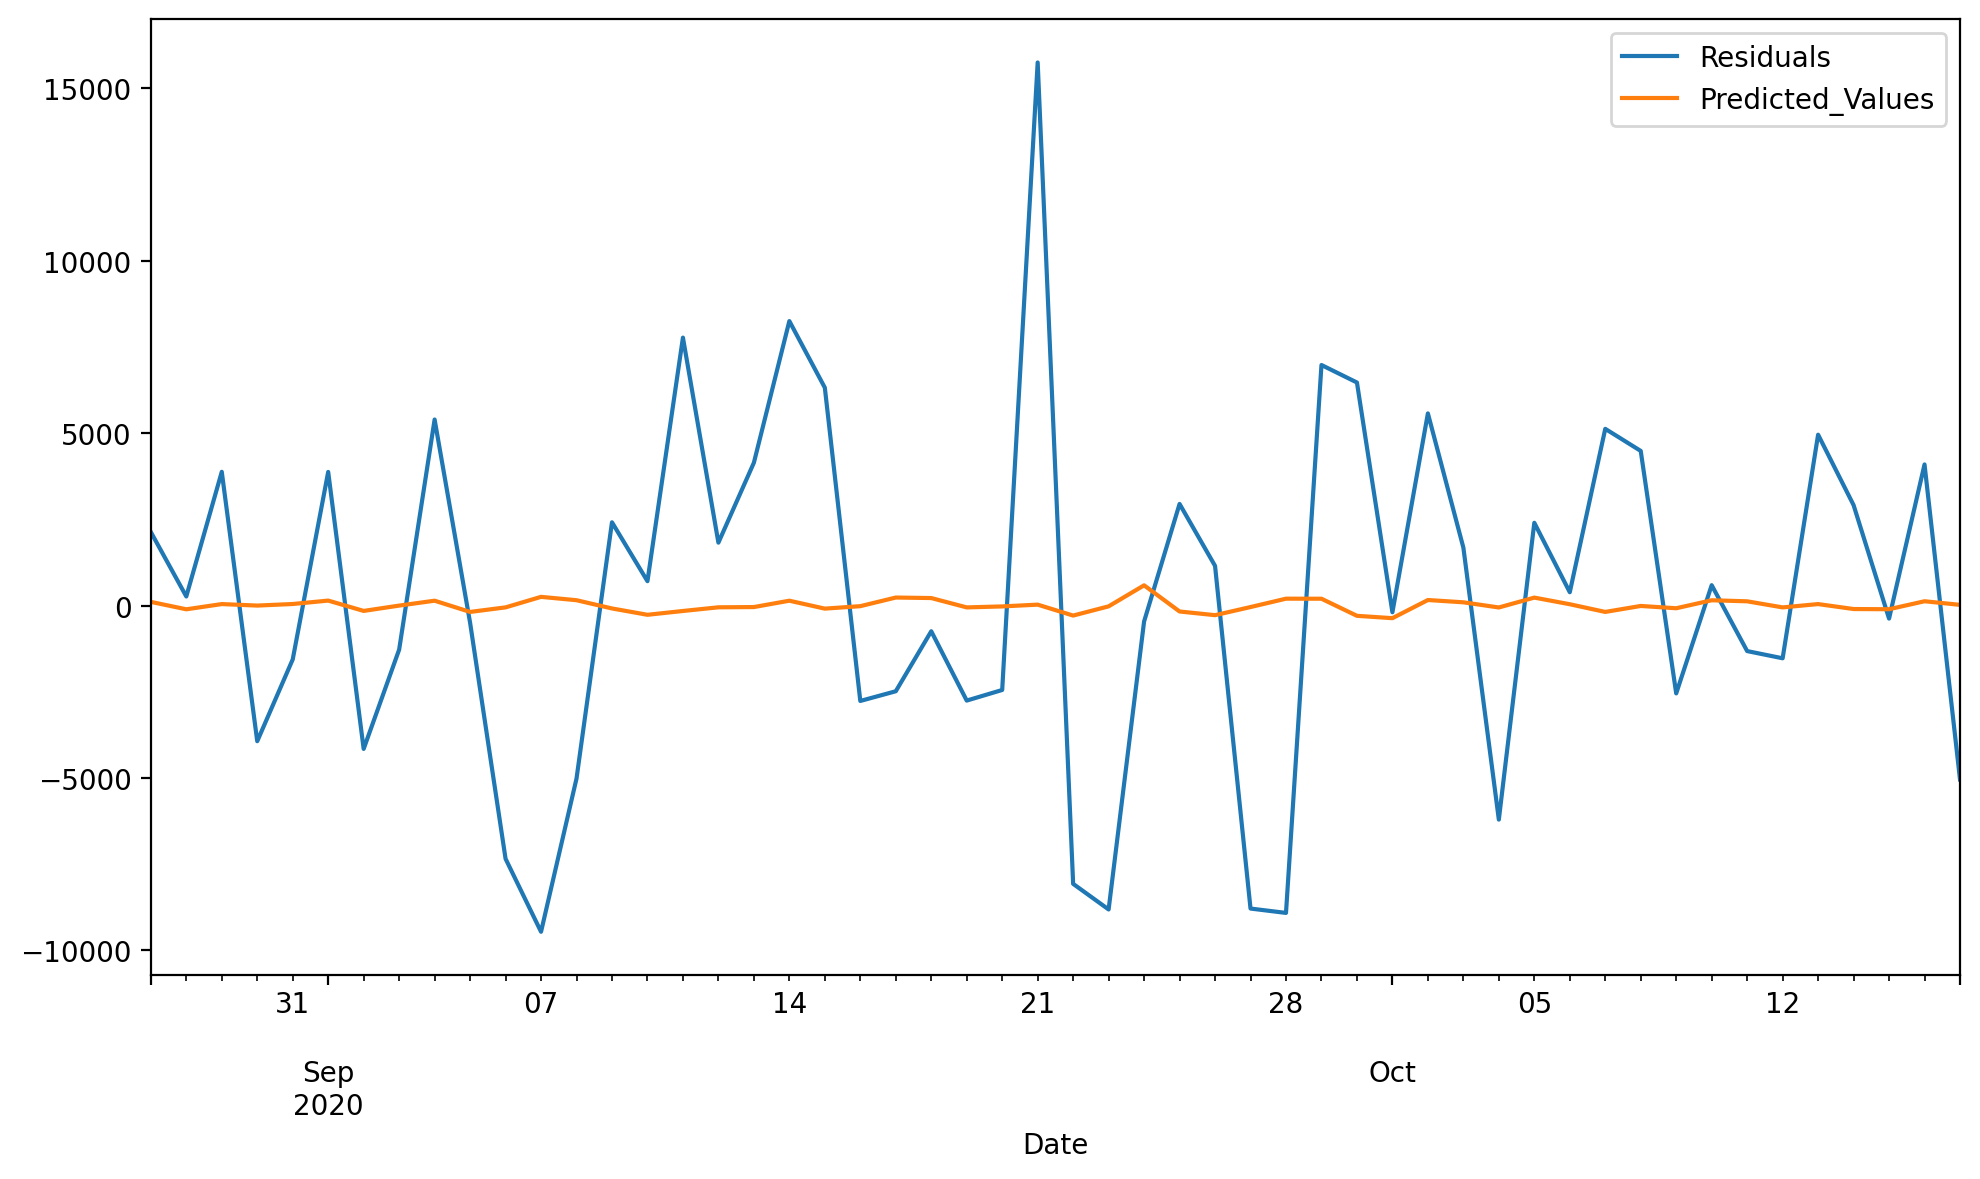

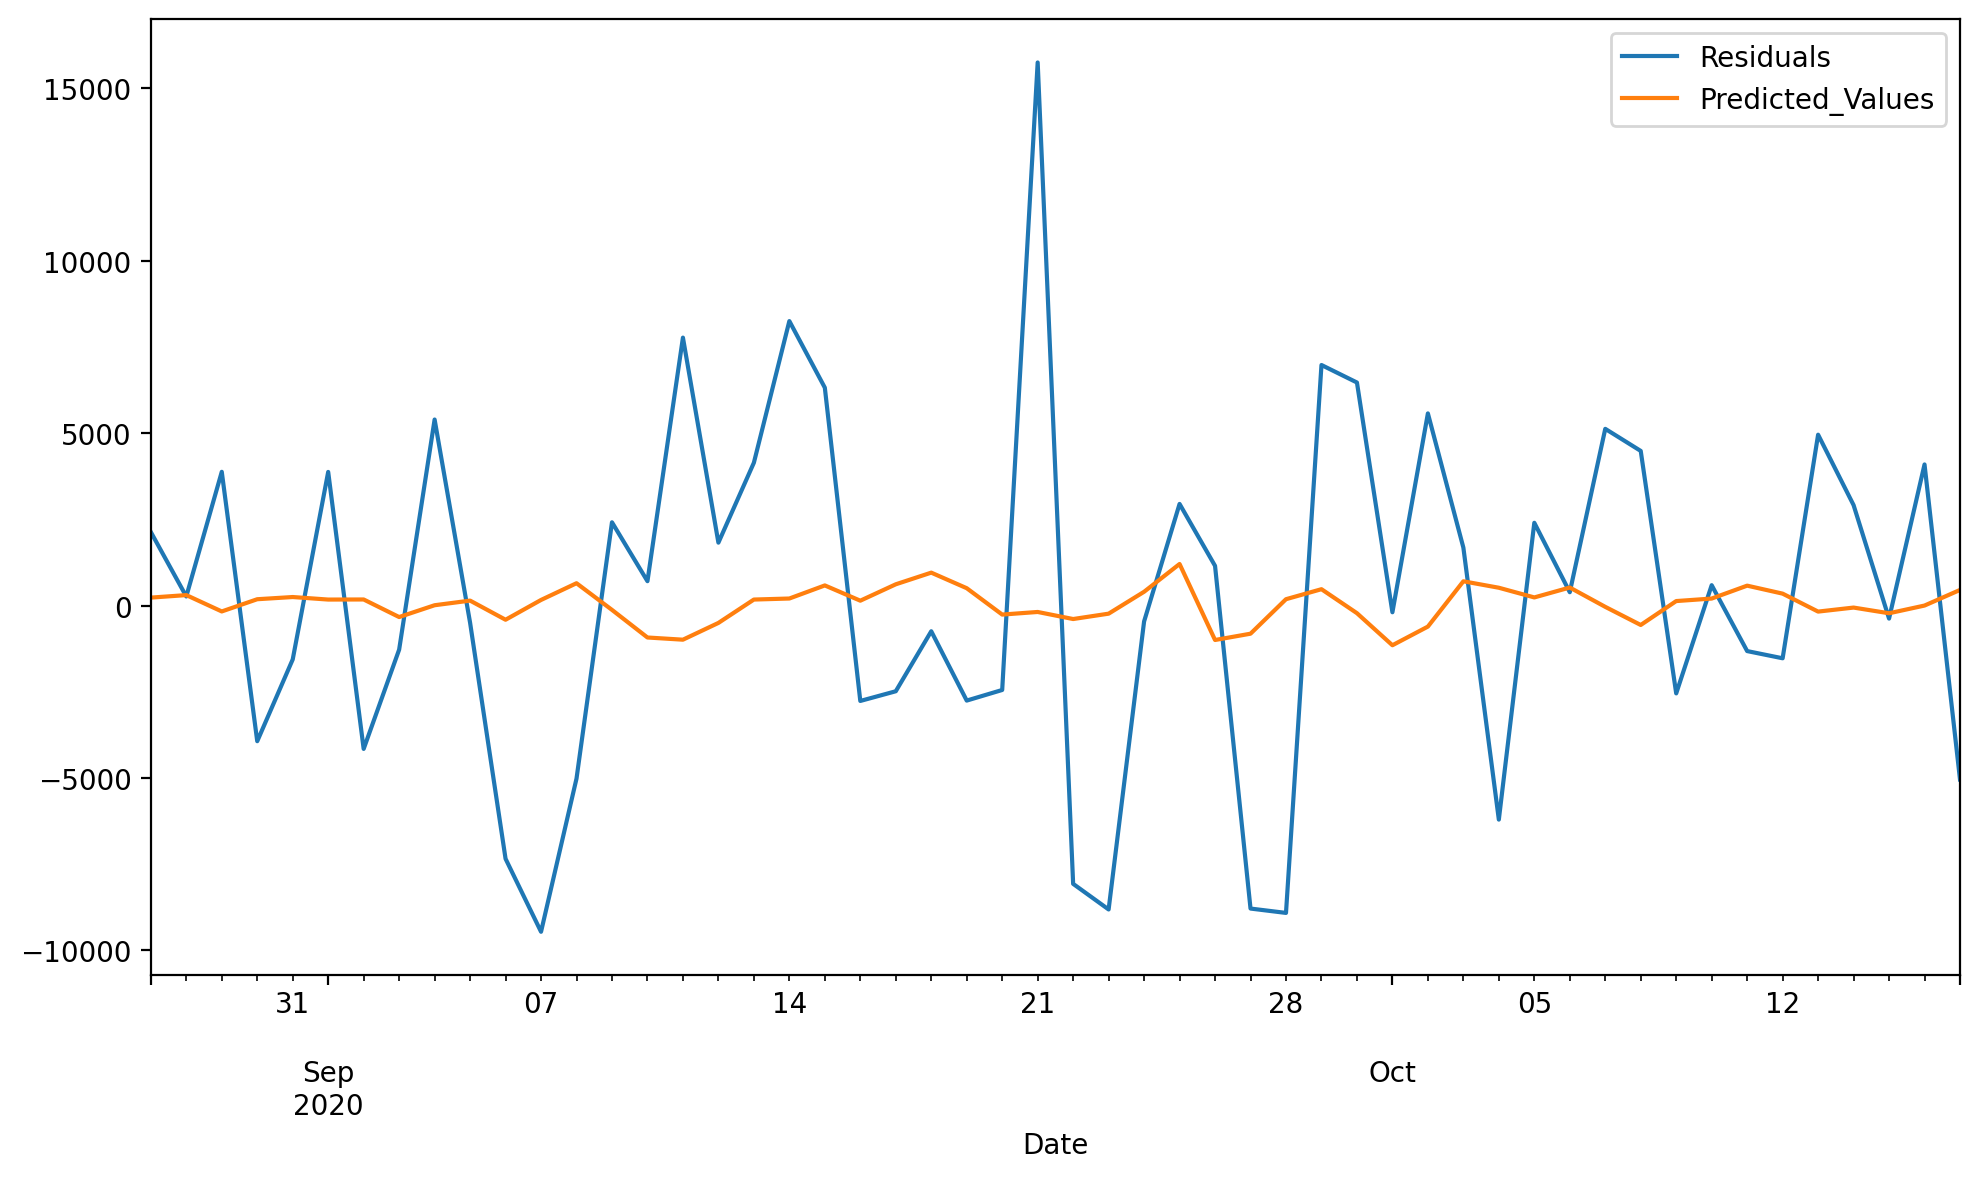

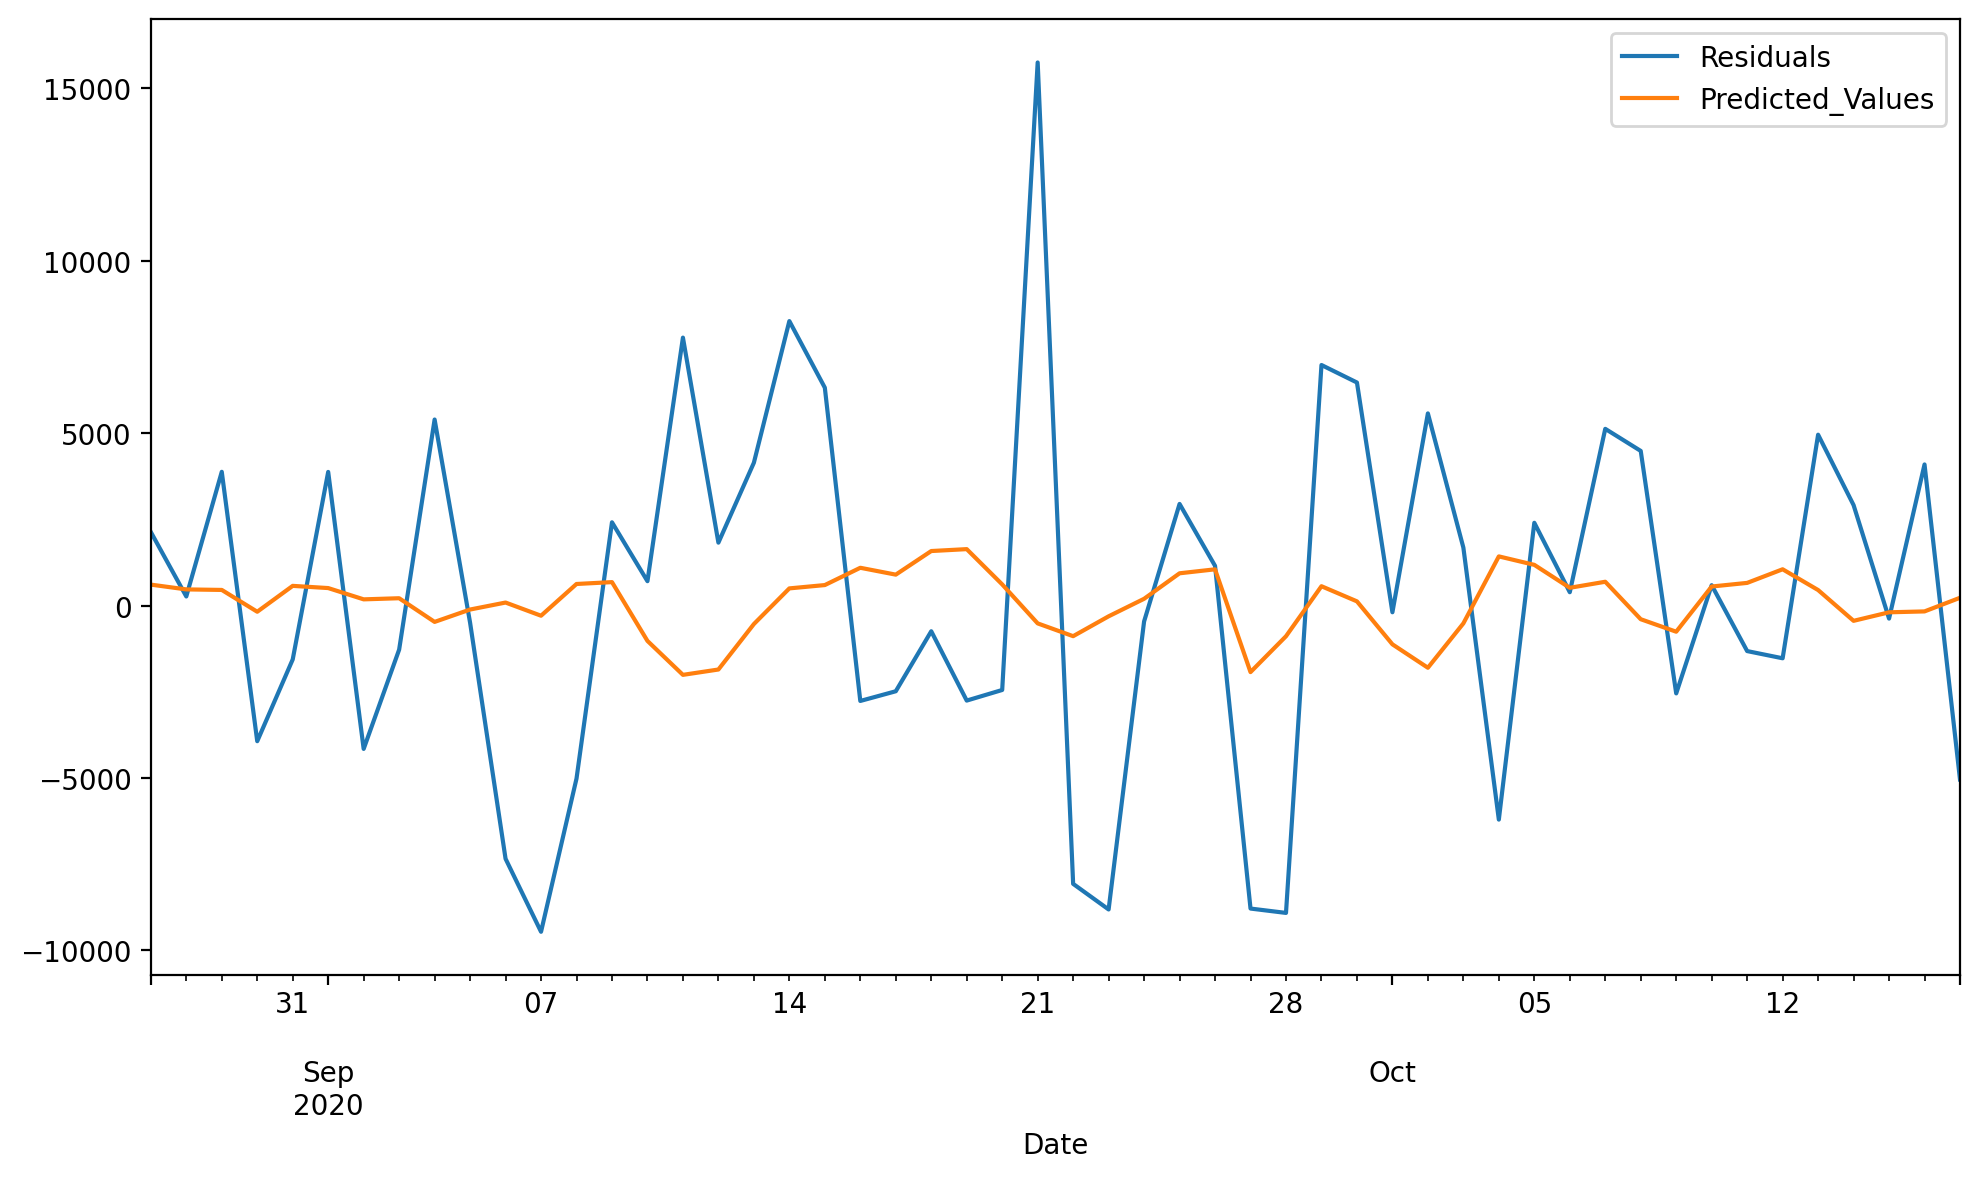

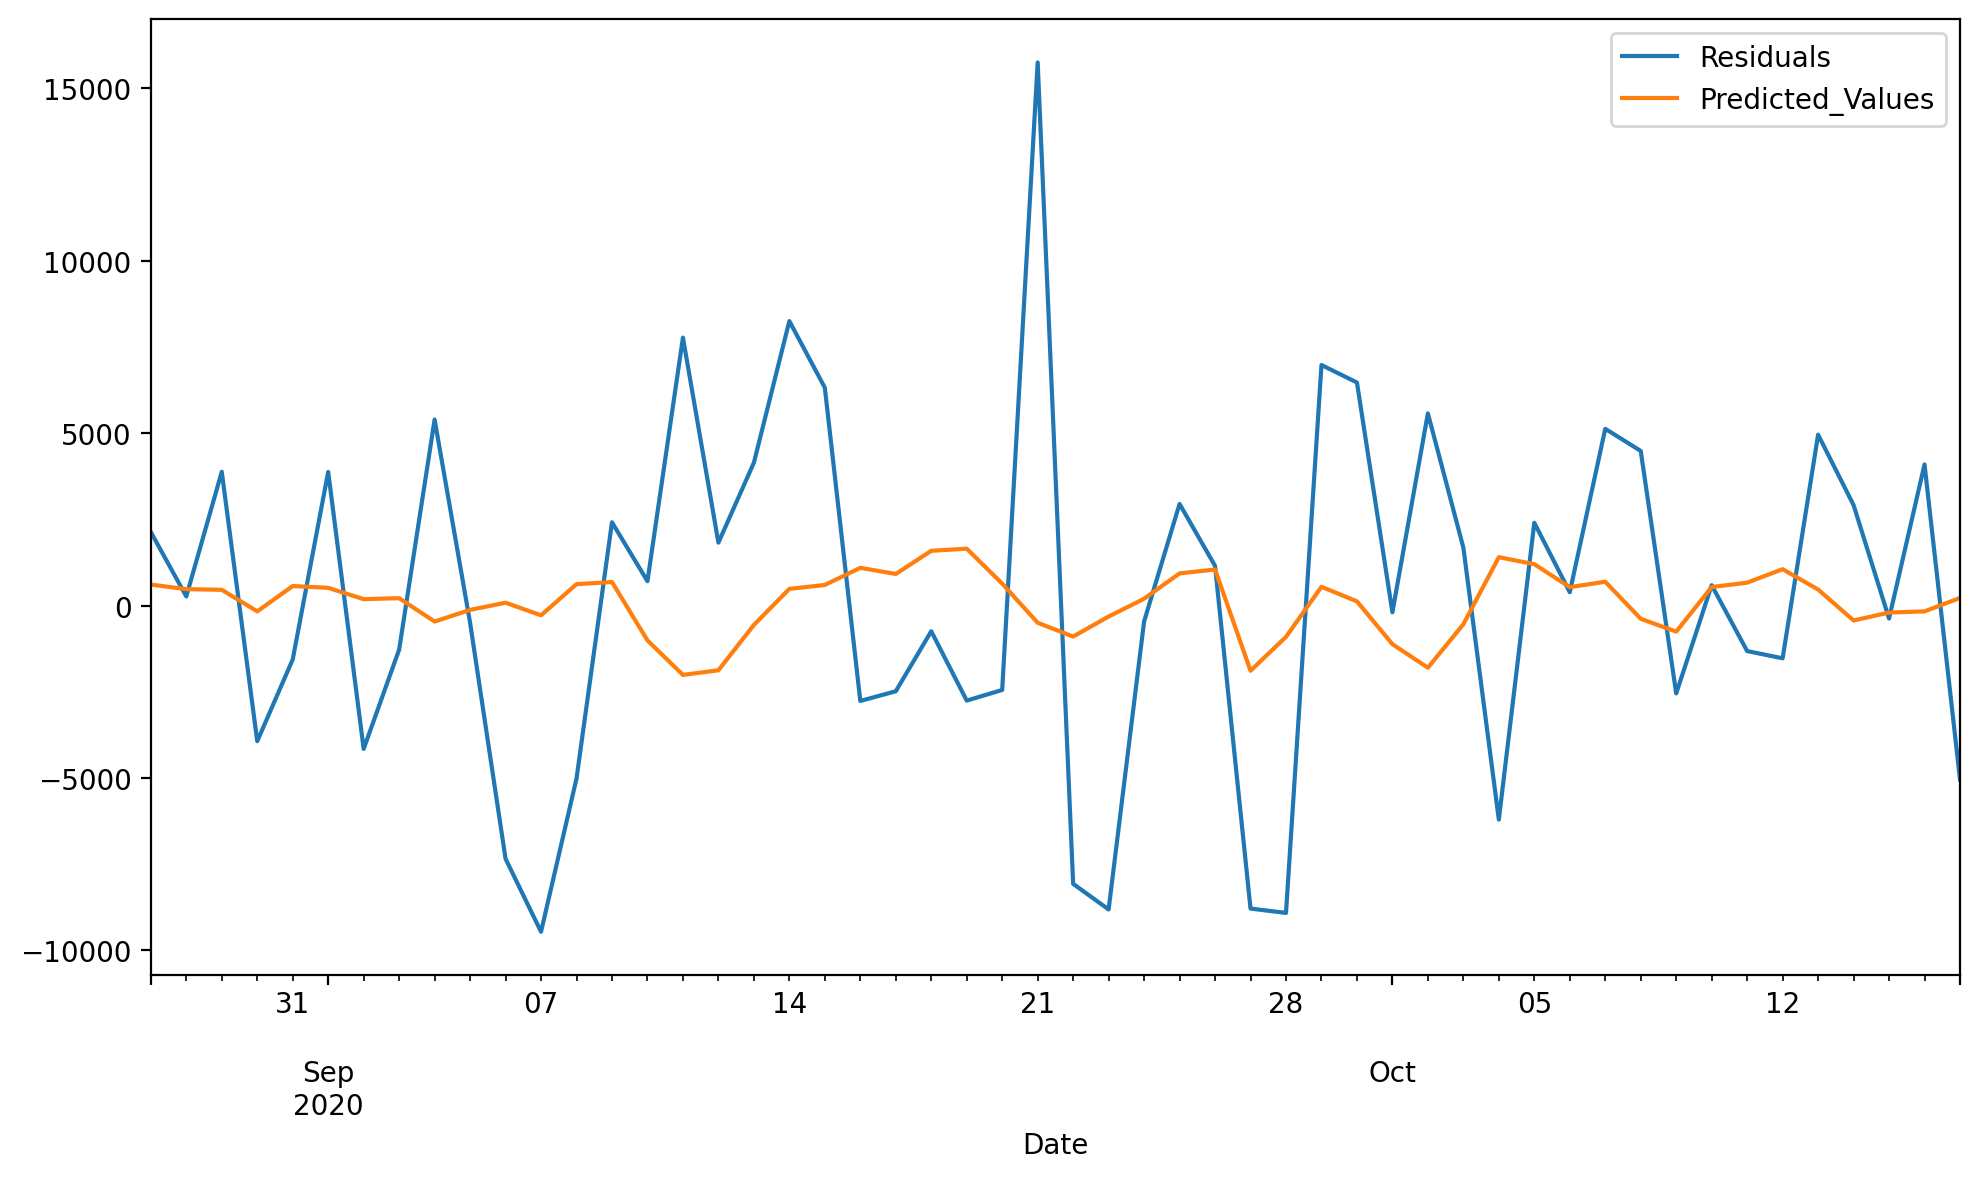

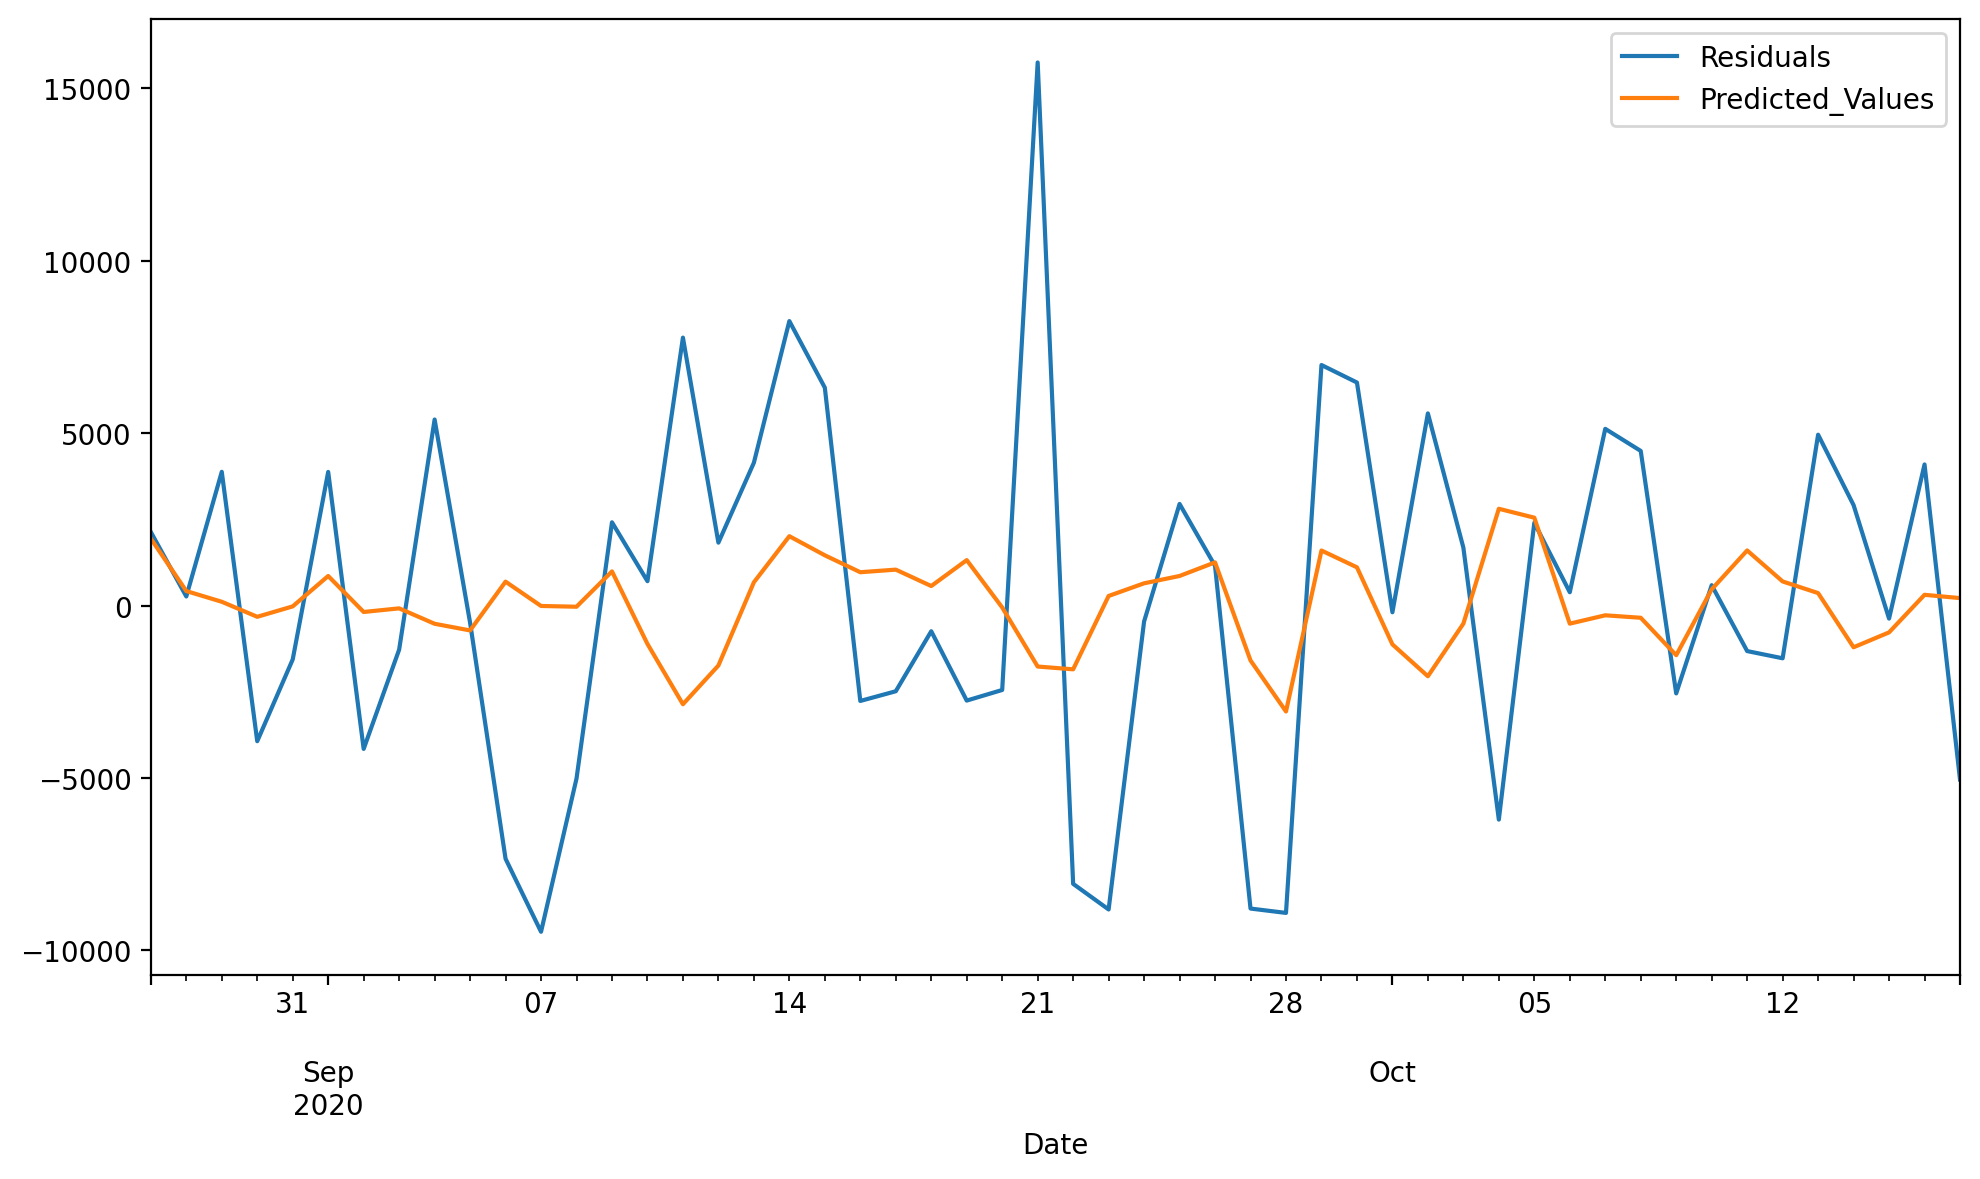

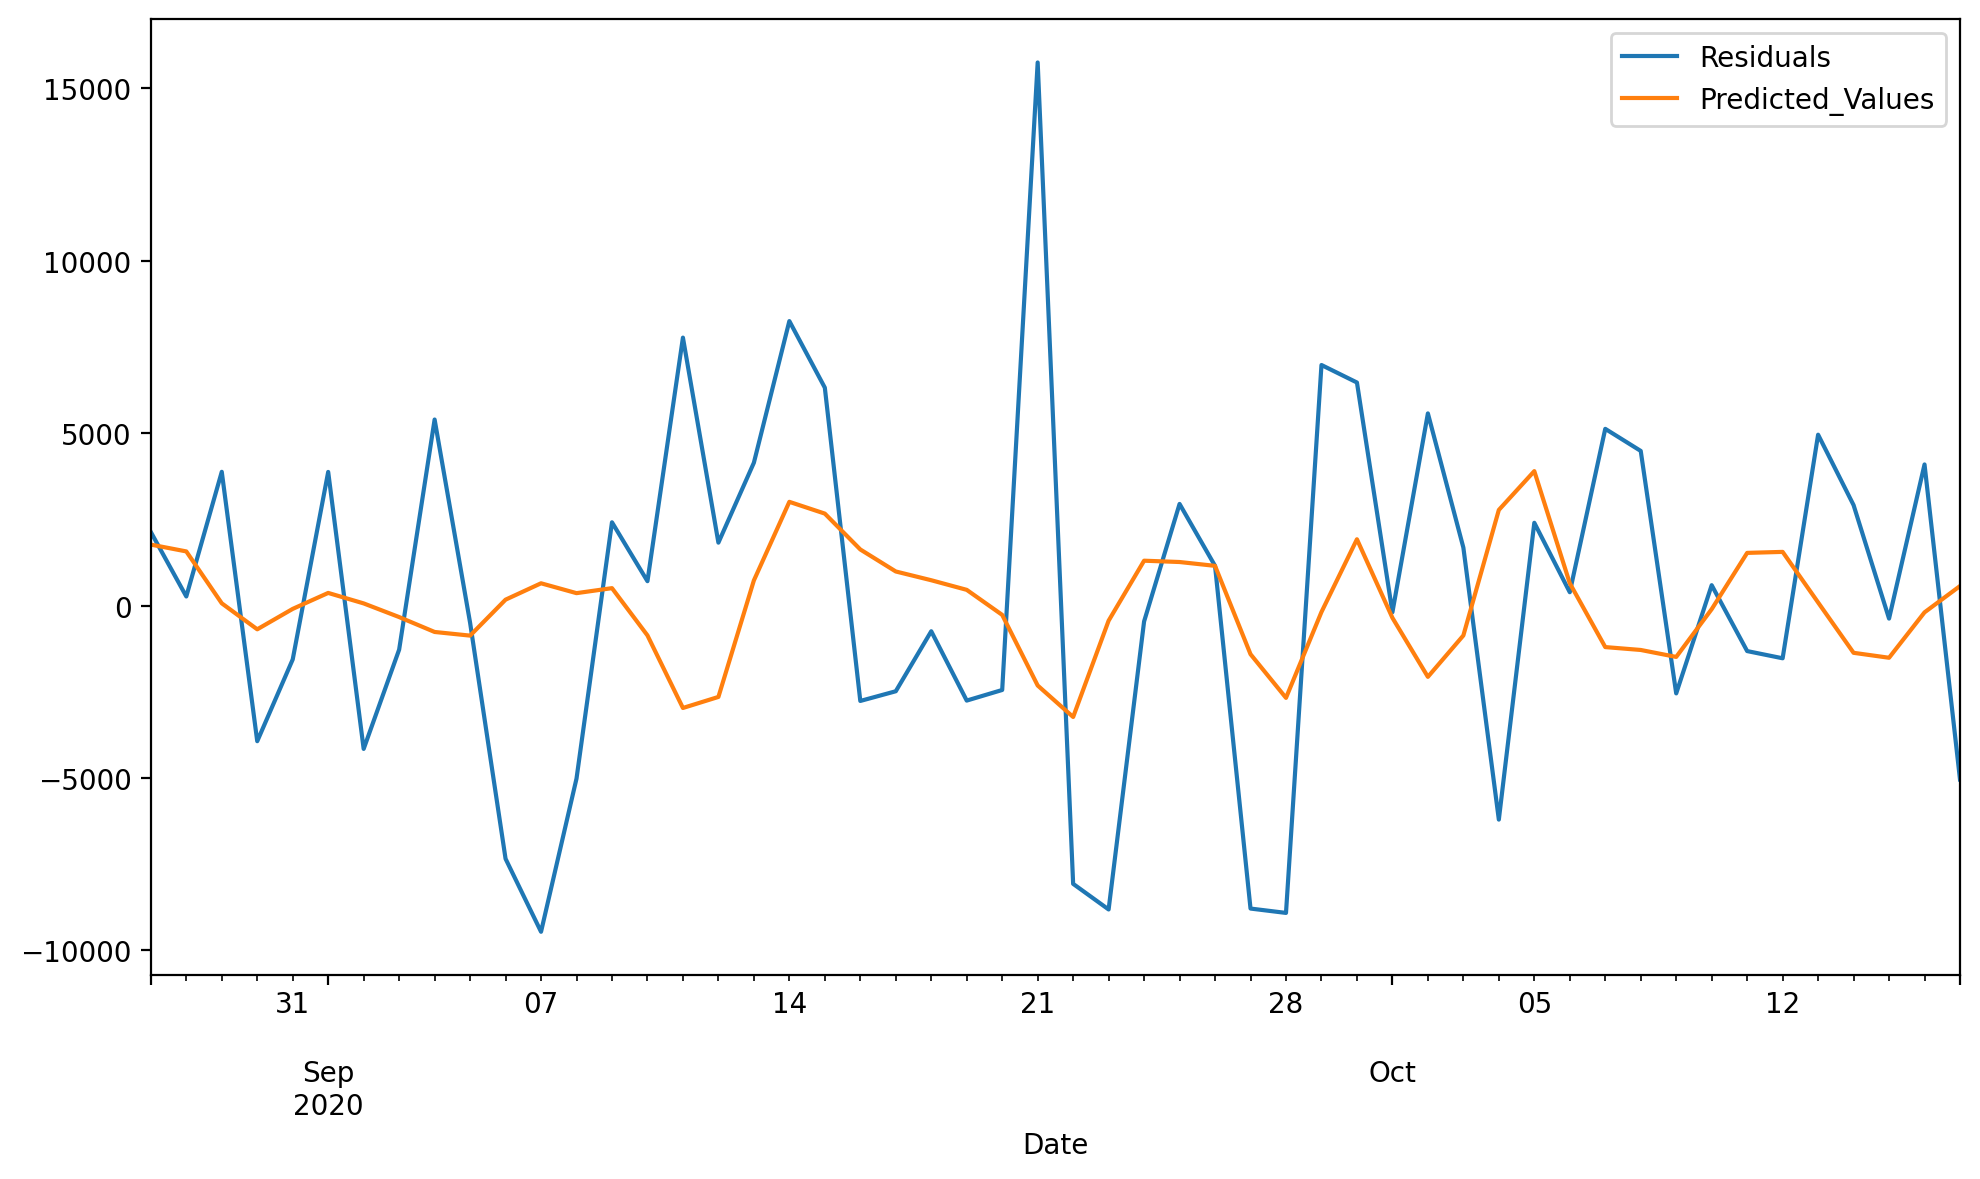

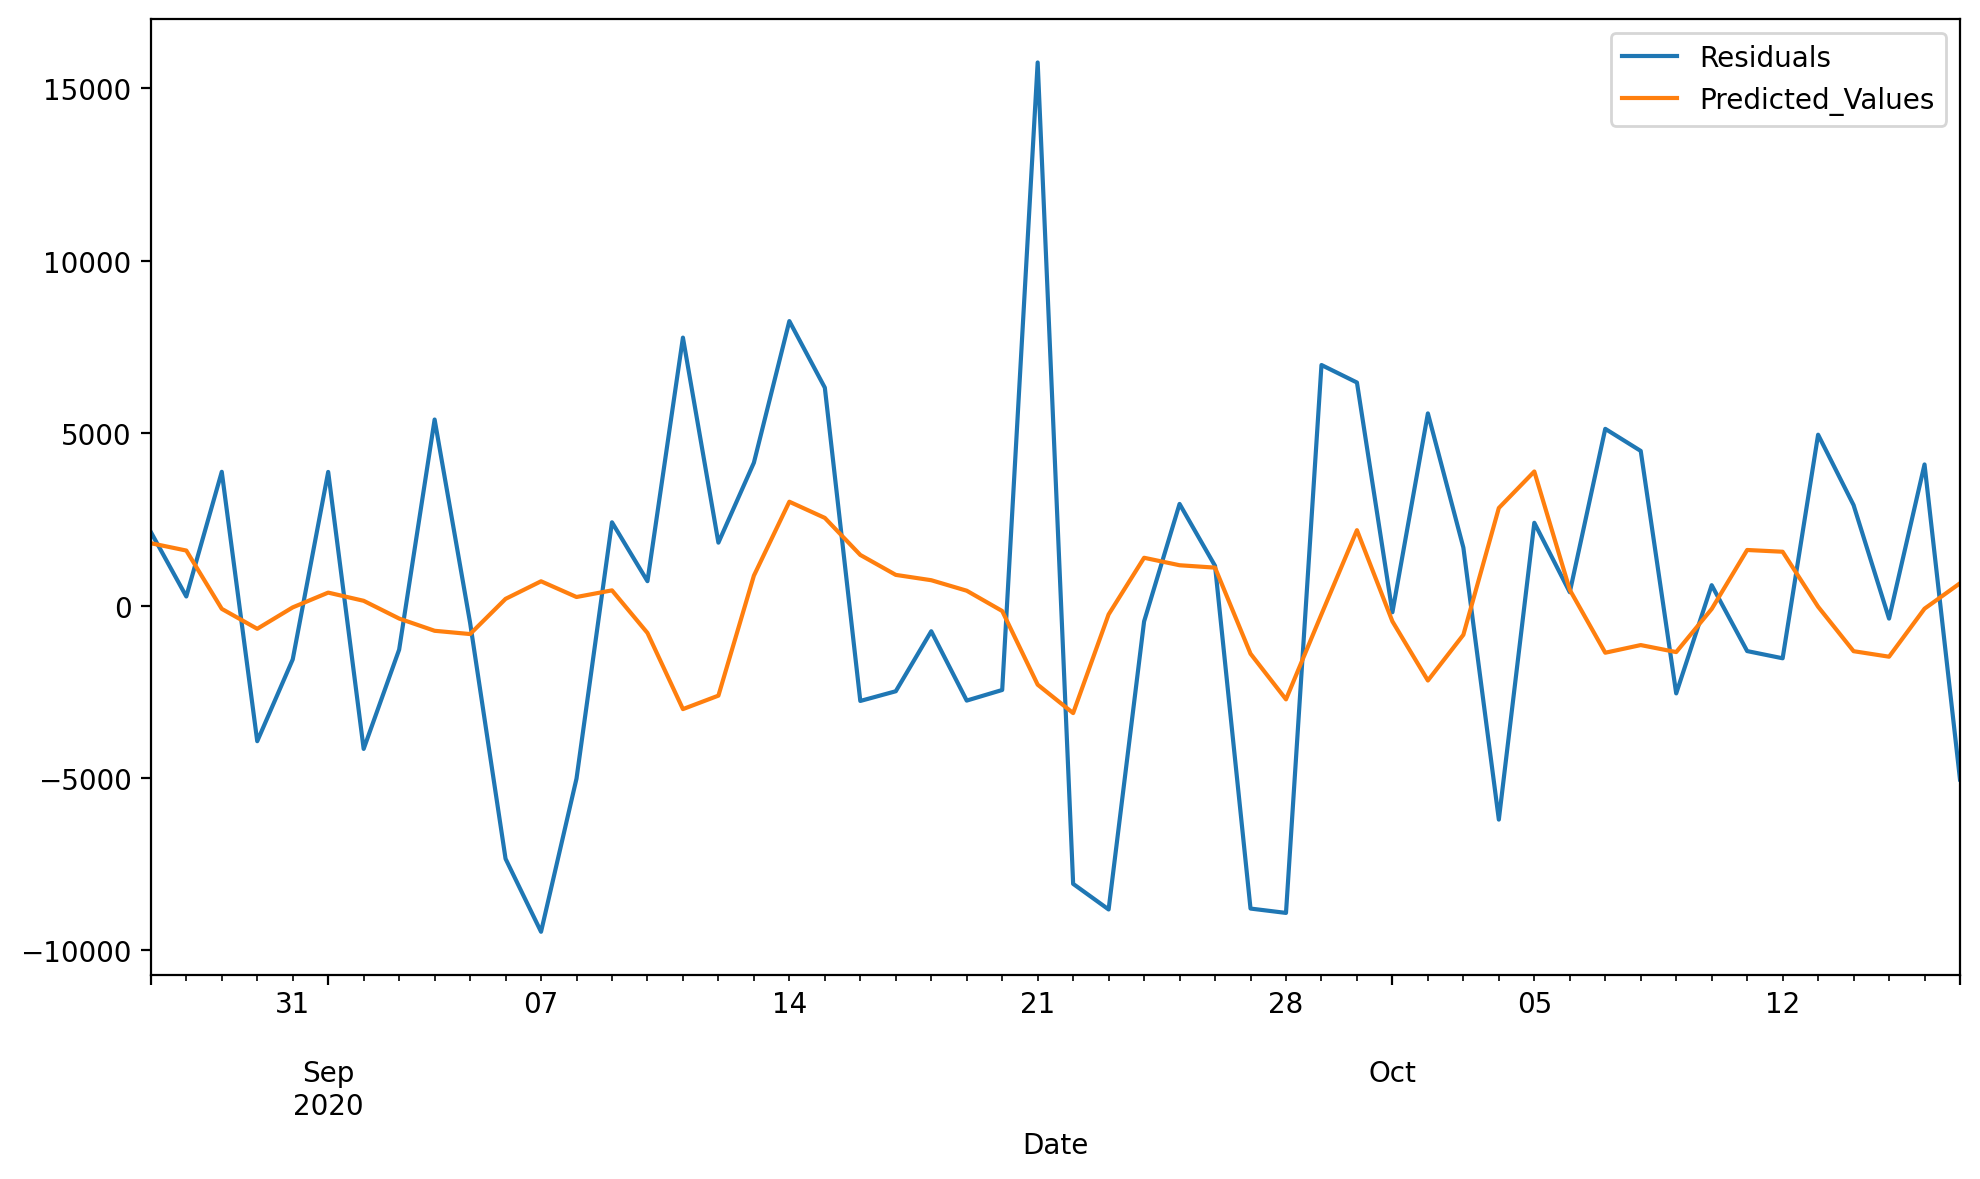

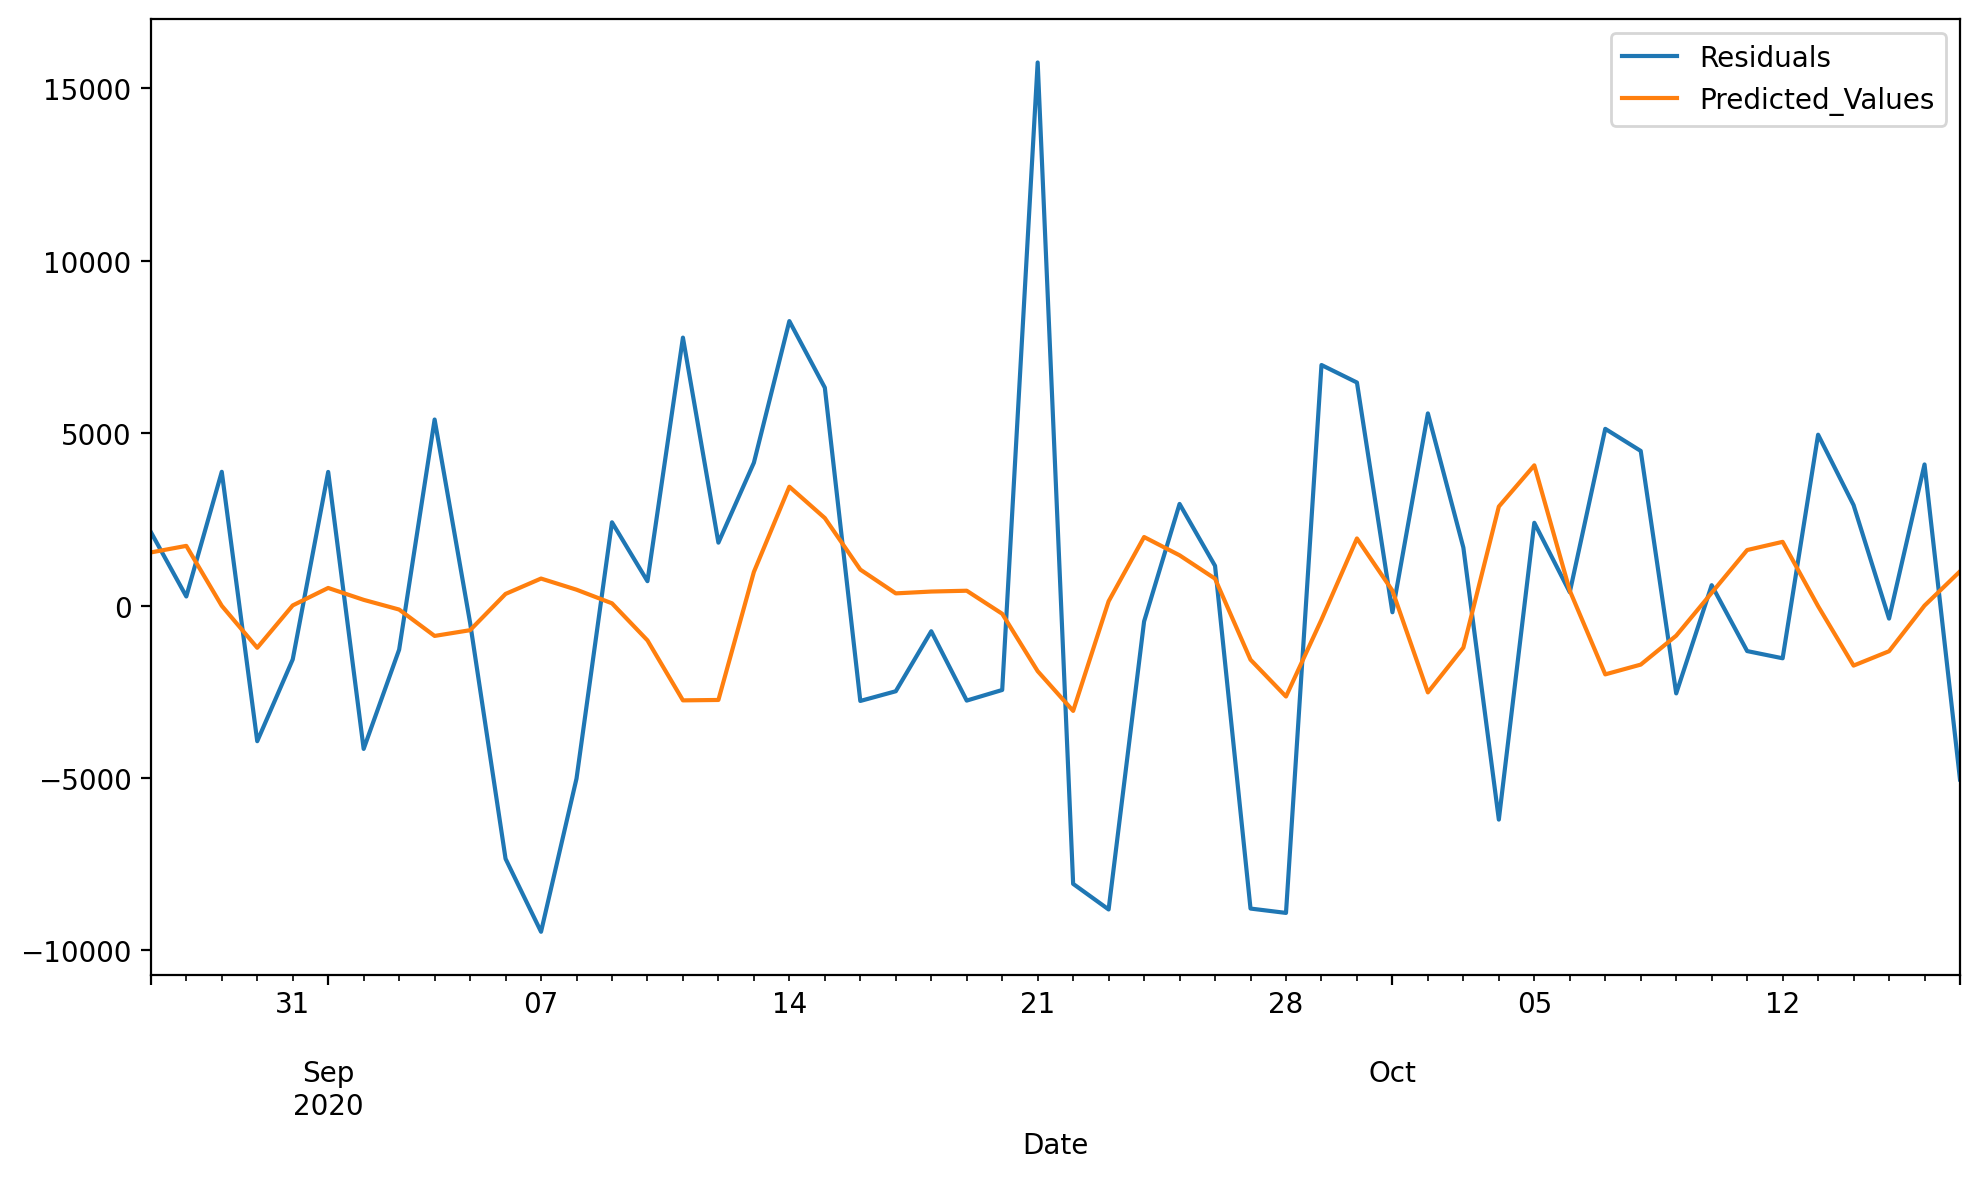

In [359]:
# best value for q
best_rmse = np.inf
best_q = -1

for i in range(1,11):
    [df_train,df_test,theta,intercept,RMSE] = MA(i,pd.DataFrame({'Residuals':res['Residuals']}))

    if RMSE<best_rmse:
        best_rmse = RMSE
        best_q = i

print(f'The Best value of q is {best_q} with RMSE of {best_rmse}')

Best Value for p & q = 9 & 2

AR + MA model for this:

The RMSE is : 5101.721, Value of q : 2


<Axes: xlabel='Date'>

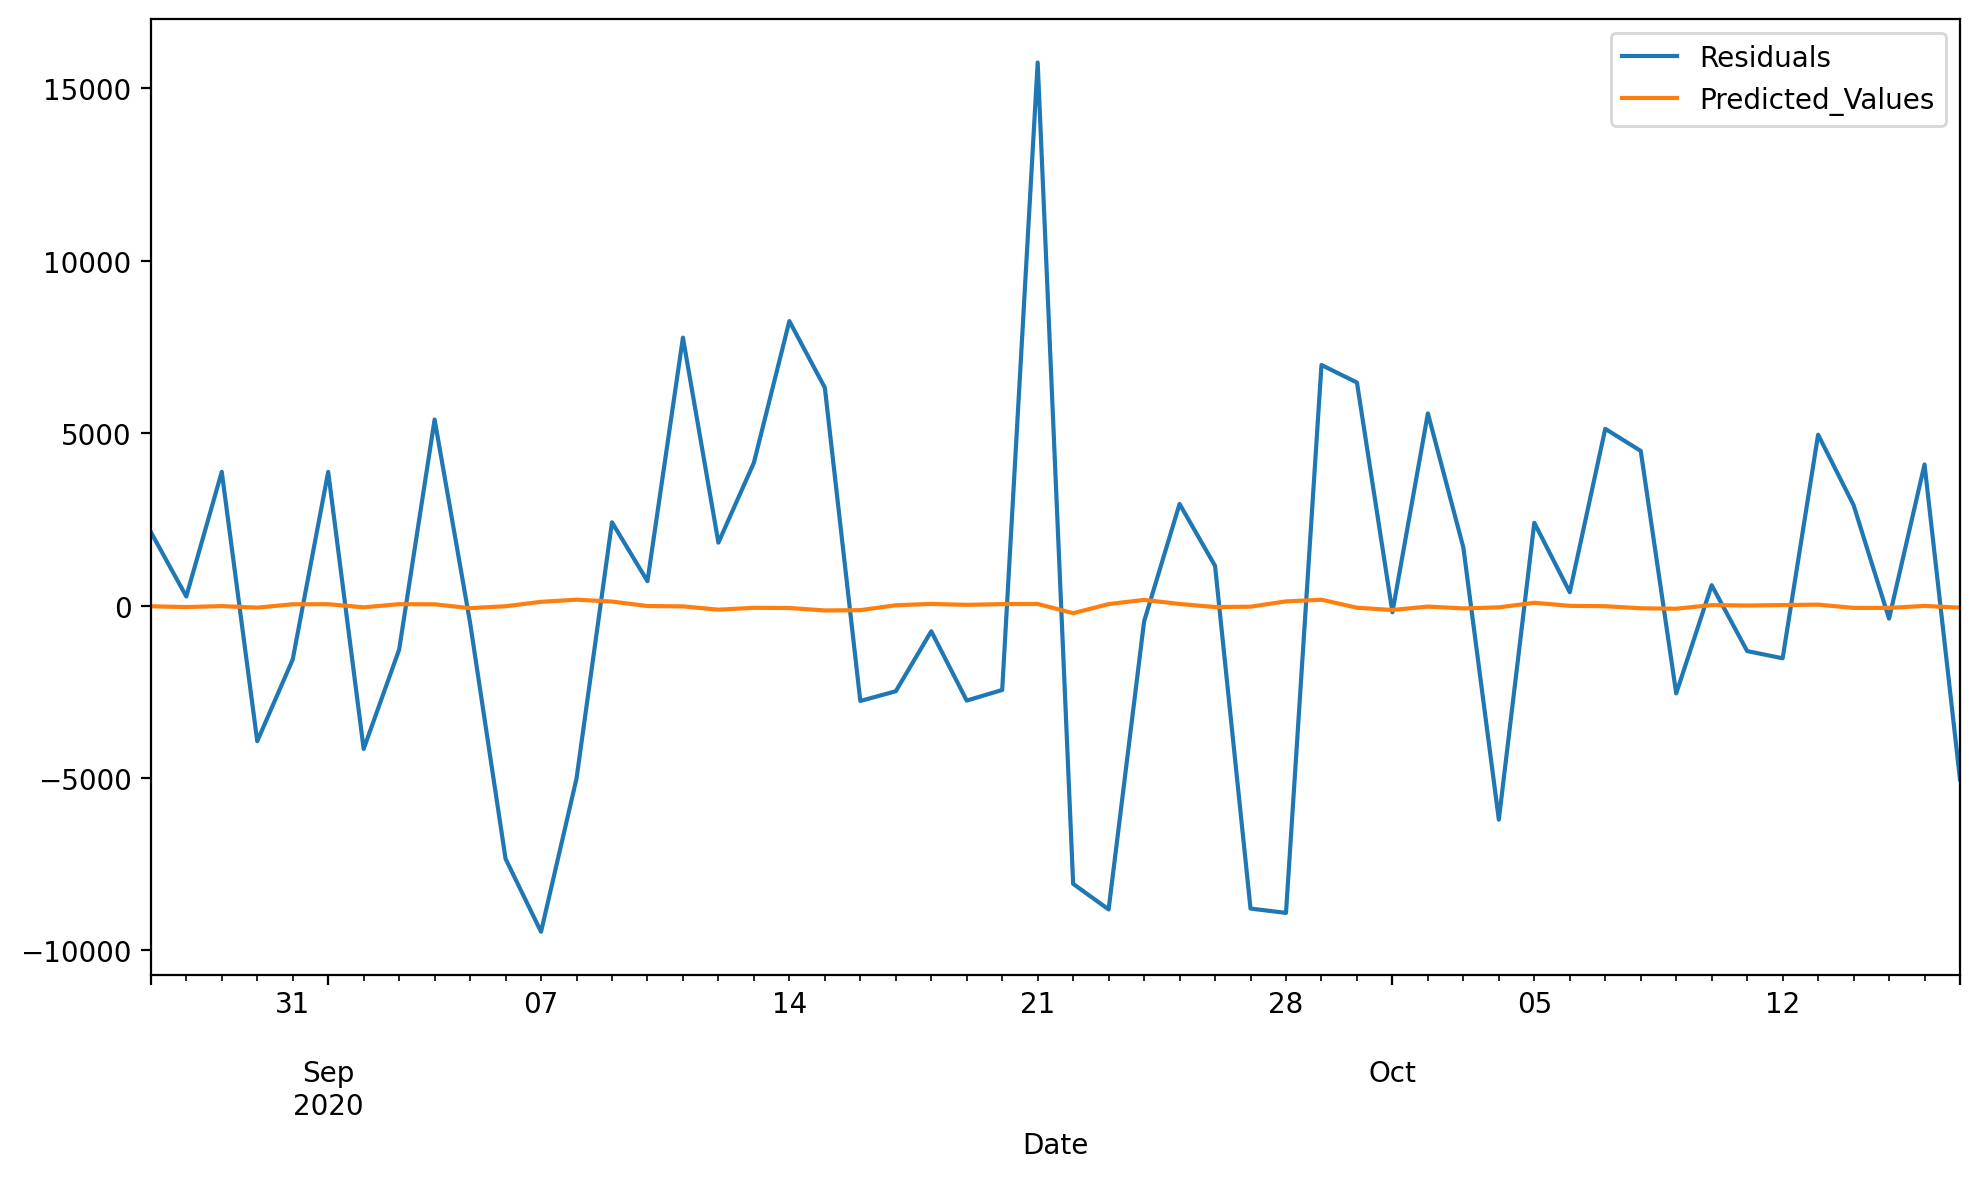

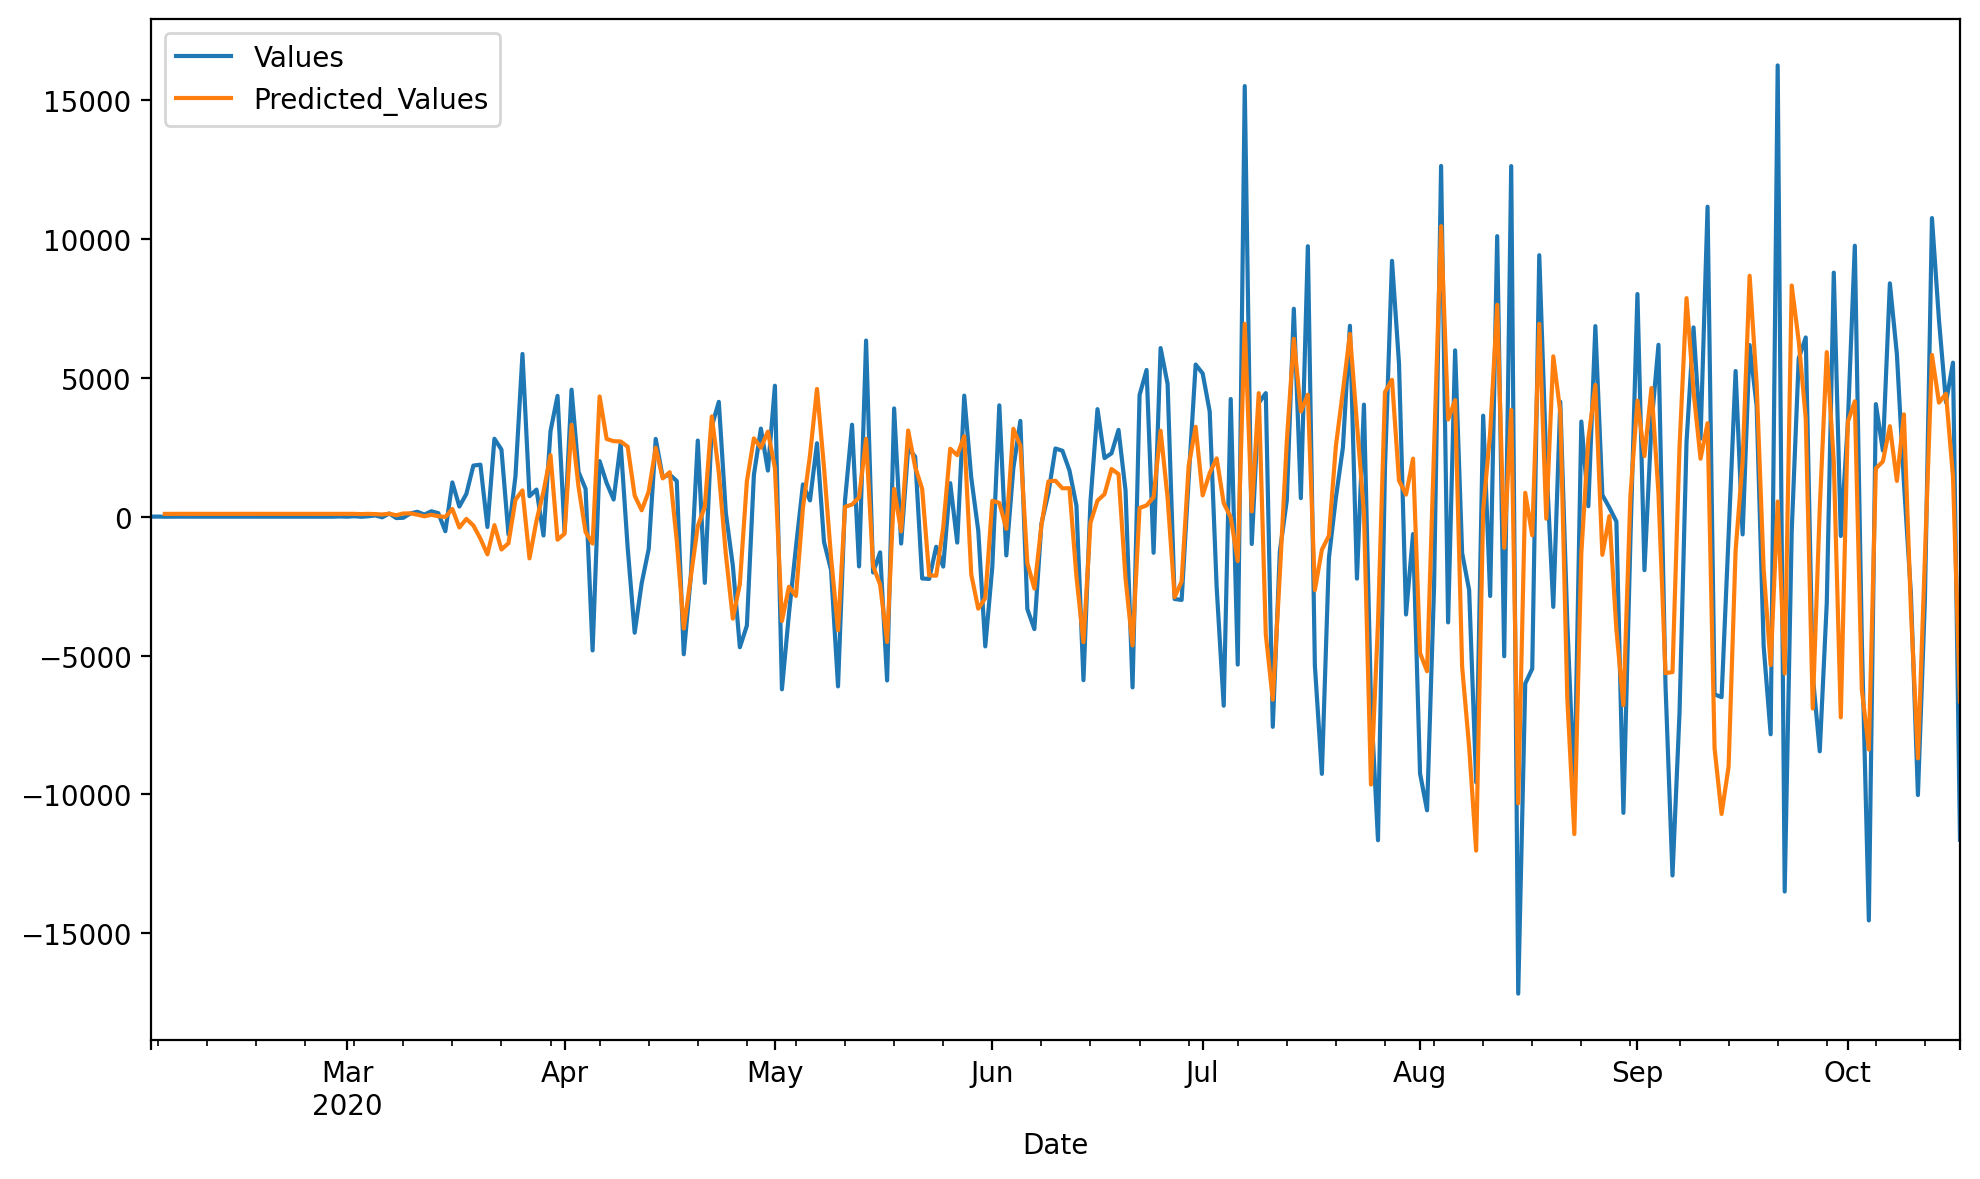

In [360]:
[res_train,res_test,theta,intercept,RMSE] = MA(best_q,pd.DataFrame({'Residuals':res['Residuals']}))

res_c = pd.concat([res_train,res_test])

df_c['Predicted_Values'] += res_c['Predicted_Values']

df_c[['Values','Predicted_Values']].plot()

Get Back Original Data:

In [361]:
df_usa.iloc[0]['Confirmed_diff']

1.0

In [362]:
# df_c['Values']+= df_c['Values'].shift(1)
# df_c['Values']+=df_c['Values'].shift(1)
df_c
def inverse_diff(series, last_observation):

    series_undifferenced = series.copy()

    series_undifferenced.iloc[0] = series_undifferenced.iloc[0] + last_observation

    series_undifferenced = series_undifferenced.cumsum()

    return series_undifferenced

inverse_1 = inverse_diff(df_c['Values'], df_usa.iloc[0]['Confirmed_diff'])
inverse = inverse_diff(inverse_1, df_usa.iloc[0]['Confirmed_diff'])

df_c['Corrected_Values'] = inverse

inverse_1p = inverse_diff(df_c['Predicted_Values'], df_usa.iloc[0]['Confirmed_diff'])
inverse_p = inverse_diff(inverse_1p, df_usa.iloc[0]['Confirmed_diff'])


df_c['Corrected_Predictions'] = inverse_p


<Axes: xlabel='Date'>

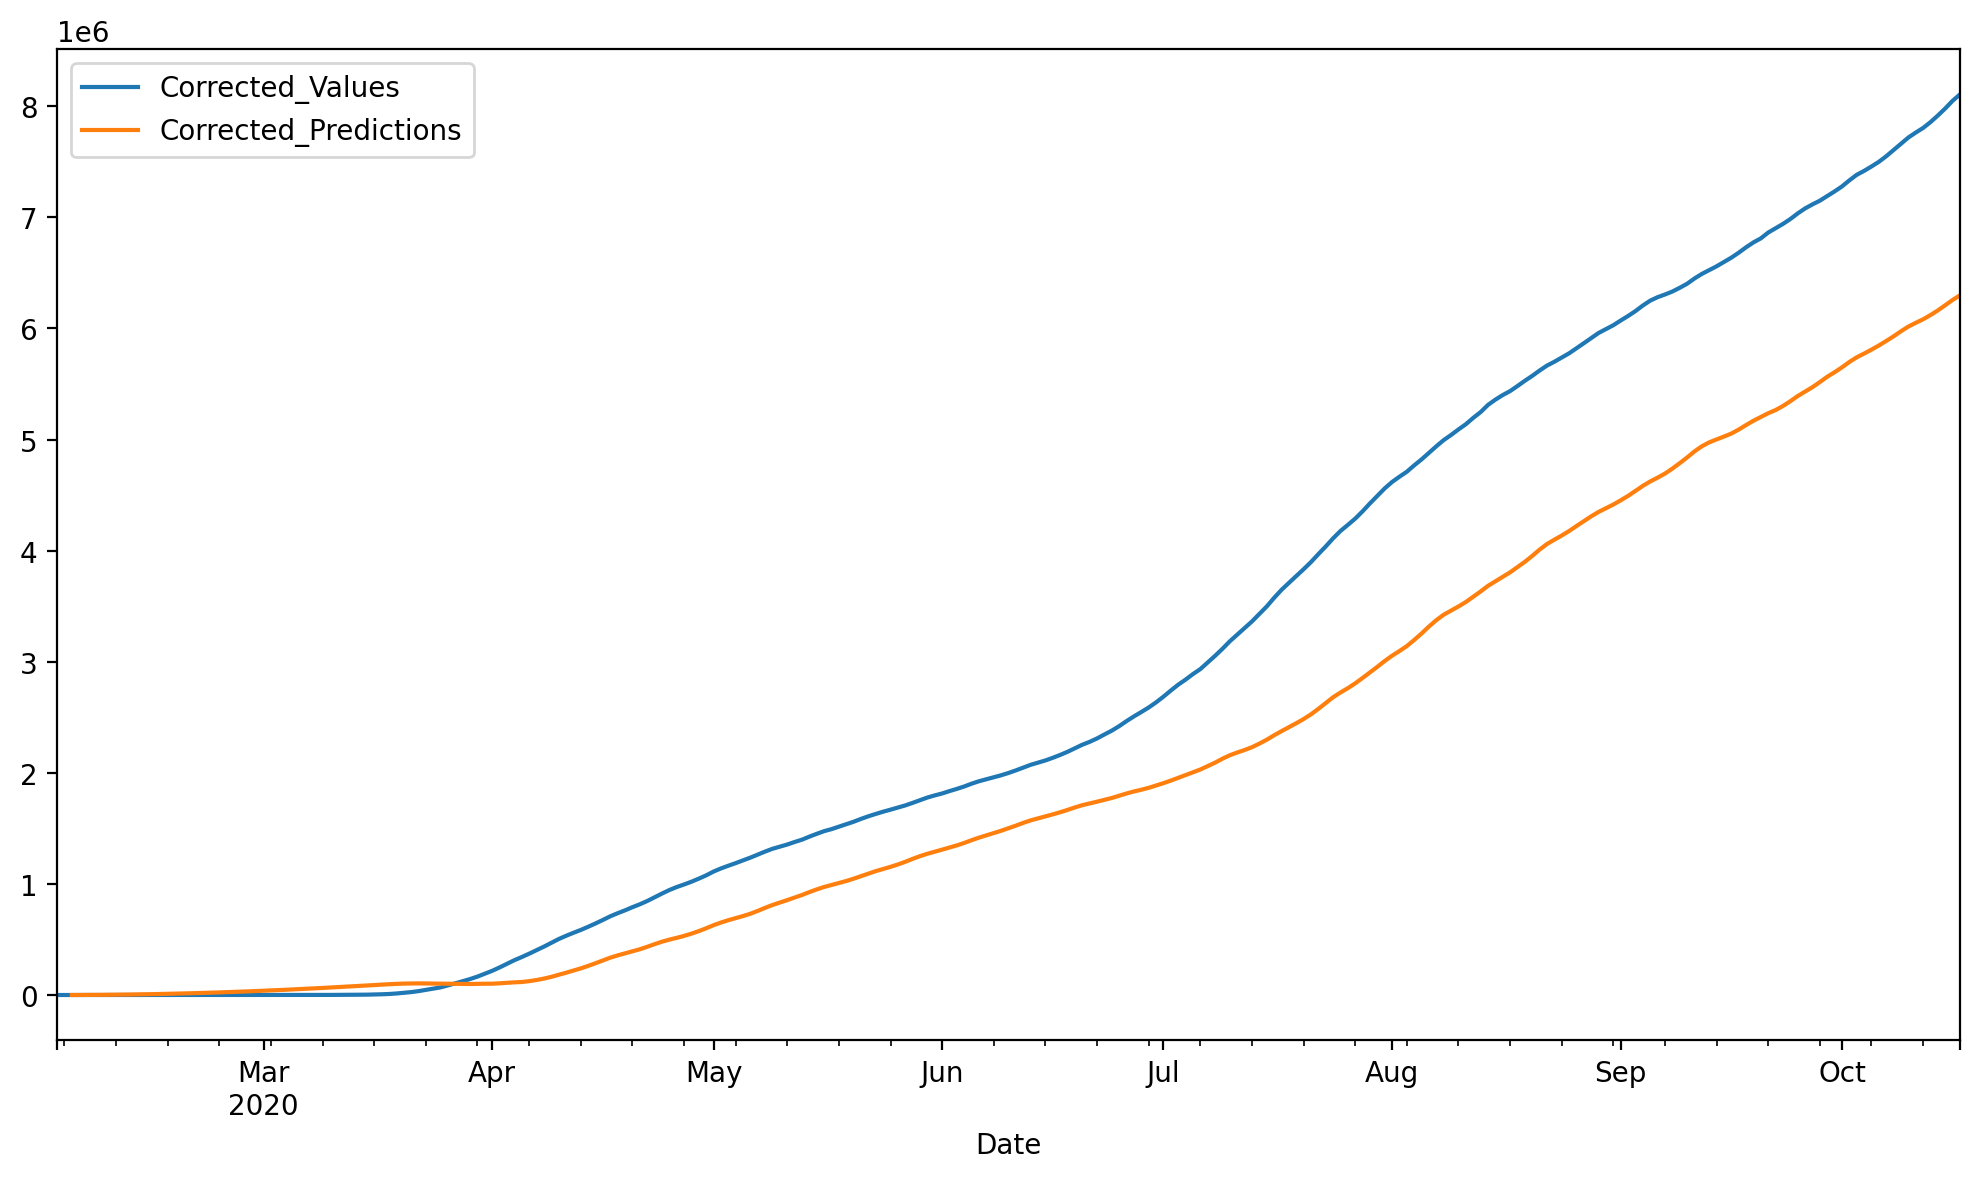

In [363]:
df_c[['Corrected_Values','Corrected_Predictions']].plot()

/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


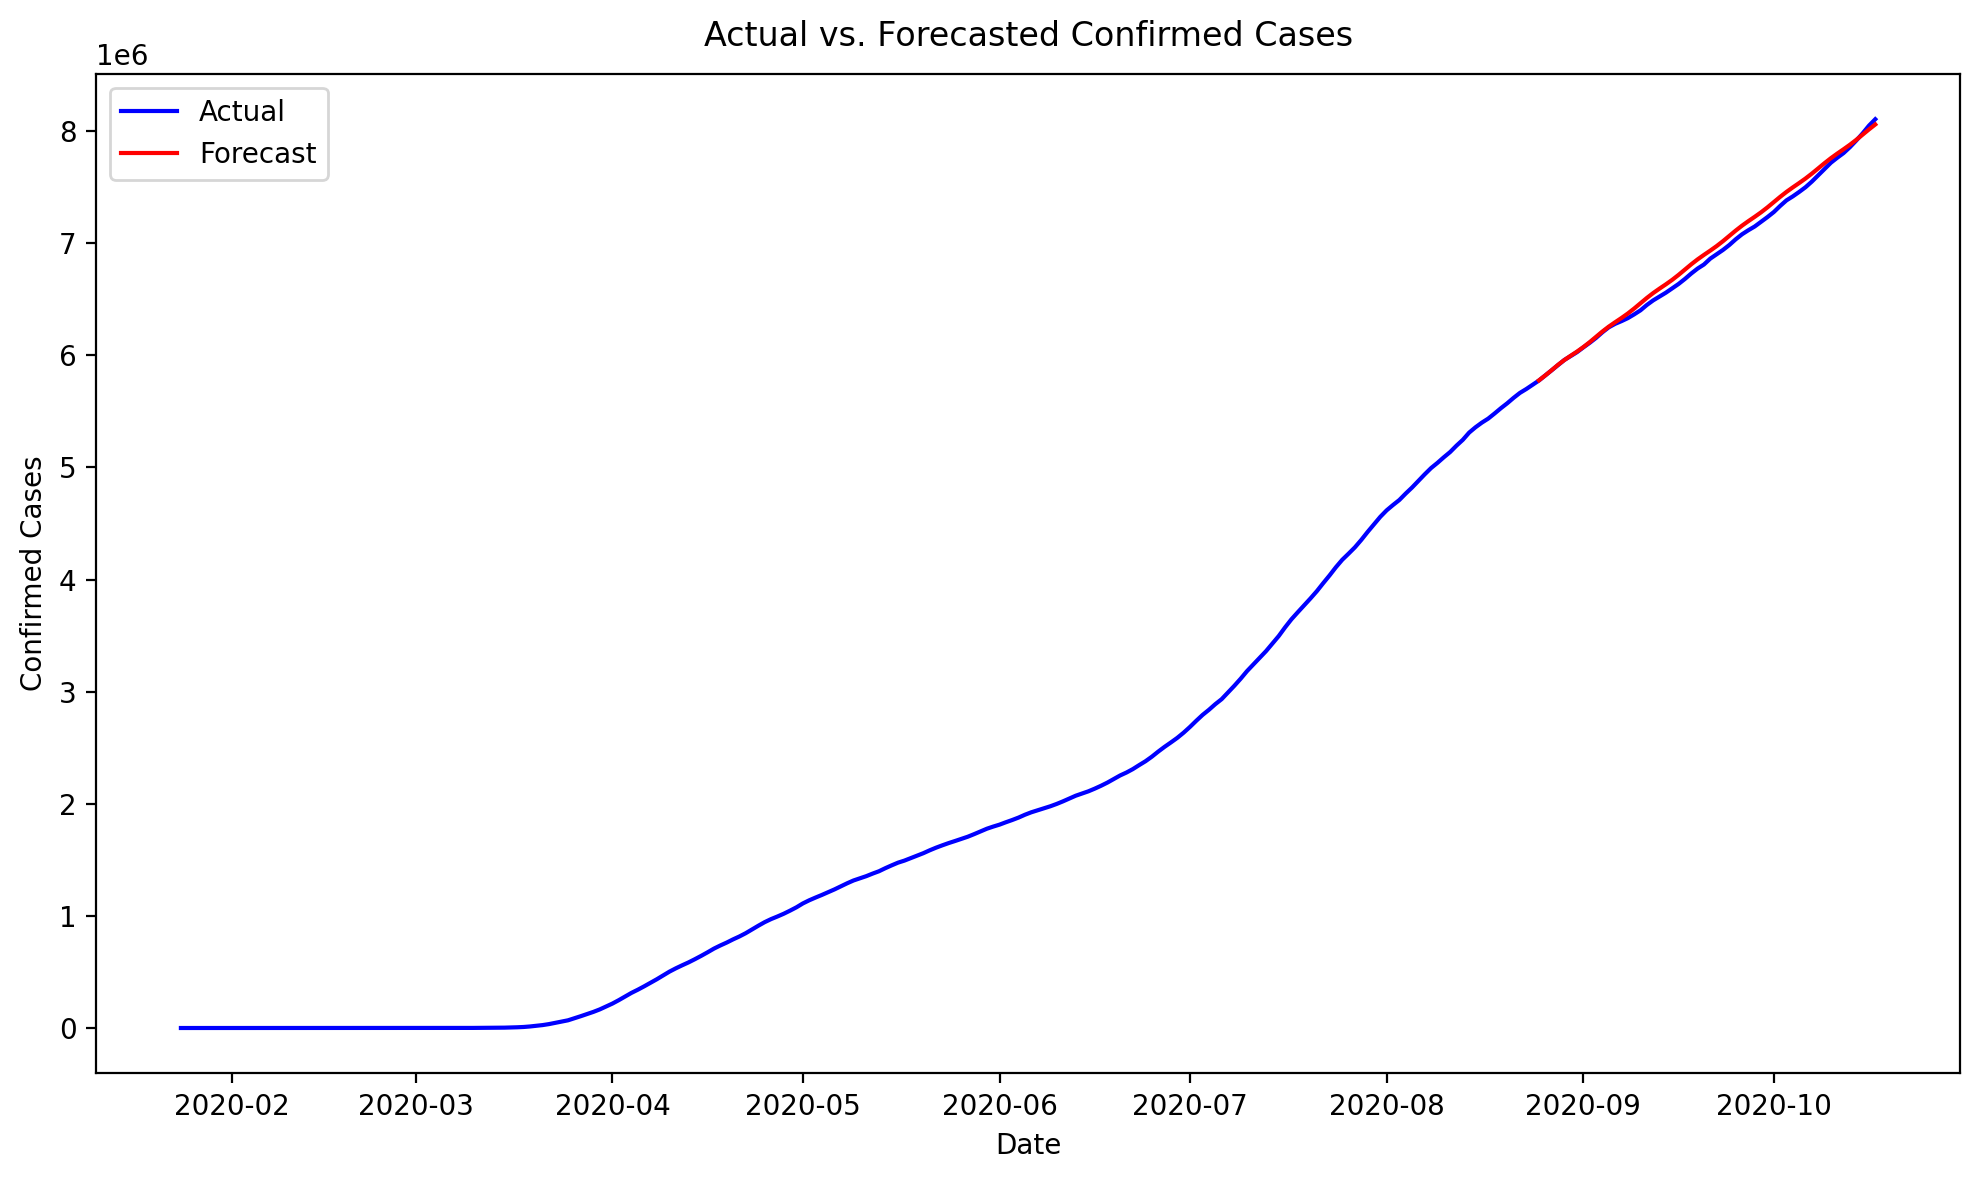

In [364]:
model = ARIMA(train_data['Confirmed'], order=(9, 2, 2))
results = model.fit()

out = results.forecast(steps=len(test_data))  # Forecast for the entire test set

plt.plot(df_usa.index, df_usa['Confirmed'], label='Actual', color='blue')

# Plot forecasted values
plt.plot(test_data.index, out, label='Forecast', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs. Forecasted Confirmed Cases')

# Show legend
plt.legend()

# Show plot
plt.show()